<h1 style='color: orange;'>Librairies</h1>

In [518]:
# Import des librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from skimpy import skim
from datetime import timedelta
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp
from matplotlib.colors import ListedColormap

<h1 style='color: orange;'>Import des fichiers</h1>

In [520]:
customer=pd.read_csv('customers.csv', sep=';')
product=pd.read_csv('products.csv', sep=';')
transaction=pd.read_csv('Transactions.csv', sep=';', low_memory=False)

<h1 style='color: orange;'>Préparation des fichiers</h1>

## **Préparation du fichier 'customer'**

In [523]:
customer.head(1)

,client_id,sex,birth
0,c_4410,f,1967


In [524]:
skim(customer)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8621   │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean    ┃ sd       ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ birth      │    0 │       0 │    1978 │    16.92 │    1929 │    1966 │   1979 │   1992 │   2004 │  ▁▂▅▇██  │  │
│ └────────────┴──────┴─────────┴─────────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column     ┃ NA  ┃ NA %  ┃ shortest  ┃ longest ┃ min ┃ max   ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ client_id  │   0 │     0 │ c_7       │ c_4410  │ c_1 │ c_999 │          5.87 │             1 │        8621 │  │
│ │ sex        │   0 │     0 │ f         │ f       │ f   │ m     │             1 │             1 │        8621 │  │
│ └────────────┴─────┴───────┴───────────┴─────────┴─────┴───────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [525]:
# Recherche des doublons dans les id cleints
print(f'''Nombre de doublon dans la colonne client_id: {customer['client_id'].duplicated(keep=False).sum()}
''')

Nombre de doublon dans la colonne client_id: 0



In [526]:
# Description des colonnes numériques
customer.describe(include='all')

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_4410,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [527]:
# Visualisation des valeurs dans la colonne 'sex'
customer['sex'].value_counts(dropna=False)

sex
f    4490
m    4131
Name: count, dtype: int64

#### Le ficher 'customer' n'a pas de valeur manquante, de ligne vide ni de valeur abérante

## **Préparation du fichier 'product'**

In [530]:
product.head(1)

,id_prod,price,categ
0,0_1421,19.99,0


In [531]:
skim(product)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3286   │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 3      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean      ┃ sd        ┃ p0     ┃ p25    ┃ p50     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ price     │    0 │      0 │     21.86 │     29.85 │   0.62 │   6.99 │   13.07 │   22.99 │    300 │    █    │  │
│ │ categ     │    0 │      0 │    0.3704 │    0.6154 │      0 │      0 │       0 │       1 │      2 │ █  ▃ ▁  │  │
│ └───────────┴──────┴────────┴───────────┴───────────┴────────┴────────┴─────────┴─────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column   ┃ NA  ┃ NA %  ┃ shortest  ┃ longest  ┃ min  ┃ max   ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ id_prod  │   0 │     0 │ 0_6       │ 0_1421   │ 0_0  │ 2_99  │           5.3 │             1 │        3286 │  │
│ └──────────┴─────┴───────┴───────────┴──────────┴──────┴───────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [532]:
# Recherche de doublon dans la colonne id_prod
print(f'''Nombre de doublon dans la colonne id_prod: {product['id_prod'].duplicated(keep=False).sum()}
''')

Nombre de doublon dans la colonne id_prod: 0



In [533]:
# Description des colonnes numériques
product.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [534]:
# Visualisation des valeurs de categ
product['categ'].value_counts()

categ
0    2308
1     739
2     239
Name: count, dtype: int64

In [535]:
# Modification du nom de la colonne 'prod_id' en 'id_prod' pour harmonisation
product.rename(columns={'id_prod':'prod_id'}, inplace=True)
product.head(1)

,prod_id,price,categ
0,0_1421,19.99,0


#### Le ficher 'product' n'a pas de valeur manquante, de doublons, de ligne vide ni de valeur abérante

## **Préparation du fichier 'transaction'**

In [538]:
transaction.head(1)

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329


In [539]:
skim(transaction)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1048575 │ │ string      │ 4     │                                                         │
│ │ Number of columns │ 4       │ └─────────────┴───────┘                                                         │
│ └───────────────────┴─────────┘                                                                                 │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃ chars    ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA     ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ per row  ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ id_prod  │ 361041 │ 34.43158 │ 2_7      │ 0_1259   │ 0_0      │ 2_99     │     5.51 │     0.66 │    687534 │  │
│ │          │        │ 57234818 │          │          │          │          │          │          │           │  │
│ │          │        │        7 │          │          │          │          │          │          │           │  │
│ │ date     │ 361041 │ 34.43158 │ 2021-10- │ 2021-03- │ 2021-03- │ 2023-02- │       26 │      1.3 │   1375068 │  │
│ │          │        │ 57234818 │ 01       │ 01       │ 01       │ 28       │          │          │           │  │
│ │          │        │        7 │ 05:13:9. │ 00:01:07 │ 00:01:07 │ 23:58:30 │          │          │           │  │
│ │          │        │          │ 438723   │ .843138  │ .843138  │ .792755  │          │          │           │  │
│ │ session_ │ 361041 │ 34.43158 │ s_1      │ s_100270 │ s_1      │ s_99999  │     7.68 │     0.66 │    687534 │  │
│ │ id       │        │ 57234818 │          │          │          │          │          │          │           │  │
│ │          │        │        7 │          │          │          │          │          │          │           │  │
│ │ client_i │ 361041 │ 34.43158 │ c_8      │ c_7912   │ c_1      │ c_999    │     5.88 │     0.66 │    687534 │  │
│ │ d        │        │ 57234818 │          │          │          │          │          │          │           │  │
│ │          │        │        7 │          │          │          │          │          │          │           │  │
│ └──────────┴────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [540]:
# Visualisation des lignes avec des NaN
nan_lignes = transaction[transaction.isna().any(axis=1)]
print(nan_lignes)

        id_prod date session_id client_id
687534      NaN  NaN        NaN       NaN
687535      NaN  NaN        NaN       NaN
687536      NaN  NaN        NaN       NaN
687537      NaN  NaN        NaN       NaN
687538      NaN  NaN        NaN       NaN
...         ...  ...        ...       ...
1048570     NaN  NaN        NaN       NaN
1048571     NaN  NaN        NaN       NaN
1048572     NaN  NaN        NaN       NaN
1048573     NaN  NaN        NaN       NaN
1048574     NaN  NaN        NaN       NaN

[361041 rows x 4 columns]


In [541]:
# Création d'un masque de NaN pour chaque colonne (DataFrame booléen)
transaction_nan = transaction.isna()

# Prendre la première colonne comme référence
reference = transaction_nan.iloc[:, 0]

# Comparer chaque colonne avec la référence
identique = all((col == reference).all() for _, col in transaction_nan.items())

print()
if identique == True: 
    print(f'Tous les NaN sont sur les mêmes lignes, nous pouvosn donc les supprimer ({identique})')

else:
    print(f'Tous les NaN ne sont pas sur les mêmes lignes ({identique})')

print()


Tous les NaN sont sur les mêmes lignes, nous pouvosn donc les supprimer (True)



In [542]:
# Suppression des NaN
transaction=transaction.dropna(how='all')

In [543]:
skim(transaction)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 687534 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ id_prod   │  0 │    0 │ 2_7       │ 0_1259    │ 0_0       │ 2_99      │      5.51 │          1 │    687534 │  │
│ │ date      │  0 │    0 │ 2021-10-0 │ 2021-03-0 │ 2021-03-0 │ 2023-02-2 │        26 │          2 │   1375068 │  │
│ │           │    │      │ 1         │ 1         │ 1         │ 8         │           │            │           │  │
│ │           │    │      │ 05:13:9.4 │ 00:01:07. │ 00:01:07. │ 23:58:30. │           │            │           │  │
│ │           │    │      │ 38723     │ 843138    │ 843138    │ 792755    │           │            │           │  │
│ │ session_i │  0 │    0 │ s_1       │ s_100270  │ s_1       │ s_99999   │      7.68 │          1 │    687534 │  │
│ │ d         │    │      │           │           │           │           │           │            │           │  │
│ │ client_id │  0 │    0 │ c_8       │ c_7912    │ c_1       │ c_999     │      5.88 │          1 │    687534 │  │
│ └───────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [544]:
# Recherche des doublons
print(f'''Nombre de doublons dans la table transaction: {transaction.duplicated(keep=False).sum()}
''')

Nombre de doublons dans la table transaction: 0



In [545]:
# Modification du nom de la colonne id_prod en prod_id
transaction.rename(columns={'id_prod':'prod_id'}, inplace=True)
transaction.head(1)

,prod_id,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329


In [546]:
# Transformation du type de la colonne date en date
transaction['date']=pd.to_datetime(transaction['date'], dayfirst=True, format='mixed', errors='coerce')
transaction['date']=transaction['date'].dt.floor('D')
transaction.dtypes

prod_id               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [547]:
transaction.describe()

,date
count,687534
mean,2022-03-01 09:22:26.987930880
min,2021-03-01 00:00:00
25%,2021-09-10 00:00:00
50%,2022-02-27 00:00:00
75%,2022-08-28 00:00:00
max,2023-02-28 00:00:00


#### Le ficher 'transaction' n'a plus de valeurs manquantes et aucune ligne dupliquée

## Vérification de la correspondance des clés

In [550]:
# Vérificaition de la correspondance des clés entre customer et transaction
liste_customer=customer['client_id'].unique()
liste_transaction_client_id=transaction['client_id'].unique()
difference_customer_transaction=pd.Index(liste_customer).symmetric_difference(pd.Index(liste_transaction_client_id))
print(f'Identifiant client qui ne trouvent pas de correspondance: {difference_customer_transaction.tolist()}')

Identifiant client qui ne trouvent pas de correspondance: ['c_1223', 'c_2706', 'c_3017', 'c_3443', 'c_3526', 'c_3789', 'c_4086', 'c_4358', 'c_4406', 'c_4447', 'c_5223', 'c_5245', 'c_587', 'c_6735', 'c_6862', 'c_6930', 'c_7584', 'c_8253', 'c_8381', 'c_862', 'c_90']


In [551]:
# Recherche des client_id de transaction qui ne se trouvent pas dans customer
difference_transaction_customer=pd.Index(liste_transaction_client_id).difference(pd.Index(liste_customer))
print(f'''Liste des client_id de \'transaction\' qui ne trouvent pas de correspondance dans \'customer\':
{difference_transaction_customer.tolist()}
''')

Liste des client_id de 'transaction' qui ne trouvent pas de correspondance dans 'customer':
[]



In [552]:
# Liste des clients qui n'ont pas fait d'achat entre le 01 Mars 2021 et le 28 Février 2023
client_sans_achat=pd.Index(liste_customer).difference(pd.Index(liste_transaction_client_id))
print(f'''Liste des clients n'ayant pas fait d'achat entre le 01 Mars 2021 et le 28 Février 2023:
{client_sans_achat.tolist()}
''')

Liste des clients n'ayant pas fait d'achat entre le 01 Mars 2021 et le 28 Février 2023:
['c_1223', 'c_2706', 'c_3017', 'c_3443', 'c_3526', 'c_3789', 'c_4086', 'c_4358', 'c_4406', 'c_4447', 'c_5223', 'c_5245', 'c_587', 'c_6735', 'c_6862', 'c_6930', 'c_7584', 'c_8253', 'c_8381', 'c_862', 'c_90']



In [553]:
# Vérification de la correspondance des clés entre 'product' et 'transaction'
liste_product=product['prod_id'].unique()
liste_transaction_prod_id=transaction['prod_id'].unique()
difference_product_transaction=pd.Index(liste_product).symmetric_difference(pd.Index(liste_transaction_prod_id))
print(f'''Identifiants produits qui ne trouvent pas de correspondance: {difference_product_transaction}
''')

Identifiants produits qui ne trouvent pas de correspondance: Index(['0_1014', '0_1016', '0_1025', '0_1062', '0_1119', '0_1318', '0_1620',
       '0_1624', '0_1645', '0_1780', '0_1800', '0_2308', '0_299', '0_310',
       '0_322', '0_510', '1_0', '1_394', '2_72', '2_86', '2_87'],
      dtype='object')



In [554]:
# Recherche des produits de 'transaction' qui ne trouvent pas de correspondance dans 'product'
difference_transaction_product=pd.Index(liste_transaction_prod_id).difference(pd.Index(liste_product))
print(f'''Liste des prod_id de \'transaction\' qui ne trouvent pas de correspondance dans \'product\':
{difference_transaction_product.tolist()}
''')

Liste des prod_id de 'transaction' qui ne trouvent pas de correspondance dans 'product':
[]



In [555]:
# liste des produits invendus
liste_produit_invendu=pd.Index(liste_product).difference(pd.Index(liste_transaction_prod_id))
print(f'''Liste des produits invendus ente le 01 Mars 2021 et le 28 Février 2023:
{liste_produit_invendu.tolist()}
''')

Liste des produits invendus ente le 01 Mars 2021 et le 28 Février 2023:
['0_1014', '0_1016', '0_1025', '0_1062', '0_1119', '0_1318', '0_1620', '0_1624', '0_1645', '0_1780', '0_1800', '0_2308', '0_299', '0_310', '0_322', '0_510', '1_0', '1_394', '2_72', '2_86', '2_87']



## Jointure des fichiers

In [557]:
# Jointure de transaction et de customer
jointure_partielle=pd.merge(transaction, customer, on='client_id', how='inner')
jointure_partielle.info()
jointure_partielle.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   prod_id     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   sex         687534 non-null  object        
 5   birth       687534 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.5+ MB


,prod_id,date,session_id,client_id,sex,birth
0,0_1259,2021-03-01,s_1,c_329,f,1967


In [558]:
# Jointure totale 
jointure=pd.merge(jointure_partielle, product, on='prod_id', how='inner')
jointure.info()
jointure.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   prod_id     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   sex         687534 non-null  object        
 5   birth       687534 non-null  int64         
 6   price       687534 non-null  float64       
 7   categ       687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 42.0+ MB


,prod_id,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0


<h1 style='color: orange;'>Analyse du chiffre d'affaire</h1>

## Chiffre d'affaire total

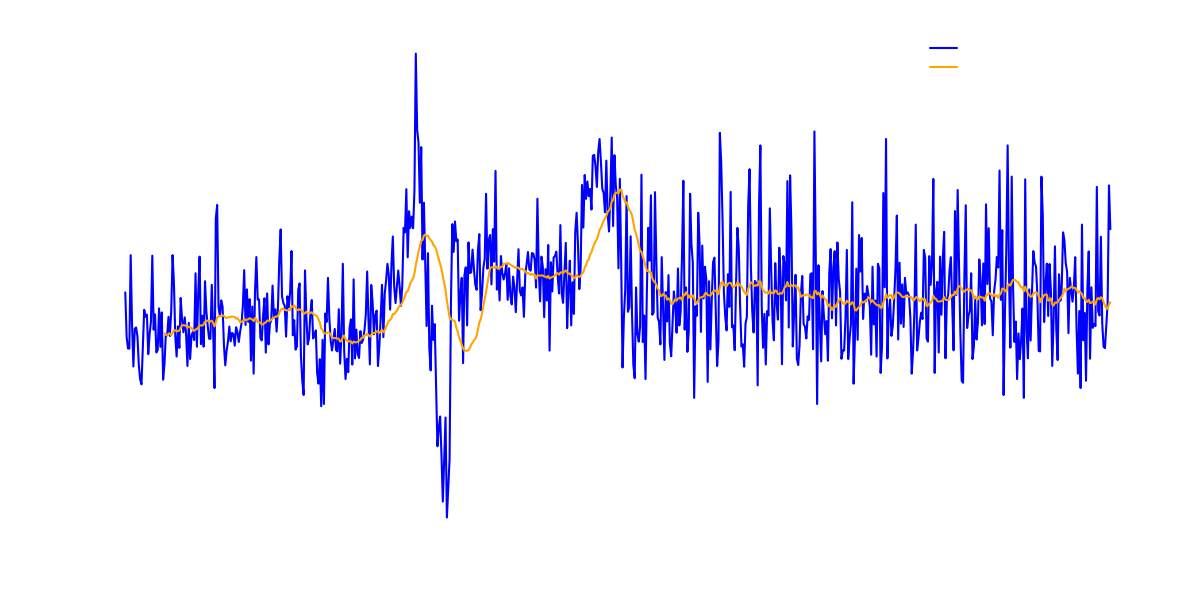

In [561]:
# Groupement par date
jointure_agg_date=jointure.groupby('date').agg({'price':'sum'}).reset_index()
jointure_agg_date=jointure_agg_date.sort_values('date')
jointure_agg_date['moyenne_mobile_30_jour']=jointure_agg_date['price'].rolling(window=30, min_periods=30).mean() 

# Création des graphes 

# Configuration des styles Seaborn et Matplotlib
sns.set_style('darkgrid')

# Création de la figure et des axes avec couleurs personnalisées
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

sns.lineplot(data=jointure_agg_date, x='date', y='price', label='Prix total par jour', color='blue', ax=ax)
sns.lineplot(data=jointure_agg_date, x='date', y='moyenne_mobile_30_jour', label='Moyenne mobile sur 30 jours', color='orange', ax=ax)

ax.grid(True, alpha=0.3)
ax.set_title('Chiffre d\'affaire total par jour et moyenne mobile sur 30 jours', color='white')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Chiffre d\'affaire', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')
legend=ax.legend()
for text in legend.get_texts():
    text.set_color('white')

legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

# Valeurs min et max
max_price = jointure_agg_date['price'].idxmax()
min_price = jointure_agg_date['price'].idxmin()

max_date = jointure_agg_date.loc[max_price, 'date']
max_val = jointure_agg_date.loc[max_price, 'price']

min_date = jointure_agg_date.loc[min_price, 'date']
min_val = jointure_agg_date.loc[min_price, 'price']

# Annotations
ax.annotate(f'Max: {max_val:.0f}', xy=(max_date, max_val),
            xytext=(max_date + timedelta(days=25), max_val),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')

ax.annotate(f'Min: {min_val:.0f}', xy=(min_date, min_val),
            xytext=(min_date + timedelta(days=25), min_val + 500),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.tight_layout()
plt.savefig('Graphiques/Évolution_chiffre_affaire.png', transparent=True)
plt.show()

### Que s'est il passé entre Septembre et Octobre 2021?


In [563]:
'''Visualisation des dates min et max '''

print(f'''\nDate max: {max_date}
Date min: {min_date}
Delta CA: {(delta_ca := (max_val-min_val))}
CA moyen: {jointure_agg_date['price'].mean():.2f}
''')


Date max: 2021-10-02 00:00:00
Date min: 2021-10-25 00:00:00
Delta CA: 11301.68
CA moyen: 16476.25



<h4 style='color: #00FDFF;'>En Septembre</h4>

In [565]:
#octobre=range('2021-09-01', '2021-10-31')
septembre=jointure.loc[jointure['date'].between('2021-09-01', '2021-09-30')]
septembre

,prod_id,date,session_id,client_id,sex,birth,price,categ
162567,1_398,2021-09-01,s_83324,c_7102,m,1983,10.17,1
162568,0_1325,2021-09-01,s_83314,c_1650,m,1974,9.99,0
162569,1_475,2021-09-01,s_83325,c_5895,m,1971,20.99,1
162570,0_387,2021-09-01,s_83302,c_3626,f,1962,16.99,0
162571,0_1893,2021-09-01,s_83326,c_5088,f,1970,18.99,0
...,...,...,...,...,...,...,...,...
195876,0_1638,2021-09-30,s_98150,c_5,f,1994,5.46,0
195877,0_1818,2021-09-30,s_98153,c_1838,f,1977,8.99,0
195878,0_675,2021-09-30,s_98168,c_1057,f,1977,19.99,0
195879,0_2069,2021-09-30,s_98170,c_5907,f,1991,17.99,0


In [566]:
septembre['categ'].value_counts(sort=True, ascending=False)

categ
0    23142
1     9268
2      904
Name: count, dtype: int64

In [567]:
septembre['prod_id'].value_counts()

prod_id
1_369     98
1_417     93
1_403     91
1_385     90
1_413     89
          ..
1_467      1
0_1093     1
0_1221     1
0_955      1
0_414      1
Name: count, Length: 2560, dtype: int64

In [568]:
septembre['prod_id'].count()

33314

In [569]:
septembre['client_id'].value_counts(sort=True, ascending=False)

client_id
c_1609    1430
c_6714     464
c_3454     300
c_4958     145
c_3263      37
          ... 
c_402        1
c_3078       1
c_1316       1
c_2045       1
c_6576       1
Name: count, Length: 5693, dtype: int64

In [570]:
septembre[['prod_id', 'client_id']].value_counts()

prod_id  client_id
0_1465   c_1609       11
0_1417   c_1609        7
0_1356   c_1609        7
0_1442   c_1609        7
0_1449   c_1609        7
                      ..
0_1458   c_5046        1
         c_4721        1
         c_4442        1
         c_4263        1
2_96     c_8618        1
Name: count, Length: 32340, dtype: int64

<h4 style='color: #00FDFF;'>En Octobre</h4>

In [572]:
octobre=jointure.loc[jointure['date'].between('2021-10-01', '2021-10-31')]
octobre

,prod_id,date,session_id,client_id,sex,birth,price,categ
195881,0_1145,2021-10-01,s_98170,c_5907,f,1991,6.99,0
195882,1_622,2021-10-01,s_98169,c_7614,m,1995,17.41,1
195883,1_202,2021-10-01,s_98171,c_4492,f,1980,19.96,1
195884,1_288,2021-10-01,s_98171,c_4492,f,1980,22.09,1
195885,1_488,2021-10-01,s_98171,c_4492,f,1980,12.19,1
...,...,...,...,...,...,...,...,...
225898,0_1425,2021-10-31,s_112949,c_1767,f,1983,12.99,0
225899,1_364,2021-10-31,s_112949,c_1767,f,1983,10.30,1
225900,1_417,2021-10-31,s_112949,c_1767,f,1983,20.99,1
225901,0_1745,2021-10-31,s_112950,c_3320,m,1976,4.99,0


In [573]:
octobre['categ'].value_counts()

categ
0    18762
1    10089
2     1171
Name: count, dtype: int64

In [574]:
octobre['prod_id'].value_counts(sort=True, ascending=False)

prod_id
1_413     105
1_369     103
1_396      99
1_417      96
1_383      95
         ... 
1_368       1
0_1006      1
0_1592      1
0_613       1
0_877       1
Name: count, Length: 2506, dtype: int64

In [575]:
octobre['prod_id'].count()

30022

In [576]:
octobre['client_id'].value_counts()

client_id
c_1609    1114
c_6714     302
c_3454     161
c_4958     132
c_8556      39
          ... 
c_3748       1
c_569        1
c_3352       1
c_2467       1
c_7879       1
Name: count, Length: 6190, dtype: int64

<h4 style='color: #00FDFF;'>Étude sur Septembre et Octobre</h4>

In [578]:
'''Groupement par prod_id '''

septembre_prod=septembre.groupby(['prod_id', 'client_id']).agg(
    ca_prod_sep=('price', 'sum'),
    vente_prod_sep=('prod_id','count'), 
    categ_sep=('categ', 'first')
)

octobre_prod=octobre.groupby(['prod_id', 'client_id']).agg(
    ca_prod_oct=('price', 'sum'),
    vente_prod_oct=('prod_id', 'count'),
    categ_oct=('categ', 'first')
)

''' Jointure des deux tables'''
comparaison=septembre_prod.join(octobre_prod, how='outer').fillna(0)
comparaison['delta_ca']=comparaison['ca_prod_sep'] - comparaison['ca_prod_oct']
comparaison['delta_vente']=comparaison['vente_prod_sep'] - comparaison['vente_prod_oct']
comparaison = comparaison.reset_index()
comparaison.sort_values('delta_ca', ascending=False).head(20)

,prod_id,client_id,ca_prod_sep,vente_prod_sep,categ_sep,ca_prod_oct,vente_prod_oct,categ_oct,delta_ca,delta_vente
59674,2_158,c_5800,247.22,1.0,2.0,0.00,0.0,0.0,247.22,1.0
59676,2_158,c_7483,247.22,1.0,2.0,0.00,0.0,0.0,247.22,1.0
59671,2_158,c_4517,247.22,1.0,2.0,0.00,0.0,0.0,247.22,1.0
59873,2_167,c_8157,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59871,2_167,c_6348,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59869,2_167,c_5229,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59867,2_167,c_3011,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59866,2_167,c_2214,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59872,2_167,c_6515,236.99,1.0,2.0,0.00,0.0,0.0,236.99,1.0
59864,2_166,c_7661,230.04,1.0,2.0,0.00,0.0,0.0,230.04,1.0


In [579]:
ca_delta_positif=comparaison.loc[comparaison['delta_ca'] > 0]['delta_ca'].sum()
ca_delta_negatif=abs(comparaison.loc[comparaison['delta_ca'] < 0]['delta_ca'].sum())
nb_septembre_uniquement=comparaison.loc[comparaison['delta_ca'] > 0]['delta_vente'].sum()
aticle_septembre_uniquement=comparaison.loc[comparaison['delta_ca'] > 0]['prod_id'].unique().tolist()
print(f'''\nCA des articles vendus en Septembre mais pas en Octobre: {ca_delta_positif:.2f} € 
CA des articles vendus en Octobre mais pas en Septembre:{ca_delta_negatif:.2f} €
Delta Septembre Octobre: {ca_delta_positif - ca_delta_negatif:.2f} €
Nombre d'articles uniques vendus en Septembre mais pas en Octobre: {nb_septembre_uniquement}

''')
aticle_septembre_uniquement


CA des articles vendus en Septembre mais pas en Octobre: 492541.67 € 
CA des articles vendus en Octobre mais pas en Septembre:480034.15 €
Delta Septembre Octobre: 12507.52 €
Nombre d'articles uniques vendus en Septembre mais pas en Octobre: 32298.0




['0_0',
 '0_1',
 '0_10',
 '0_100',
 '0_1000',
 '0_1001',
 '0_1002',
 '0_1003',
 '0_1004',
 '0_1005',
 '0_1007',
 '0_1008',
 '0_1009',
 '0_101',
 '0_1010',
 '0_1011',
 '0_1012',
 '0_1013',
 '0_1015',
 '0_1017',
 '0_1018',
 '0_1019',
 '0_102',
 '0_1020',
 '0_1021',
 '0_1023',
 '0_1026',
 '0_1027',
 '0_1028',
 '0_1029',
 '0_1030',
 '0_1031',
 '0_1033',
 '0_1034',
 '0_1035',
 '0_1036',
 '0_1037',
 '0_1038',
 '0_1039',
 '0_104',
 '0_1040',
 '0_1042',
 '0_1043',
 '0_1044',
 '0_1045',
 '0_1046',
 '0_1047',
 '0_1048',
 '0_1049',
 '0_105',
 '0_1050',
 '0_1052',
 '0_1053',
 '0_1054',
 '0_1055',
 '0_1056',
 '0_1057',
 '0_1058',
 '0_1059',
 '0_106',
 '0_1060',
 '0_1061',
 '0_1063',
 '0_1064',
 '0_1065',
 '0_1066',
 '0_1067',
 '0_1069',
 '0_107',
 '0_1070',
 '0_1072',
 '0_1073',
 '0_1075',
 '0_1076',
 '0_1078',
 '0_1079',
 '0_108',
 '0_1080',
 '0_1081',
 '0_1082',
 '0_1083',
 '0_1084',
 '0_1085',
 '0_1086',
 '0_1089',
 '0_109',
 '0_1090',
 '0_1091',
 '0_1092',
 '0_1093',
 '0_1094',
 '0_1095',
 '0_1

In [580]:
'''Recherche de promotion '''
jointure.loc[jointure['prod_id'] == '2_159']['price'].value_counts()

price
145.99    650
Name: count, dtype: int64

In [581]:
'''Différence du nombre d'article acheté et du CA des 4 clients que l'on retrouve en tête des ventes
en Septemmmbre et en Octobre'''

liste_client=['c_1609', 'c_6714', 'c_3454', 'c_4958']
nb_septembre_4=comparaison.loc[comparaison['client_id'].isin(liste_client)]['vente_prod_sep'].sum()
ca_septembre_4=comparaison.loc[comparaison['client_id'].isin(liste_client)]['ca_prod_sep'].sum()
nb_octobre_4=comparaison.loc[comparaison['client_id'].isin(liste_client)]['vente_prod_oct'].sum()
ca_octobre_4=comparaison.loc[comparaison['client_id'].isin(liste_client)]['ca_prod_oct'].sum()
delta_ca_4=ca_septembre_4 - ca_octobre_4
categ_4=comparaison.loc[comparaison['client_id'].isin(liste_client)][['categ_sep', 'categ_oct']].value_counts()
print(f'''\nDelta d'articles achetés en Septembre par rapport à Octobre pour les 4 plus gros client: {nb_septembre_4 - nb_octobre_4}
Delta de CA entre Septembre et Octobre pour les 4 plus gros clients: {delta_ca_4:.2f} €
Ce delta de CA représente {delta_ca_4 / delta_ca * 100:.2F}% du delta total
{categ_4}
''')


Delta d'articles achetés en Septembre par rapport à Octobre pour les 4 plus gros client: 630.0
Delta de CA entre Septembre et Octobre pour les 4 plus gros clients: 8982.94 €
Ce delta de CA représente 79.48% du delta total
categ_sep  categ_oct
0.0        0.0          1473
1.0        0.0           332
0.0        1.0           115
1.0        1.0           103
0.0        2.0            34
2.0        2.0            31
           0.0            25
Name: count, dtype: int64



## Chiffre d'affaire par catégories

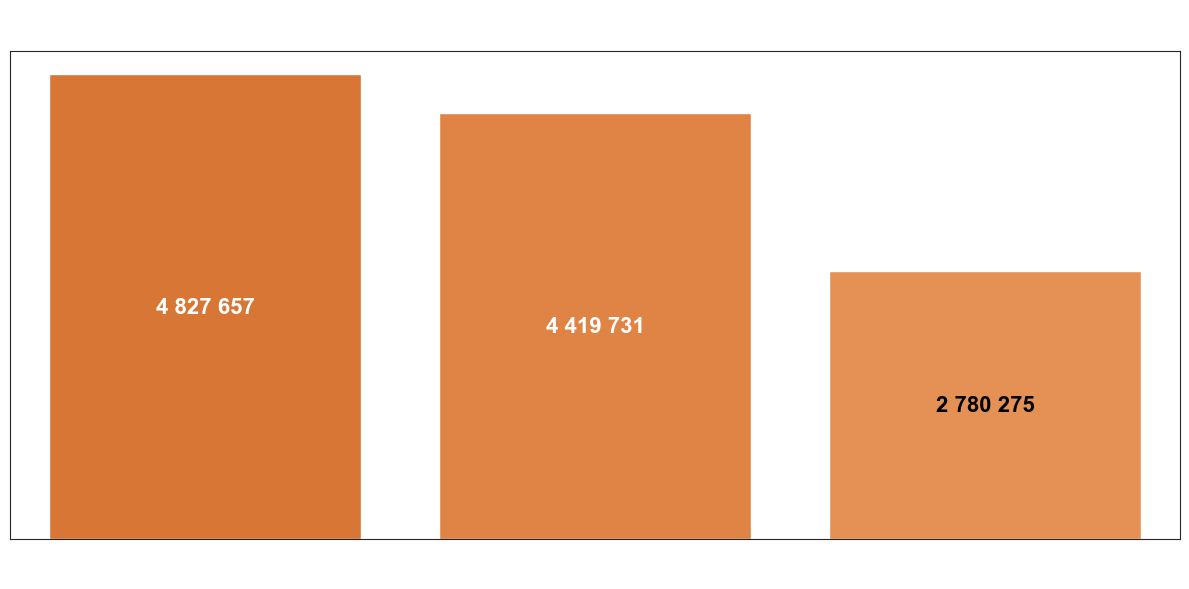

In [583]:
# Import de cm pour la création de dégradé de couleurs
import matplotlib.cm as cm

# --- Préparation des données ---
jointure_categorie = jointure.groupby('categ').agg({'price': 'sum'}).sort_values('price', ascending=False).reset_index()

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
categorie_ordre = jointure_categorie['categ']

n = len(jointure_categorie)  # récupère le nombre de catégories
cmap = plt.colormaps['Oranges_r']  # récupère la palette orange de Matplotlib YlOrBr_r

# On génère une liste de couleurs, du plus foncé (1.0) au plus clair (0.3)
colors = [cmap(0.4 + 0.1 * (i / (n - 1))) for i in range(n)]  # couleur de départ + amplitude x i en %   diviser par n-1 parce que commence à 0

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(categorie_ordre, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=jointure_categorie,
    x='categ',
    y='price', 
    hue='categ',
    dodge=False,
    order=categorie_ordre,
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height - height * 0.5, 
        f"{int(round(height)):,}".replace(",", " "),
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Chiffre d'affaires par catégorie", fontsize=14, color='white', pad=20)
ax.set_xlabel("Catégories", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/chiffre d'affaire par categorie.png", transparent=True)
plt.show()


## Chiffre d'affaire par genre

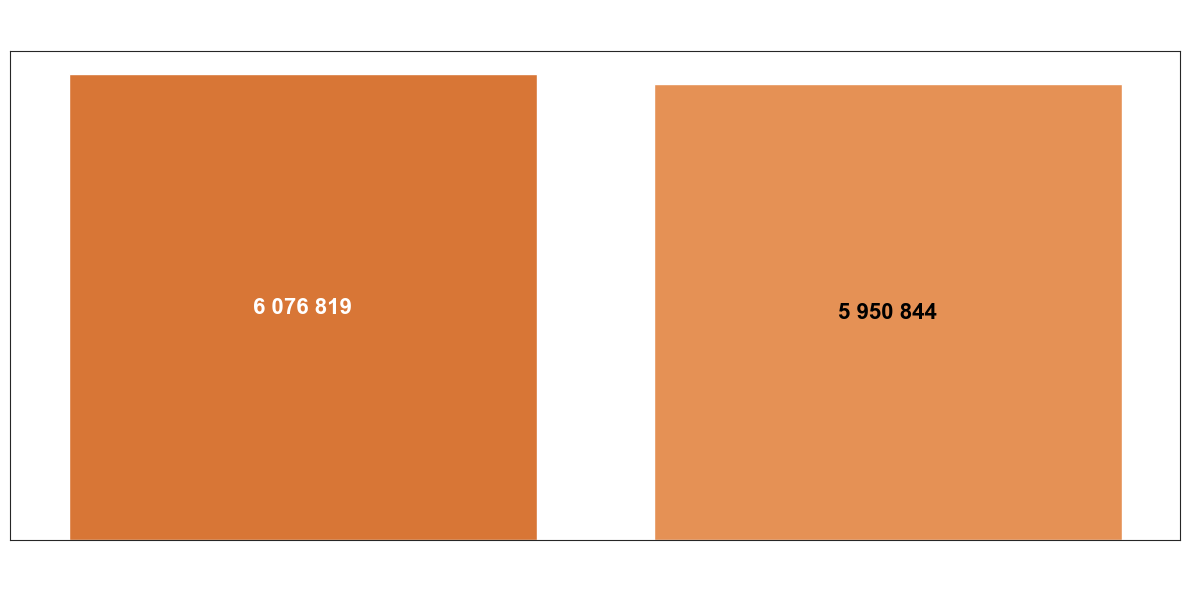

In [585]:
# --- Préparation des données ---
ca_genre = jointure.groupby('sex').agg({'price': 'sum'}).sort_values('price', ascending=False).reset_index()

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
ca_genre_ordre = ca_genre['sex']

n = len(ca_genre)  # récupère le nombre de catégories
cmap = plt.colormaps['Oranges_r']  # récupère la palette orange de Matplotlib YlOrBr_r

# On génère une liste de couleurs, du plus foncé (1.0) au plus clair (0.3)
colors = [cmap(0.4 + 0.1 * (i / (n - 1))) for i in range(n)]  # couleur de départ + amplitude x i en %   diviser par n-1 parce que commence à 0

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(ca_genre_ordre, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=ca_genre,
    x='sex',
    y='price', 
    hue='sex',
    dodge=False,
    order=ca_genre_ordre,
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height - height * 0.5, 
        f"{int(round(height)):,}".replace(",", " "),
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Chiffre d'affaires par genre", fontsize=14, color='white', pad=20)
ax.set_xlabel("Genre", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Chiffre d'affaire par genre.png", transparent=True)
plt.show()


<h1 style='color: orange;'>Analyse du nombre de clients, du nombre de transactions et du nombre de ventes</h1>

## Extraction des mois et des années

In [588]:
# Création de colonnes 'Année' et 'mois'
jointure_annee_mois=jointure.copy()
jointure_annee_mois['année']=jointure_annee_mois['date'].dt.year
jointure_annee_mois['mois']=jointure_annee_mois['date'].dt.month
jointure_annee_mois.head()

,prod_id,date,session_id,client_id,sex,birth,price,categ,année,mois
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0,2021,3
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0,2021,3
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0,2021,3
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0,2021,3
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0,2021,3


## Évolution du nombre de clients

### Les clients reviennent ils dans une journée? 

In [591]:
session_par_client=jointure.groupby(['client_id', 'date'])['session_id'].nunique().reset_index(name='nombre_session')
client_revenu=session_par_client.loc[session_par_client['nombre_session'] > 1]
print(client_revenu)
print()
print(f'Liste des nombres de sessions disctinctes par jour: {sorted(client_revenu['nombre_session'].unique().tolist())} ')
print()
print(f'''Liste des cleints qui commandent plus d\'une fois par jour et le nombre de session:
{client_revenu['client_id'].value_counts().sort_index()} ''')

       client_id       date  nombre_session
8            c_1 2021-10-15               2
102       c_1000 2021-12-01               2
105       c_1000 2022-01-30               3
106       c_1000 2022-02-07               2
112       c_1000 2022-03-07               2
...          ...        ...             ...
313361     c_990 2023-01-24               2
313368     c_990 2023-02-28               2
313478     c_996 2021-12-30               2
313504     c_996 2022-08-30               2
313506     c_996 2022-09-30               2

[15517 rows x 3 columns]

Liste des nombres de sessions disctinctes par jour: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27] 

Liste des cleints qui commandent plus d'une fois par jour et le nombre de session:
client_id
c_1       1
c_1000    6
c_1001    3
c_1006    8
c_1013    6
         ..
c_983     2
c_986     4
c_989     1
c_990     8
c_996     3
Name: count, Length: 2996, dtype: int64 


### Évolution du nombre de clients (distincts) sur les 2 ans

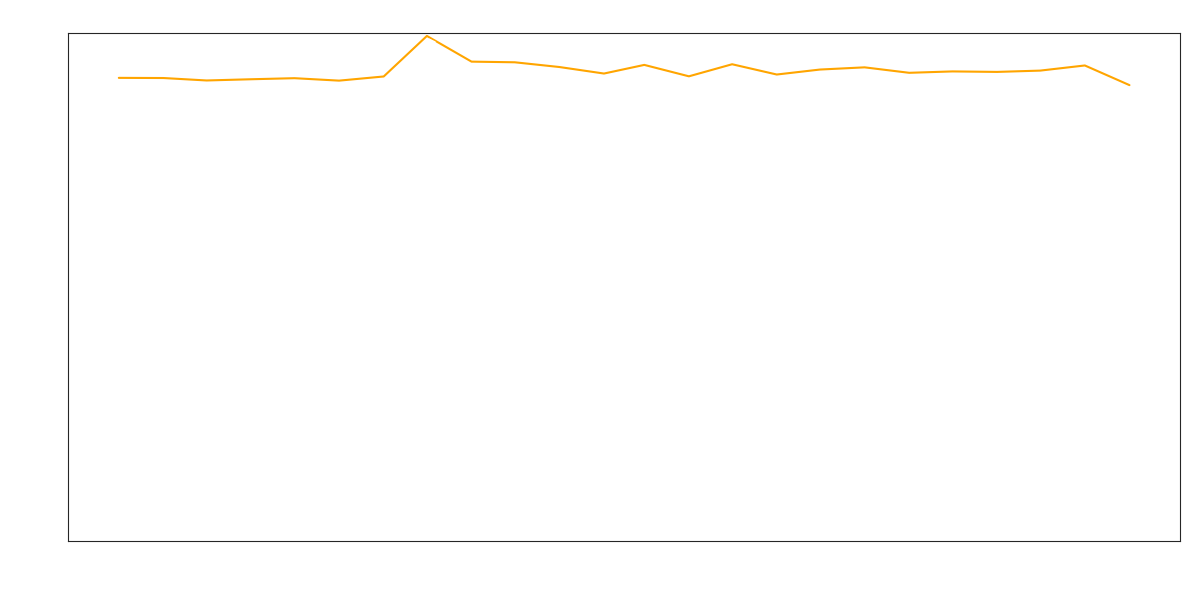

In [593]:
# Nombre de clients distincts par mois sur les 2 ans
client_distinct_mois_annee=(jointure_annee_mois.groupby(['année', 'mois'])['client_id'].nunique().
                            reset_index(name='nb de client distinct')
                           )

# Ajout d'une colonne 'date'
client_distinct_mois_annee['date']=pd.to_datetime(dict(year=client_distinct_mois_annee['année'],
                                                      month=client_distinct_mois_annee['mois'],
                                                      day=1))

# Création d'une courbe

# Configuration des styles Seaborn et Matplotlib
sns.set_style('white')

# Création de la figure et des axes avec couleurs personnalisées
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

sns.lineplot(data=client_distinct_mois_annee, x='date', y='nb de client distinct', color='orange', ax=ax)

ax.set_ylim(bottom=0)
ax.grid(False)
ax.set_title('Évolution du nombre de clients distincts par mois sur les 2 années d\'étude', color='white')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Nombre de clients', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')

legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

# Valeurs min et max
max_nombre = client_distinct_mois_annee['nb de client distinct'].idxmax()
min_nombre = client_distinct_mois_annee['nb de client distinct'].idxmin()

max_date = client_distinct_mois_annee.loc[max_nombre, 'date']
max_val = client_distinct_mois_annee.loc[max_nombre, 'nb de client distinct']

min_date = client_distinct_mois_annee.loc[min_nombre, 'date']
min_val = client_distinct_mois_annee.loc[min_nombre, 'nb de client distinct']

# Annotations
ax.annotate(f'Max: {max_val:.0f}', xy=(max_date, max_val),
            xytext=(max_date + timedelta(days=20), max_val - 1000),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')

ax.annotate(f'Min: {min_val:.0f}', xy=(min_date, min_val),
            xytext=(min_date - timedelta(days=60), min_val - 500),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.tight_layout()
plt.savefig('Graphiques/Nombre de clients distincts par mois sur les deux années.png', transparent=True)
plt.show()

### Nombre de clients (distincts) par mois

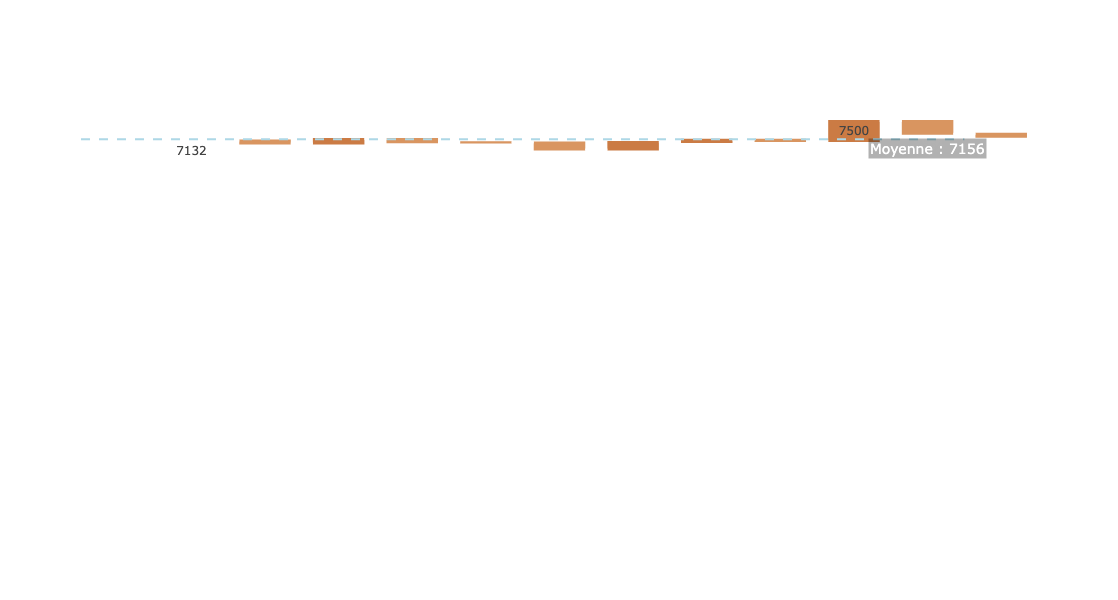

In [921]:
# Nombre de clients distincts par mois
client_distinct_mois=jointure_annee_mois.groupby('mois')['client_id'].nunique().reset_index(name='nb de client distinct')

# Calcul de la moyenne des clients distincts par mois
client_mean=round(client_distinct_mois['nb de client distinct'].mean())

import plotly.graph_objects as go

# Création d'un graphe en cascade

# Création d'une colonne 'différence'
client_distinct_mois['différence']=client_distinct_mois['nb de client distinct'].diff()
client_distinct_mois.loc[0, 'différence']=client_distinct_mois.loc[0, 'nb de client distinct']

# Création du graphique
fig = go.Figure(go.Waterfall(
    name="Évolution du nombre de clients distincts par mois",
    orientation="v",
    x=client_distinct_mois['mois'],
    text=client_distinct_mois['nb de client distinct'],
    y=client_distinct_mois['différence'],
    measure=['absolute'] + ['relative'] * (len(client_distinct_mois) - 1),
    connector={"line": {"color": "white"}},
    increasing={"marker": {"color": "#CB7B44"}},
    decreasing={"marker": {"color": "#D99560"}},
    totals={"marker": {"color": "white"}}
))

# Mise en page
fig.update_layout(
    title="Évolution du nombre de clients distincts par mois",
    title_font_color='white',
    waterfallgap=0.3,
    yaxis_title="Nombre de clients",
    xaxis=dict(title='Mois', 
               tickmode='array', 
               tickvals=list(client_distinct_mois['mois']),
               ticktext=list(client_distinct_mois['mois']),
               color='white'),
    yaxis=dict(range=[6000, None], showgrid=False, color='white'),
    font=dict(color='white', size=12),
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)', 
    height=600
)

# Ajout d'une ligne horizontale pour la moyenne
fig.add_shape(
    type='line',
    x0=-0.5,  # début (avant le premier mois)
    x1=len(client_distinct_mois)-0.5,  # fin (après le dernier mois)
    y0=client_mean,
    y1=client_mean,
    line=dict(color='lightblue', width=2, dash='dash'),
)

# Ajout d’un texte pour la ligne de moyenne
fig.add_annotation(
    x=len(client_distinct_mois)-1,  # vers la fin de l’axe x
    y=6800,
    text=f"Moyenne : {client_mean}",
    showarrow=False,
    yshift=10,
    font=dict(color='white', size=14),
    align='right',
    bgcolor='rgba(0,0,0,0.3)'
)


fig.write_image("Graphiques/Évolution du nombre de client distincts par mois.png", format="png", engine="kaleido")

fig.show()

## Évolution du nombre de transactions

### Évolution du nombre de transactions sur les 2 ans

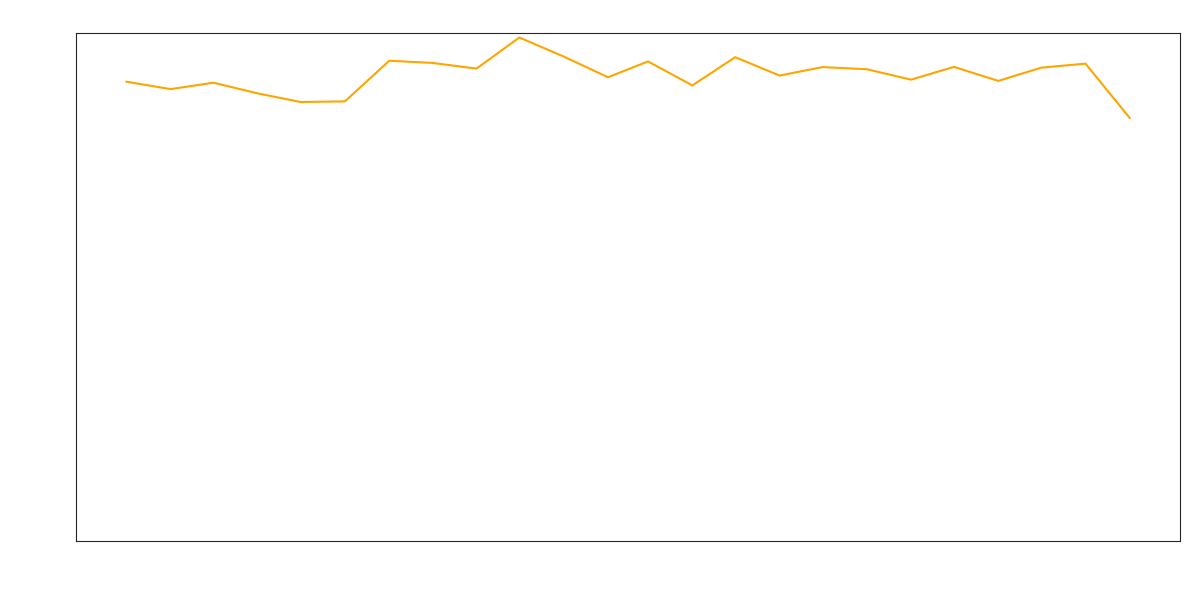

In [598]:
# Nombre de transacctions par mois sur les 2 années
transaction_annee_mois=(jointure_annee_mois.groupby(['année', 'mois'])['session_id'].nunique().
                        reset_index(name='nombre de transactions')
                       )
# Ajout d'une colonne 'date'
transaction_annee_mois['date']=pd.to_datetime(dict(year=transaction_annee_mois['année'],
                                              month=transaction_annee_mois['mois'],
                                              day=1))

# Création d'une courbe

# Configuration des styles Seaborn et Matplotlib
sns.set_style('white')

# Création de la figure et des axes avec couleurs personnalisées
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

sns.lineplot(data=transaction_annee_mois, x='date', y='nombre de transactions', color='orange', ax=ax)

ax.set_ylim(bottom=0)
ax.grid(False)
ax.set_title('Évolution du nombre de transactions par mois sur les 2 années d\'étude', color='white')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('nombre de transactions', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')

legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

# Valeurs min et max
max_nombre = transaction_annee_mois['nombre de transactions'].idxmax()
min_nombre = transaction_annee_mois['nombre de transactions'].idxmin()

max_date = transaction_annee_mois.loc[max_nombre, 'date']
max_val = transaction_annee_mois.loc[max_nombre, 'nombre de transactions']

min_date = transaction_annee_mois.loc[min_nombre, 'date']
min_val = transaction_annee_mois.loc[min_nombre, 'nombre de transactions']

# Annotations
ax.annotate(f'Max: {max_val:.0f}', xy=(max_date, max_val),
            xytext=(max_date + timedelta(days=10), max_val - 2000),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')

ax.annotate(f'Min: {min_val:.0f}', xy=(min_date, min_val),
            xytext=(min_date - timedelta(days=80), min_val - 500),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.tight_layout()
plt.savefig('Graphiques/Nombre de transactions par mois sur les deux années.png', transparent=True)
plt.show()

### Nombre de transactions par mois

In [600]:
# Nombre de visites par mois 
transaction_mois=jointure_annee_mois.groupby('mois')['session_id'].nunique().reset_index(name='nombre de transactions')

# Calcul de la moyenne des transactions par mois
transaction_mean=round(transaction_mois['nombre de transactions'].mean())

# Création d'un graphe en cascade

# Création d'une colonne 'différence'
transaction_mois['différence']=transaction_mois['nombre de transactions'].diff()
transaction_mois.loc[0, 'différence']=transaction_mois.loc[0, 'nombre de transactions']

# Création du graphique
fig = go.Figure(go.Waterfall(
    name="Évolution du nombre de transactions par mois",
    orientation="v",
    x=transaction_mois['mois'],
    text=transaction_mois['nombre de transactions'],
    y=transaction_mois['différence'],
    measure=['absolute'] + ['relative'] * (len(transaction_mois) - 1),
    connector={"line": {"color": "white"}},
    increasing={"marker": {"color": "#CB7B44"}},
    decreasing={"marker": {"color": "#D99560"}},
    totals={"marker": {"color": "white"}}
))

# Mise en page
fig.update_layout(
    title="Évolution du nombre de transactions par mois",
    title_font_color='white',
    waterfallgap=0.3,
    yaxis_title="Nombre de transactions",
    xaxis=dict(title='Mois', 
               tickmode='array', 
               tickvals=list(transaction_mois['mois']),
               ticktext=list(transaction_mois['mois']),
               color='white'),
    yaxis=dict(range=[6000, None], showgrid=False, color='white'),
    font=dict(color='white', size=12),
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)', 
    height=600
)

# Ajout d'une ligne horizontale pour la moyenne
fig.add_shape(
    type='line',
    x0=-0.5,  # début (avant le premier mois)
    x1=len(transaction_mois)-0.5,  # fin (après le dernier mois)
    y0=transaction_mean,
    y1=transaction_mean,
    line=dict(color='lightblue', width=2, dash='dash'),
)

# Ajout d’un texte pour la ligne de moyenne
fig.add_annotation(
    x=len(transaction_mois)-1,  # vers la fin de l’axe x
    y=23000,
    text=f"Moyenne : {transaction_mean}",
    showarrow=False,
    yshift=10,
    font=dict(color='white', size=14),
    align='right',
    bgcolor='rgba(0,0,0,0.3)'
)

fig.write_image("Graphiques/Évolution du nombre de transactions par mois.png", format="png", engine="kaleido")

fig.show()

## Évolution du nombre des ventes

### Évolution des ventes sur les 2 ans

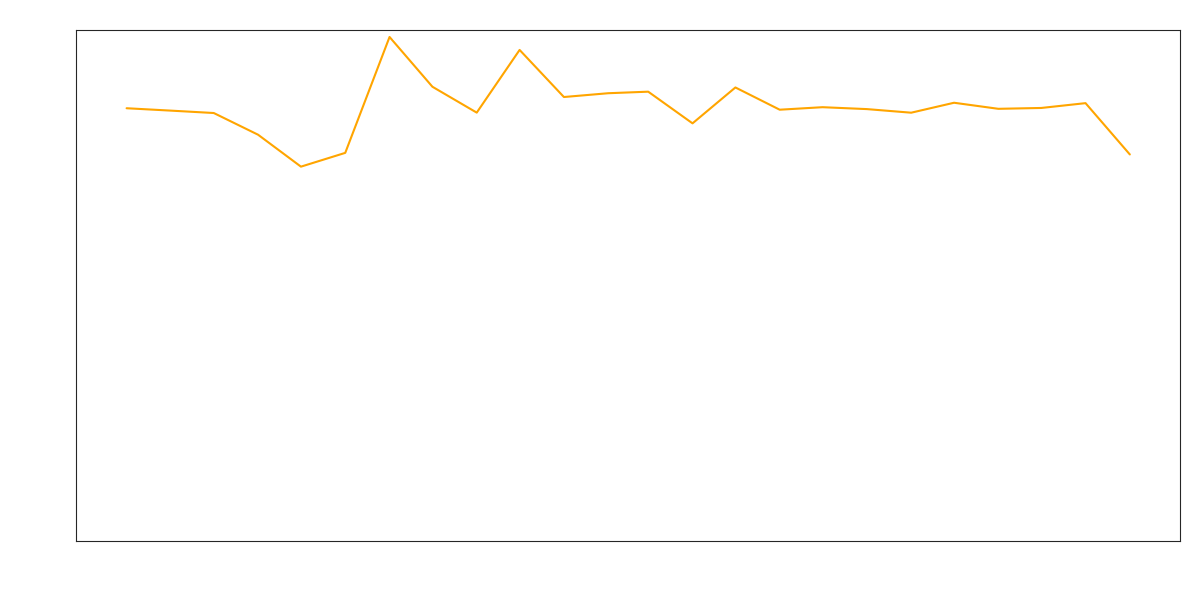

In [603]:
# Nombre de transacctions par mois sur les 2 années
vente_annee=(jointure_annee_mois.groupby(['année', 'mois'])['prod_id'].count().
                        reset_index(name='nombre de produits vendus')
                       )
# Ajout d'une colonne 'date'
vente_annee['date']=pd.to_datetime(dict(year=vente_annee['année'],
                                        month=vente_annee['mois'],
                                        day=1))

# Création d'une courbe

# Configuration des styles Seaborn et Matplotlib
sns.set_style('white')

# Création de la figure et des axes avec couleurs personnalisées
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

sns.lineplot(data=vente_annee, x='date', y='nombre de produits vendus', color='orange', ax=ax)

ax.set_ylim(bottom=0)
ax.grid(False)
ax.set_title('Évolution des ventes sur les 2 années d\'étude', color='white')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('nombre de produits vendus', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')

legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

# Valeurs min et max
max_nombre = vente_annee['nombre de produits vendus'].idxmax()
min_nombre = vente_annee['nombre de produits vendus'].idxmin()

max_date = vente_annee.loc[max_nombre, 'date']
max_val = vente_annee.loc[max_nombre, 'nombre de produits vendus']

min_date = vente_annee.loc[min_nombre, 'date']
min_val = vente_annee.loc[min_nombre, 'nombre de produits vendus']

# Annotations
ax.annotate(f'Max: {max_val:.0f}', xy=(max_date, max_val),
            xytext=(max_date + timedelta(days=25), max_val - 2000),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')

ax.annotate(f'Min: {min_val:.0f}', xy=(min_date, min_val),
            xytext=(min_date - timedelta(days=60), min_val - 2000),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.tight_layout()
plt.savefig('Graphiques/Évolutions du nombre de produits vendus sur les deux années.png', transparent=True)
plt.show()

### Évolution des ventes par mois 

In [605]:
# Nombre de visites par mois 
vente_mois=jointure_annee_mois.groupby('mois')['prod_id'].count().reset_index(name='nombre de produits vendus')

# Calcul de la moyenne des ventes
vente_mean=round(vente_mois['nombre de produits vendus'].mean())

# Création d'un graphe en cascade

# Création d'une colonne 'différence'
vente_mois['différence']=vente_mois['nombre de produits vendus'].diff()
vente_mois.loc[0, 'différence']=vente_mois.loc[0, 'nombre de produits vendus']

# Création du graphique
fig = go.Figure(go.Waterfall(
    name="Évolution du nombre de vente de produits par mois",
    orientation="v",
    x=vente_mois['mois'],
    text=vente_mois['nombre de produits vendus'],
    y=vente_mois['différence'],
    measure=['absolute'] + ['relative'] * (len(vente_mois) - 1),
    connector={"line": {"color": "white"}},
    increasing={"marker": {"color": "#CB7B44"}},
    decreasing={"marker": {"color": "#D99560"}},
    totals={"marker": {"color": "white"}}
))

# Mise en page
fig.update_layout(
    title="Évolution des ventes par mois",
    title_font_color='white',
    waterfallgap=0.3,
    yaxis_title="Nombre de produits vendus",
    xaxis=dict(title='Mois', 
               tickmode='array', 
               tickvals=list(vente_mois['mois']),
               ticktext=list(vente_mois['mois']),
               color='white'),
    yaxis=dict(range=[6000, None], showgrid=False, color='white'),
    font=dict(color='white', size=12),
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='rgba(0,0,0,0)', 
    height=600
)

# Ajout d'une ligne horizontale pour la moyenne
fig.add_shape(
    type='line',
    x0=-0.5,  # début (avant le premier mois)
    x1=len(vente_mois)-0.5,  # fin (après le dernier mois)
    y0=vente_mean,
    y1=vente_mean,
    line=dict(color='lightblue', width=2, dash='dash'),
)

# Ajout d’un texte pour la ligne de moyenne
fig.add_annotation(
    x=len(vente_mois)-1,  # vers la fin de l’axe x
    y=40000,
    text=f"Moyenne : {vente_mean}",
    showarrow=True,
    yshift=10,
    font=dict(color='white', size=14),
    align='right',
    bgcolor='rgba(0,0,0,0.3)'
)

fig.write_image("Graphiques/Évolution du nombre de produits vendus par mois.png", format="png", engine="kaleido")

fig.show()

<h1 style='color: orange;'>Top et Flop</h1>

## Les 10 articles les plus vendus

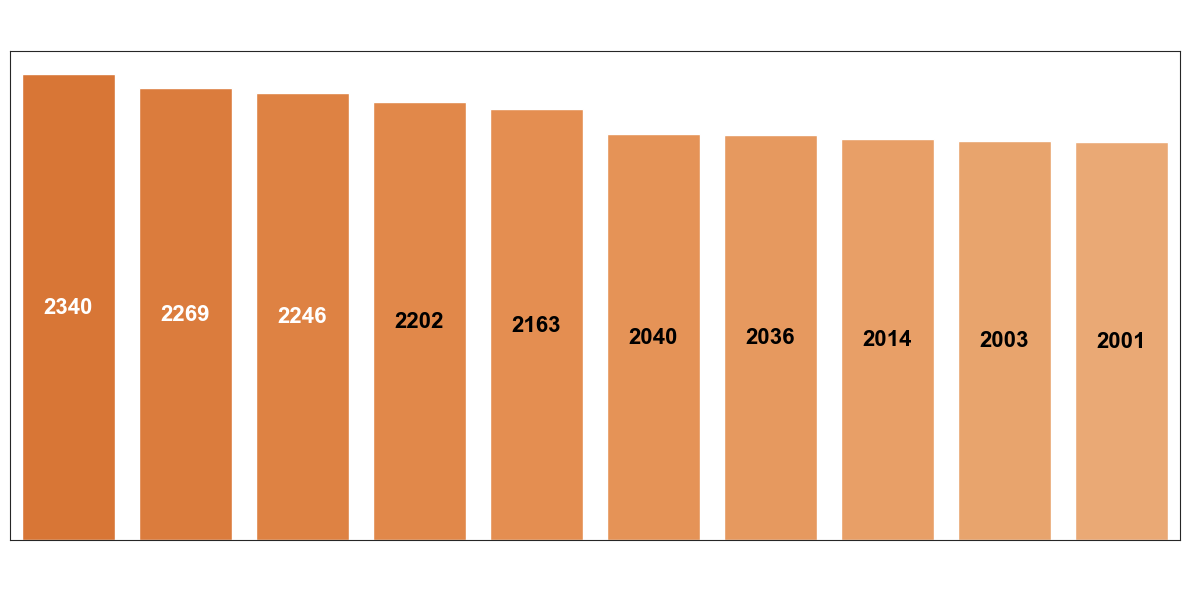

In [608]:
# Création d'un ddataframe avec les 10 articles les plus vendus
top_10_vente=(jointure.groupby('prod_id').size().reset_index(name='nombre_vente')
              .sort_values('nombre_vente', ascending=False).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
top_10_ordre = top_10_vente['prod_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(top_10_vente)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(top_10_ordre, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=top_10_vente,
    x='prod_id',
    y='nombre_vente', 
    order=top_10_ordre,
    hue='prod_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 articles les plus vendus", fontsize=14, color='white', pad=20)
ax.set_xlabel("Articles", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 articles les plus vendus.png", transparent=True)
plt.show()



## Les 10 articles qui génèrent le plus de chiffre d'affaire

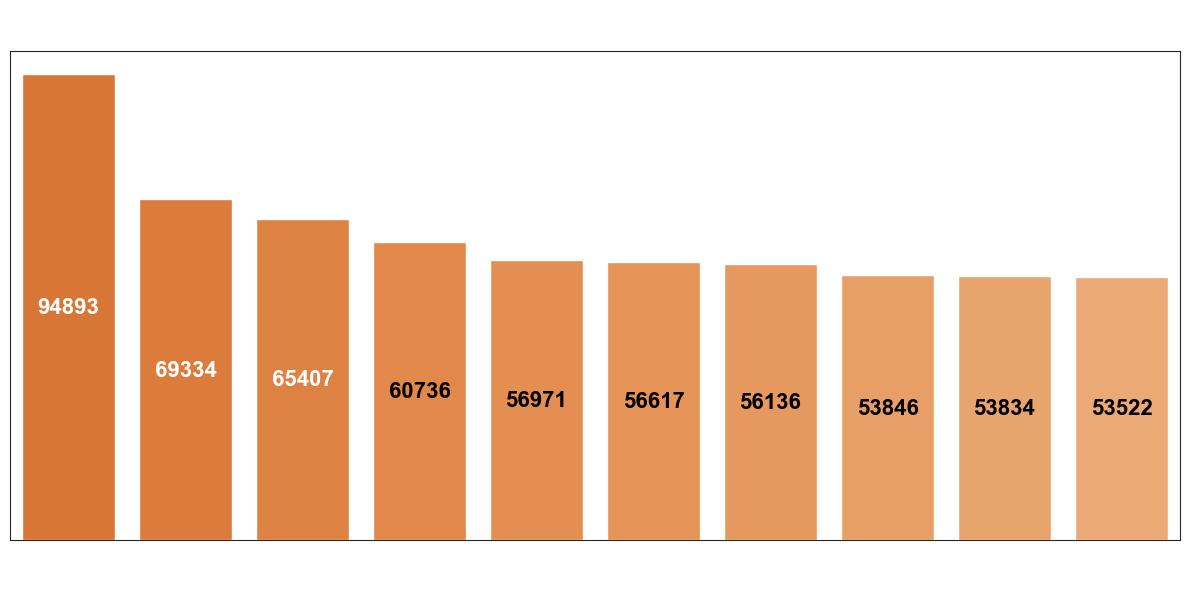

In [610]:
# Création d'un ddataframe avec les 10 articles les plus vendus
top_10_ca=(jointure.groupby('prod_id')['price'].sum().reset_index(name='ca')
           .sort_values('ca', ascending=False).head(10)
          )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
top_10_ordre_ca = top_10_ca['prod_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(top_10_ca)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(top_10_ordre_ca, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=top_10_ca,
    x='prod_id',
    y='ca', 
    order=top_10_ordre_ca,
    hue='prod_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 articles qui génèrent le plus de CA", fontsize=14, color='white', pad=20)
ax.set_xlabel("Articles", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 articles qui génèrent le plus de CA.png", transparent=True)
plt.show()



## Les 10 articles les moins vendus

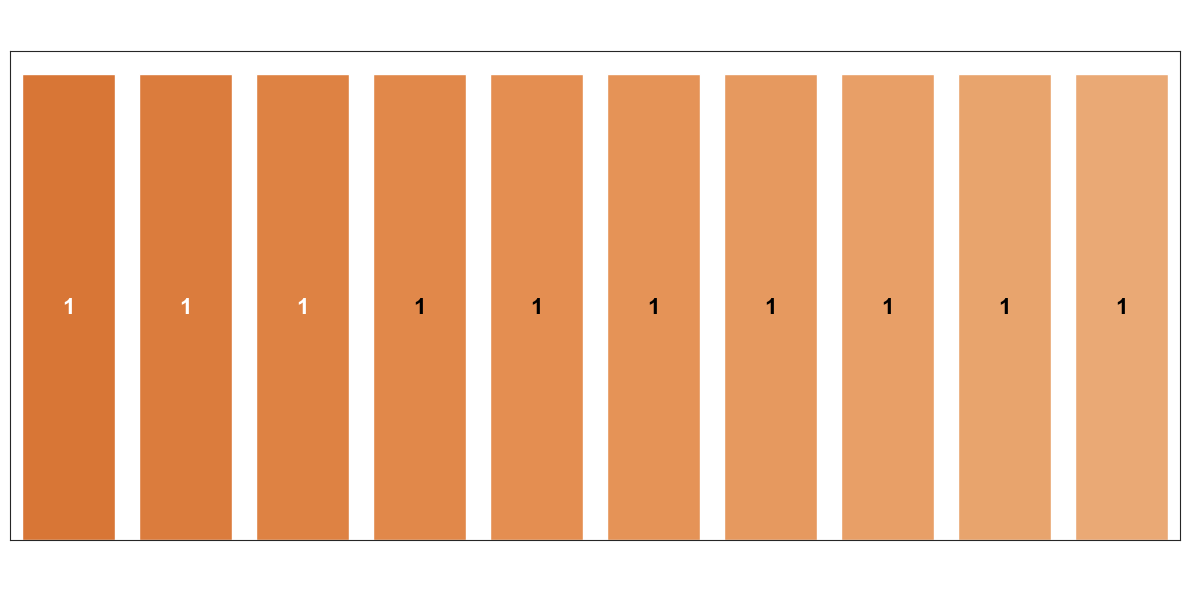

In [612]:
# Création d'un ddataframe avec les 10 articles les plus vendus
flop_10_vente=(jointure.groupby('prod_id').size().reset_index(name='nombre_vente')
              .sort_values('nombre_vente', ascending=True).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
flop_10_ordre = flop_10_vente['prod_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(flop_10_vente)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(flop_10_ordre, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=flop_10_vente,
    x='prod_id',
    y='nombre_vente', 
    order=flop_10_ordre,
    hue='prod_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 articles les moins vendus", fontsize=14, color='white', pad=20)
ax.set_xlabel("Articles", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 articles les moins vendus.png", transparent=True)
plt.show()



### Combien d'articles n'ont été vendus q'une seule fois

In [614]:
nombre_vente=jointure.groupby('prod_id').size().reset_index(name='nombre_vente')
vente_1=nombre_vente.loc[nombre_vente['nombre_vente'] == 1]
        
print(f'Nombre d\'articles vendus une seule fois: {vente_1.shape[0]}'  )
print(f'Liste des articles vendus une seule fois: {vente_1['prod_id'].tolist()}  ')

Nombre d'articles vendus une seule fois: 18
Liste des articles vendus une seule fois: ['0_1151', '0_1284', '0_1379', '0_1498', '0_1539', '0_1601', '0_1633', '0_1683', '0_1728', '0_2201', '0_541', '0_549', '0_807', '0_833', '0_886', '2_23', '2_81', '2_98']  


### Les 10 articles les moins vendus en dehors de ceux vendus une seule fois

In [616]:
flop_10_vente_sup_1=nombre_vente.loc[nombre_vente['nombre_vente'] > 1].sort_values('nombre_vente').head(10)
flop_10_vente_sup_1

,prod_id,nombre_vente
2628,1_402,2
884,0_1803,2
2159,0_88,2
1687,0_453,2
925,0_1840,2
2648,1_420,2
657,0_1595,2
589,0_1533,2
237,0_1215,2
719,0_1653,2


### Nombres d'articles vendus moins de 10 fois

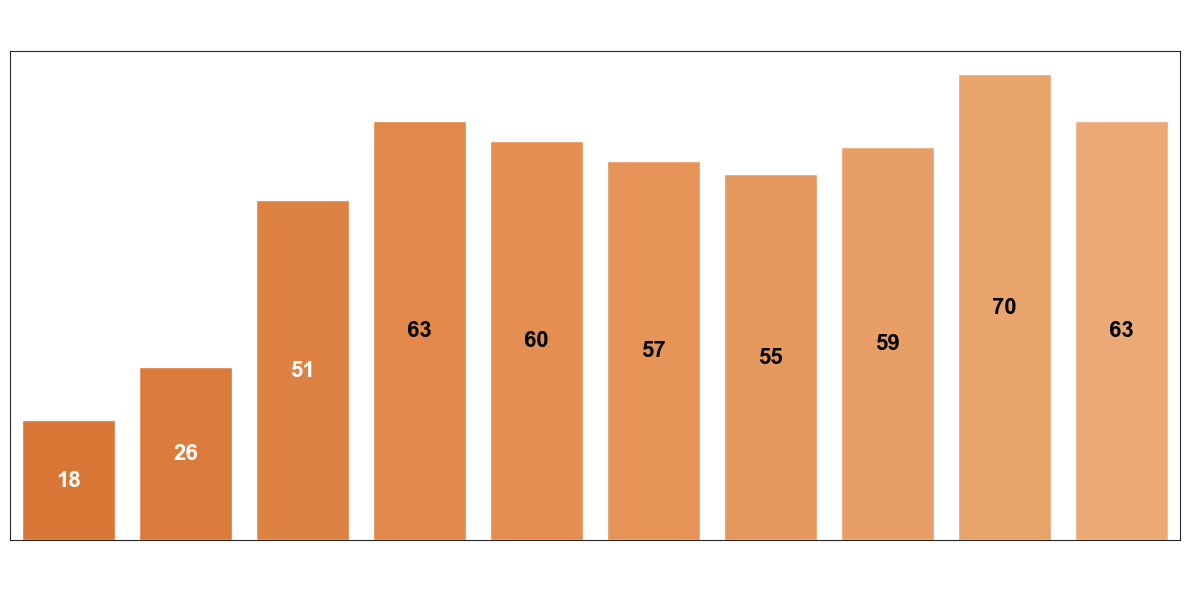

In [618]:
# Création d'un dataframe avec le nombre de vente et le nombre d'articles vendus / nombre de vente
flop_vente=(nombre_vente.groupby('nombre_vente').agg(prod_id=('prod_id', 'sum'),
                                                     nombre=('prod_id', 'count')
                                                    )
            .reset_index()
            )

# Conservation des articles vendus moins de 10 fois
flop_vente_10_fois=flop_vente.loc[flop_vente['nombre_vente'] <= 10]

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
flop_10_fois_ordre = flop_vente_10_fois['nombre_vente'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(flop_vente_10_fois)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(flop_10_fois_ordre, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=flop_vente_10_fois,
    x='nombre_vente',
    y='nombre', 
    order=flop_10_fois_ordre,
    hue='nombre_vente',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Nombre d'articles vendus moins de 10 fois", fontsize=14, color='white', pad=20)
ax.set_xlabel("Nombre de ventes", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Nombre d'articles vendus moins de 10 fois.png", transparent=True)
plt.show()



## Les 10 articles qui génèrent le moins de CA

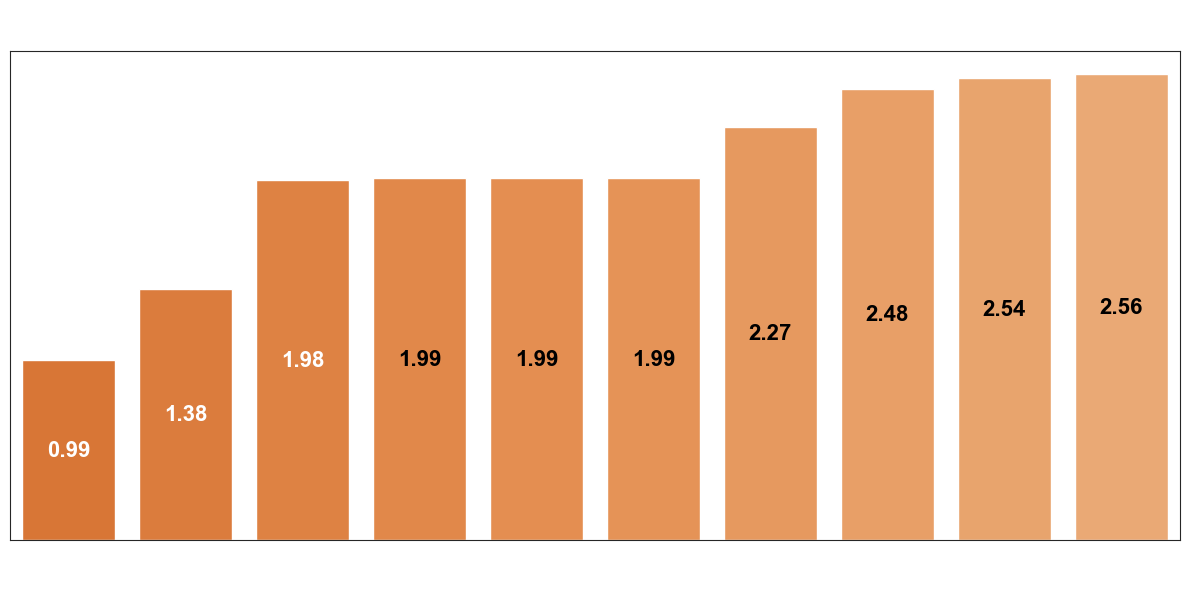

In [620]:
# Création d'un ddataframe avec les 10 articles les plus vendus
flop_10_ca=(jointure.groupby('prod_id')['price'].sum().reset_index(name='ca')
           .sort_values('ca', ascending=True).head(10)
          )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
flop_10_ordre_ca = flop_10_ca['prod_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(flop_10_ca)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(flop_10_ordre_ca, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=flop_10_ca,
    x='prod_id',
    y='ca', 
    order=flop_10_ordre_ca,
    hue='prod_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{float(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 articles qui génèrent le moins de CA", fontsize=14, color='white', pad=20)
ax.set_xlabel("Articles", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 articles qui génèrent le moins de CA.png", transparent=True)
plt.show()



In [621]:
# Nombre de ventes de ces articles
liste_flop=flop_10_ca['prod_id'].tolist()
nombre_vente_flop=(jointure.loc[jointure['prod_id'].isin(liste_flop)]
                   .groupby('prod_id')
                   .size()
                   .reset_index(name='nombre_vente')
                   .sort_values('nombre_vente')
                  )
print(nombre_vente_flop)

  prod_id  nombre_vente
0  0_1284             1
1  0_1498             1
2  0_1539             1
3  0_1601             1
5  0_1728             1
7   0_541             1
8   0_807             1
4  0_1653             2
6  0_1840             2
9   0_898             2


## Les 10 clients qui achètent le plus

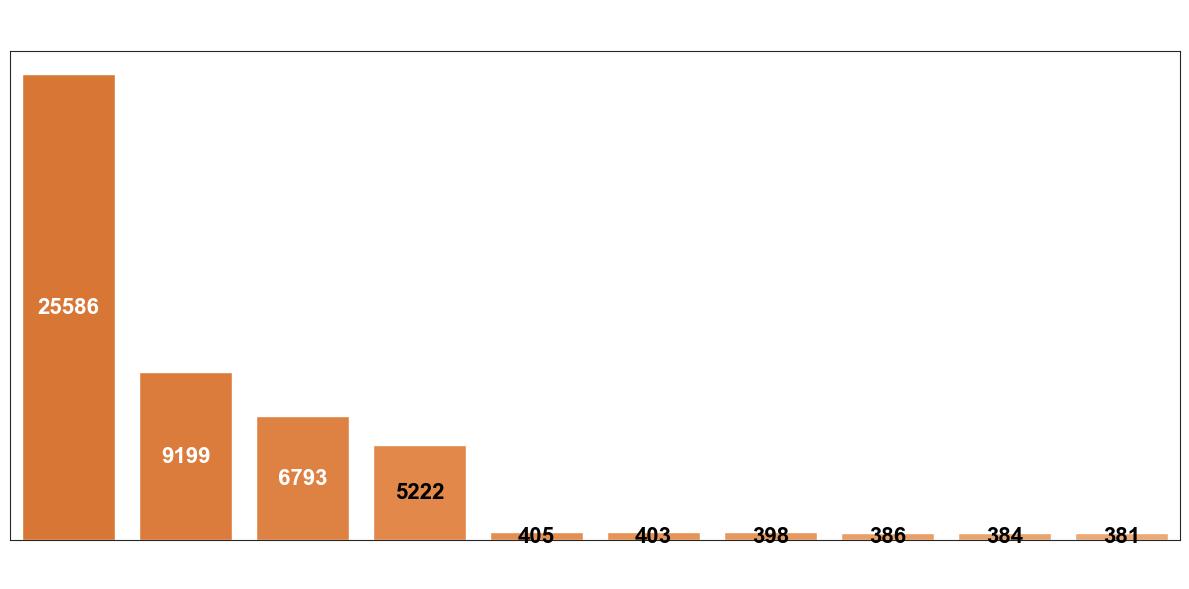

In [623]:
# Création d'un ddataframe avec les 10 articles les plus vendus
top_10_client=(jointure.groupby('client_id')['prod_id'].count().reset_index(name='nombre_achat')
              .sort_values('nombre_achat', ascending=False).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
top_10_ordre_client = top_10_client['client_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(top_10_client)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(top_10_ordre_client, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=top_10_client,
    x='client_id',
    y='nombre_achat', 
    order=top_10_ordre_client,
    hue='client_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 clients qui achètent le plus", fontsize=14, color='white', pad=20)
ax.set_xlabel("Clients", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 clients qui achètent le plus.png", transparent=True)
plt.show()



## Les 10 clients qui génèrent le plus de CA

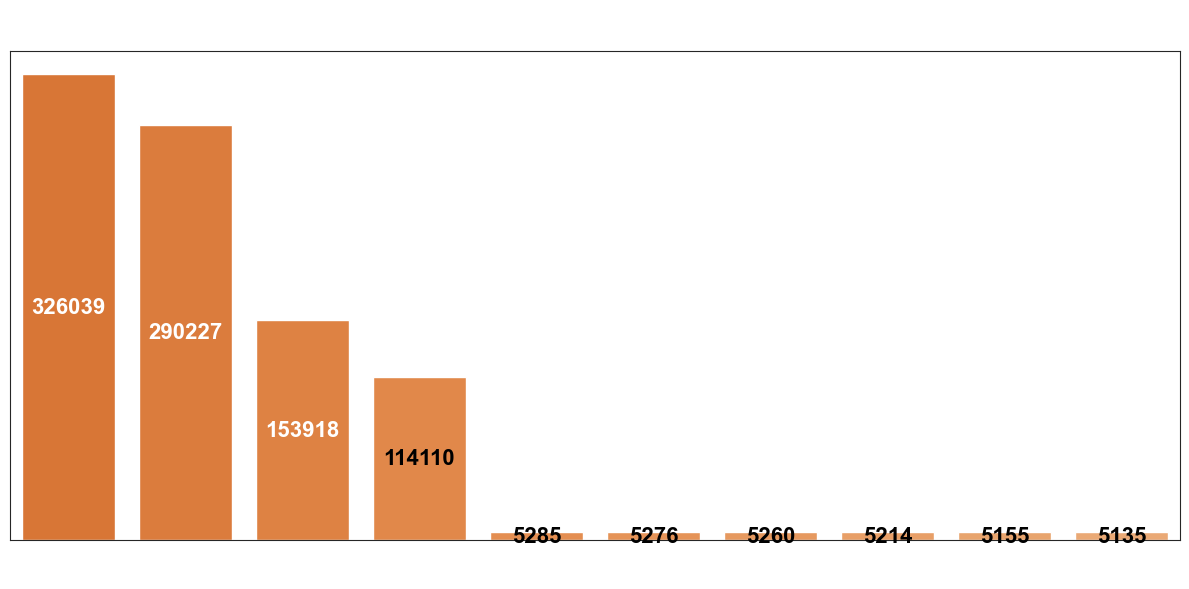

In [625]:
# Création d'un ddataframe avec les 10 articles les plus vendus
top_10_client_ca=(jointure.groupby('client_id')['price'].sum().reset_index(name='ca_total')
              .sort_values('ca_total', ascending=False).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
top_10_ordre_client_ca = top_10_client_ca['client_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(top_10_client_ca)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(top_10_ordre_client_ca, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=top_10_client_ca,
    x='client_id',
    y='ca_total', 
    order=top_10_ordre_client_ca,
    hue='client_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 clients qui génèrent le plus de CA", fontsize=14, color='white', pad=20)
ax.set_xlabel("Clients", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 clients qui génèrent le plus de CA.png", transparent=True)
plt.show()



## Ces sont les mêmes clients qui achètent le plus et qui génèrent le plus de CA

## Les 10 clients qui achètent le moins

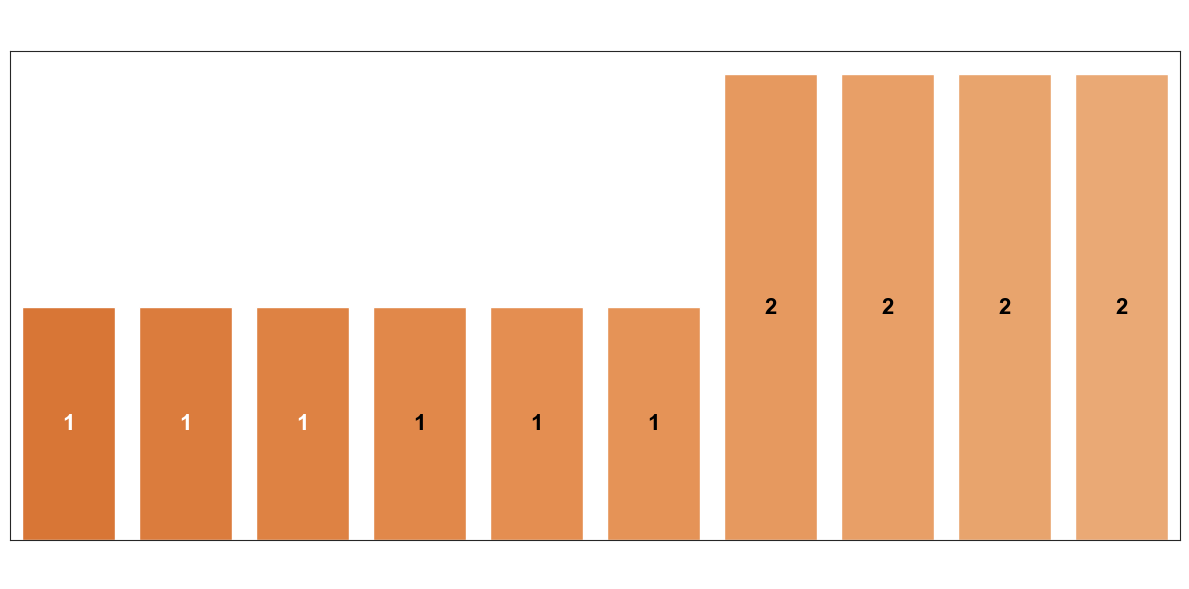

In [628]:
# Création d'un ddataframe avec les 10 articles les plus vendus
flop_10_client=(jointure.groupby('client_id')['prod_id'].count().reset_index(name='nombre_achat')
              .sort_values('nombre_achat', ascending=True).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
flop_10_ordre_client = flop_10_client['client_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(flop_10_client)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(flop_10_ordre_client, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=flop_10_client,
    x='client_id',
    y='nombre_achat', 
    order=flop_10_ordre_client,
    hue='client_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 clients qui achètent le moins", fontsize=14, color='white', pad=20)
ax.set_xlabel("Clients", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 clients qui achètent le moins.png", transparent=True)
plt.show()



## Les 10 clients qui génèrent le moins de CA

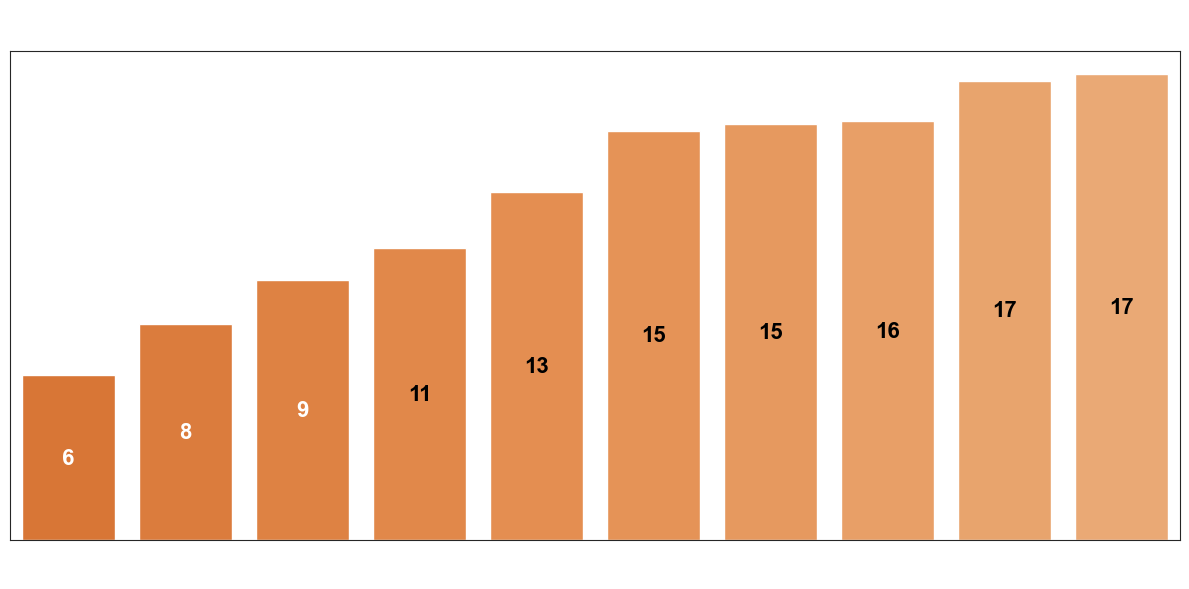

In [630]:
# Création d'un ddataframe avec les 10 articles les plus vendus
flop_10_client_ca=(jointure.groupby('client_id')['price'].sum().reset_index(name='ca_total')
              .sort_values('ca_total', ascending=True).head(10)
             )

# Liste des catégories dans l'ordre voulu, respecte l'ordre de jointure_categorie
flop_10_ordre_client_ca = flop_10_client_ca['client_id'].tolist()

# --- Création d'une palette de dégradé orangé ---
n = len(flop_10_client_ca)
cmap = plt.colormaps["Oranges"]  # Dégradé orangé
colors = [cmap(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]  # Le plus élevé en orange vif

# On crée un dict palette pour Seaborn en respectant l'ordre des catégories
palette = dict(zip(flop_10_ordre_client_ca, colors))  # zip forme des couples

# --- Création du graphique ---
sns.set_style('white')  # Plus minimal
fig, ax = plt.subplots(figsize=(12, 6))

# --- Barplot ---
sns.barplot(
    data=flop_10_client_ca,
    x='client_id',
    y='ca_total', 
    order=flop_10_ordre_client_ca,
    hue='client_id',
    palette=palette,
    ax=ax, 
    legend=False
)

# --- Affichage des valeurs dans les barres ---
for bar in ax.patches:  # ax.patches contient les formes du graphes
    height = bar.get_height()  # Récupère la valeur des barres
    x = bar.get_x() + bar.get_width() / 2  # Défini la position au milieu de la barre en x

    # Calcul contraste texte/barre
    bar_color = bar.get_facecolor()  # Récupère les valeurs RGB des couleurs des barres
    brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]  # Formule normée donne une approximation de la clarté de la couleur
    text_color = 'black' if brightness > 0.6 else 'white'                            # 0 --> couleur sombre, 1 --> couleur claire 

    ax.text(
        x,
        height * 0.5, 
        f"{int(height)}",
        ha='center',
        va='center',
        color=text_color,
        fontsize=16,
        fontweight='bold'
    )


# --- Suppression de l'axe des Y et lignes de grille ---
ax.yaxis.set_visible(False)
ax.set_yticks([])
ax.grid(False)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# --- Titre et axes ---
ax.set_title("Les 10 clients qui génèrent le moins de CA", fontsize=14, color='white', pad=20)
ax.set_xlabel("Clients", color='white')
ax.set_ylabel("")  # pas besoin

# --- Couleurs des ticks en blanc ---
ax.tick_params(axis='x', colors='white')

# --- Fond transparent ---
fig.patch.set_facecolor('none')
ax.set_facecolor('none')

# --- Mise en page et export ---
plt.tight_layout()
plt.savefig("Graphiques/Les 10 clients qui génèrent le moins de CA.png", transparent=True)
plt.show()



<h1 style='color: orange;'>Le 20/80</h1>

## Les articles qui génèrent 80% du CA

In [633]:
# Calcul du CA
CA=jointure['price'].sum()
print()
print(f'CA total: {round(CA/1000000, 6)} millions d\'Euros')

# Création d'une table pour le calcul
ca_article=jointure.groupby('prod_id')['price'].sum().reset_index(name='CA par article')

# Création d'une colonne de % de CA par article
ca_article['pourcentage CA']=ca_article['CA par article'] / CA * 100

# Classement par pourcentage descendant
ca_article=ca_article.sort_values('pourcentage CA', ascending=False)

# Création d'une colonne de pourcentage cumulé
ca_article['pourcentage CA cumulé']=ca_article['pourcentage CA'].cumsum()

# Nombre d'articles qui représentent 80% du CA
nombre_article_80=ca_article.loc[ca_article['pourcentage CA cumulé'] <= 80].count()

# Nombre total d'article 
nombre_total_article=jointure['prod_id'].nunique()

# Pourcentage d'article qui représentent 80% du CA
pct_article_80=round(nombre_article_80 / nombre_total_article * 100)

print(f'''Nombre d\'articles qui génèrent 80% du CA: {nombre_article_80['prod_id']}
Pourcentage d'articles qui génèrent 80% du CA: {pct_article_80['prod_id']}%
''')
if pct_article_80['prod_id'] < 25:
    print('20% des articles génèrent 80% du CA!' )
else:
    print('20% des articles ne génèrent pas 80M du CA')
print()


CA total: 12.027663 millions d'Euros
Nombre d'articles qui génèrent 80% du CA: 699
Pourcentage d'articles qui génèrent 80% du CA: 21.0%

20% des articles génèrent 80% du CA!



<h1 style='color: orange;'>Répartition par catégories</h1>

## Création d'une table pour les graphes

In [636]:
# Création d'une table groupée par catégories
repartition_categorie=jointure.groupby('categ').agg(
    quantité=('prod_id', 'count'), 
    total_price=('price', 'sum')
).reset_index()
repartition_categorie

,categ,quantité,total_price
0,0,415459,4419730.97
1,1,235592,4827657.11
2,2,36483,2780275.02


## Graphiques

In [638]:
'''Création d'une fonction pour générer un graphe en anneau'''

def donut_chart(data, value_col, label_col='categ', palette='Oranges', title='', xpos='', xneg=''):
    data=data.sort_values(by=value_col, ascending=False).reset_index(drop=True)
    values=data[value_col]
    labels=data[label_col]

    # Création du dégradé de couleurs en fonctoin de la colonne value_col
    colors=sns.color_palette(palette, len(values))[::-1]  # Inverse l'ordre des couleurs

    # Création du graphe
    fig, ax=plt.subplots(figsize=(12, 6))
    fig.patch.set_alpha(0)  # fond transparent

    wedges, text, autotext=ax.pie(
        values, 
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'width':0.4, 'edgecolor':'white'}, 
        pctdistance=0.75
    )

    # Ajout des catégories au dessus des pourcentages
    for i, (wedge, label) in enumerate(zip(wedges, labels)):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle)) * 0.81
        y = np.sin(np.deg2rad(angle)) * 0.75
        if x < 0:            # Modifie la position des textes 'catégories'
            x = x + xneg
        else:
            x = x + xpos
        ax.text(x, y + 0.12, f'Catégorie {label}', ha='center', va='center', fontsize=10, color='black', weight='bold')

    for auto in autotext:
        auto.set_color('black')
        auto.set_fontsize(10) 
        auto.set_fontweight('bold')

    # Titre
    ax.set_title(title, fontsize=14, color='white')
    ax.axis('equal') # Cercle parfait

    plt.savefig(f'Graphiques/{title}.png', transparent=True)
    plt.tight_layout()
    plt.show()

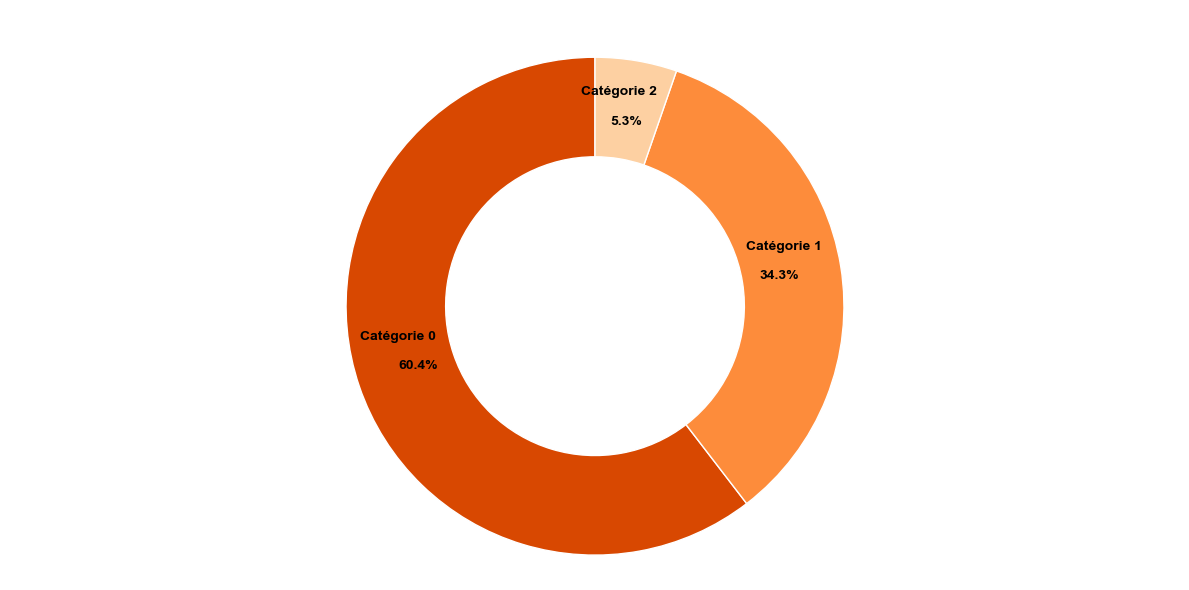

In [639]:
'''Répartition des ventes par catégories'''

donut_chart(repartition_categorie, 'quantité', title='Répartion du nombre de ventes par catégories',
           xpos=-0.04, xneg=-0.025)


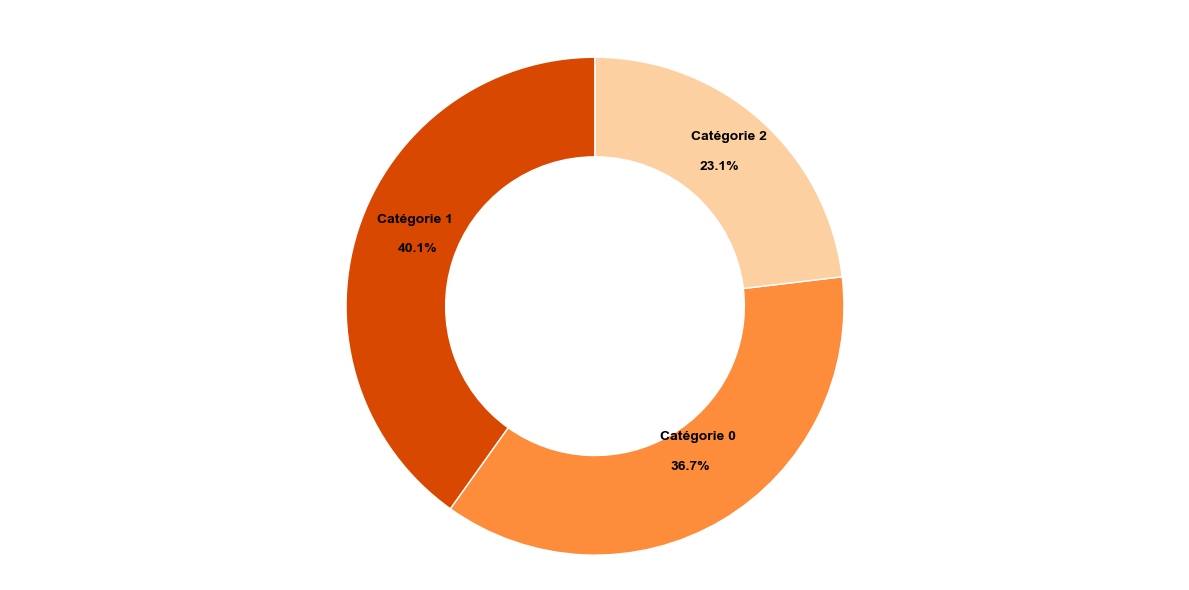

In [640]:
'''Réaprtition du chiffre d'affaire par catégorie '''

donut_chart(repartition_categorie, 'total_price', title='Répartion du chiffre d\'affaire par catégories',
           xpos=0.0, xneg=0.05)


<h1 style='color: orange;'>Top 10 et Flop 10 des articles les plus / les moins vendus par catégorie</h1>

## Top 10 quantité

In [643]:
'''Compter le nombre d'articles vendus par catégorie '''

quantite_categorie=jointure.groupby(['categ', 'prod_id']).size().reset_index(name='quantité')

'''Top 10 par catégories'''
top_10_categorie=quantite_categorie.sort_values(['categ', 'quantité'], ascending=[True, False]).groupby('categ').head(10)

'''Liste des catégories'''
top_10_categories=sorted(top_10_categorie['categ'].unique())

'''Création d'un ensemble vide pour analyses ultérieures'''
top_qte=set()

'''Affichage des articles'''
for cat in top_10_categories:
    top_10=top_10_categorie.loc[top_10_categorie['categ'] == cat, ['prod_id', 'quantité']]
    top_qte.update(top_10['prod_id'].tolist())
    print(f'\n Les 10 produits les plus vendus de la catégorie {cat}: ')
    for i, row in enumerate(top_10.itertuples(index=False), start=1):
        print(f'{i}. {row.prod_id} - {row.quantité}')


 Les 10 produits les plus vendus de la catégorie 0: 
1. 0_1422 - 1292
2. 0_1431 - 1282
3. 0_1425 - 1266
4. 0_1432 - 1254
5. 0_1411 - 1246
6. 0_1428 - 1245
7. 0_0 - 1242
8. 0_1424 - 1238
9. 0_1434 - 1235
10. 0_1441 - 1235

 Les 10 produits les plus vendus de la catégorie 1: 
1. 1_369 - 2340
2. 1_417 - 2269
3. 1_414 - 2246
4. 1_498 - 2202
5. 1_425 - 2163
6. 1_403 - 2040
7. 1_413 - 2036
8. 1_412 - 2014
9. 1_406 - 2003
10. 1_407 - 2001

 Les 10 produits les plus vendus de la catégorie 2: 
1. 2_102 - 1027
2. 2_135 - 1005
3. 2_112 - 968
4. 2_39 - 915
5. 2_37 - 882
6. 2_110 - 865
7. 2_208 - 831
8. 2_209 - 814
9. 2_207 - 786
10. 2_109 - 744


## Flop 10 quantité

In [645]:
# Détermination des 10 articles les moins vendus
flop_10_categorie=quantite_categorie.sort_values(['categ', 'quantité'], ascending=([True, True])).groupby('categ').head(10)
flop_10_categorie.head(30)

,categ,prod_id,quantité
166,0,0_1151,1
313,0,0_1284,1
417,0,0_1379,1
549,0,0_1498,1
595,0,0_1539,1
665,0,0_1601,1
698,0,0_1633,1
752,0,0_1683,1
802,0,0_1728,1
1327,0,0_2201,1


<h1 style='color: orange;'>Top 10 et Flop 10 des articles qui génèrent le plus / le moins de CA par catégorie</h1>

In [647]:
'''Création d'une table avec le chiffre d'affaire par articles et par catégories'''
ca_categorie=jointure.groupby(['prod_id', 'categ'])['price'].sum().reset_index(name='ca')

## Top 10 CA

In [649]:
'''Classement et tri des 10 articles qui genèrent le plus de CA'''
top_10_ca_categorie=ca_categorie.sort_values(['categ', 'ca'], ascending=[True, False]).groupby('categ').head(10)

'''Affichage des articles par catégories'''

'''Creation d'une liste de categories '''
ca_categ=sorted(top_10_ca_categorie['categ'].unique())

''' Création d'un ensemsble vide pour analyse ultérieure '''
top_ca=set()

'''Affichage'''
for cat in ca_categ:
    top_10=top_10_ca_categorie.loc[top_10_ca_categorie['categ'] == cat, ['prod_id', 'ca']]
    top_ca.update(top_10['prod_id'].tolist())
    print(f'\n Les 10 produits de la catégorie {cat} qui génèrent le plus de chiffre d\'affaire ')
    for i, row in enumerate(top_10.itertuples(index=False), start=1):
        print(f'{i}. {row.prod_id} - {row.ca:.2f}€ ')


 Les 10 produits de la catégorie 0 qui génèrent le plus de chiffre d'affaire 
1. 0_1441 - 23452.65€ 
2. 0_1421 - 23008.49€ 
3. 0_1414 - 22287.00€ 
4. 0_1451 - 21689.15€ 
5. 0_1417 - 21372.12€ 
6. 0_1448 - 20701.42€ 
7. 0_1470 - 20194.02€ 
8. 0_1430 - 20109.87€ 
9. 0_1353 - 19430.28€ 
10. 0_1355 - 19312.83€ 

 Les 10 produits de la catégorie 1 qui génèrent le plus de chiffre d'affaire 
1. 1_395 - 56617.47€ 
2. 1_369 - 56136.60€ 
3. 1_383 - 53834.43€ 
4. 1_414 - 53522.18€ 
5. 1_498 - 51460.74€ 
6. 1_406 - 49694.43€ 
7. 1_366 - 48831.94€ 
8. 1_385 - 48601.30€ 
9. 1_431 - 48394.71€ 
10. 1_379 - 47907.25€ 

 Les 10 produits de la catégorie 2 qui génèrent le plus de chiffre d'affaire 
1. 2_159 - 94893.50€ 
2. 2_135 - 69334.95€ 
3. 2_112 - 65407.76€ 
4. 2_102 - 60736.78€ 
5. 2_209 - 56971.86€ 
6. 2_110 - 53846.25€ 
7. 2_39 - 53060.85€ 
8. 2_166 - 52449.12€ 
9. 2_43 - 49972.86€ 
10. 2_202 - 46217.88€ 


## Y'a t'il des articles parmi les 10 articles plus vendus qui se trouvent aussi dans les 10 articles qui génèrent le plus de CA? 

In [651]:
'''Recherche des articles en communs'''
articles_communs=top_ca & top_qte

'''Jointure des tables top_10_categorie et top_10_ca_categorie'''
meilleur_article=pd.merge(top_10_categorie, top_10_ca_categorie, on='prod_id', how='inner').sort_values('ca', ascending=False)

# Liste des articles
meilleur_article_list=meilleur_article['prod_id'].tolist()

print(f'''\nNombre d'articles qui se trouvent à la fois dans les 10 meilleures ventes et dans les 10 articles qui génèrent 
le plus de chiffre d'affaire par catégories: {meilleur_article['prod_id'].nunique() }
liste de ces articles: 
'''  )   

for prod in meilleur_article_list:
    categ=meilleur_article.loc[meilleur_article['prod_id'] == prod, 'categ_x'].values[0]
    print(f'''\n{prod} - {categ}
    ''')


Nombre d'articles qui se trouvent à la fois dans les 10 meilleures ventes et dans les 10 articles qui génèrent 
le plus de chiffre d'affaire par catégories: 11
liste de ces articles: 


2_135 - 2
    

2_112 - 2
    

2_102 - 2
    

2_209 - 2
    

1_369 - 1
    

2_110 - 2
    

1_414 - 1
    

2_39 - 2
    

1_498 - 1
    

1_406 - 1
    

0_1441 - 0
    


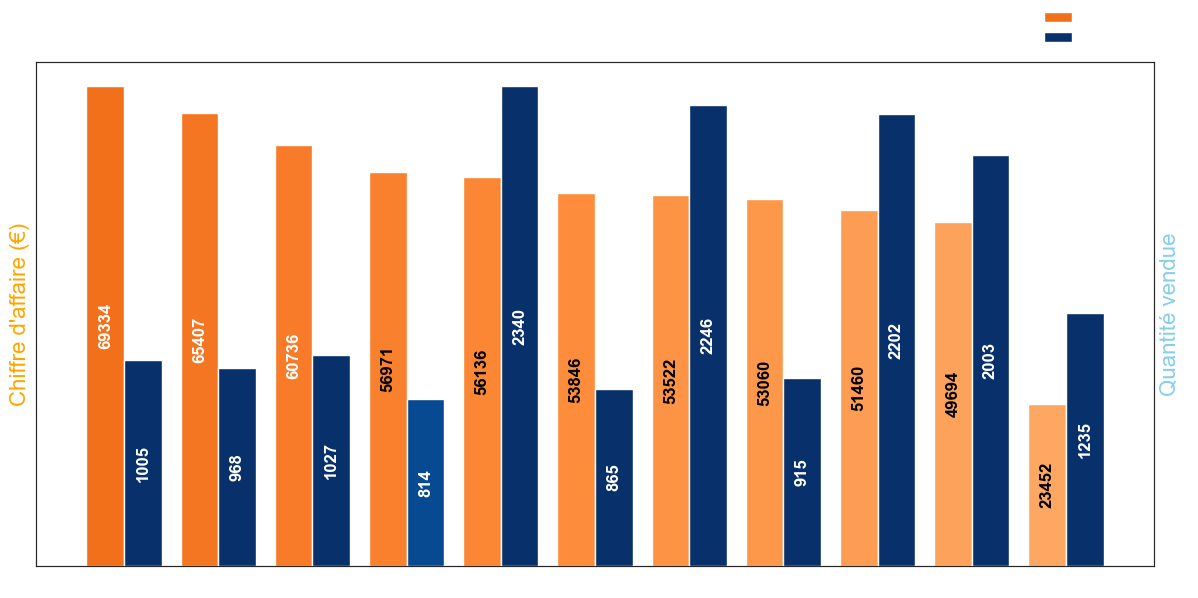

In [652]:
# --- Préparation des données ---
ordre_ca = meilleur_article['prod_id'].tolist()
n = len(meilleur_article)

# Création de l'ordre pour le bleu : trié par quantité décroissante
ordre_quantite = meilleur_article.sort_values("quantité", ascending=False)['prod_id'].tolist()


# --- Couleurs ---
cmap_orange = plt.colormaps["Oranges"]
couleurs_orange = [cmap_orange(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]

cmap_bleu = plt.colormaps["Blues"]
couleurs_bleu = [cmap_bleu(0.9 + 1 * i / (n - 1)) for i in reversed(range(n))]
couleurs_bleu_dict = dict(zip(ordre_quantite, couleurs_bleu))

# On extrait les couleurs bleues selon l'ordre des prod_id dans meilleur_article (ordonné par CA)
couleurs_bleu = [couleurs_bleu_dict[pid] for pid in meilleur_article['prod_id']]

# --- Création du graphique ---
sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe secondaire
ax2 = ax1.twinx()

# --- Coordonnées en X décalées ---
x = np.arange(len(meilleur_article))
width = 0.4  # Largeur des barres

# --- Barres de CA ---
bar1 = ax1.bar(
    x - width/2,
    meilleur_article['ca'],
    width=width,
    color=couleurs_orange,
    label='Chiffre d\'affaire'
)

# --- Barres de Quantité ---
bar2 = ax2.bar(
    x + width/2,
    meilleur_article['quantité'],
    width=width,
    color=couleurs_bleu,
    label='Quantité vendue'
)

# --- Ajout des valeurs ---
for bars, ax_used in zip([bar1, bar2], [ax1, ax2]):
    for bar in bars:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        bar_color = bar.get_facecolor()
        brightness = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]
        text_color = 'black' if brightness > 0.6 else 'white'
        ax_used.text(
            x, height * 0.5,
            f"{int(height)}",
            ha='center',
            va='center',
            color=text_color,
            fontsize=12,
            fontweight='bold', 
            rotation=90
        )

# --- Ticks X ---
ax1.set_xticks(np.arange(len(meilleur_article)))
ax1.set_xticklabels(meilleur_article['prod_id'], rotation=0, ha='center', color='white')

# --- Axe gauche / droite ---
ax1.set_ylabel("Chiffre d'affaire (€)", color='orange', fontsize=16)
ax2.set_ylabel("Quantité vendue", color='skyblue', fontsize=16)

# --- Titre ---
ax1.set_title("Articles les plus vendus et générant le plus de CA", fontsize=16, color='white', pad=20)

# --- Style global ---
fig.patch.set_facecolor('none')
ax1.set_facecolor('none')
ax2.set_facecolor('none')
ax1.tick_params(axis='x', colors='white')

# Supprimer ticks et étiquettes de l'axe Y
ax1.tick_params(axis='y', left=False, right=False, labelleft=False)
ax2.tick_params(axis='y', left=False, right=False, labelright=False)

# --- Légende ---
legend=fig.legend(loc='upper right', frameon=False)
for text in legend.get_texts():
    text.set_color('white')

# --- Export ---
plt.tight_layout()
plt.savefig("Graphiques/Articles_CA_Quantité.png", transparent=True)
plt.show()


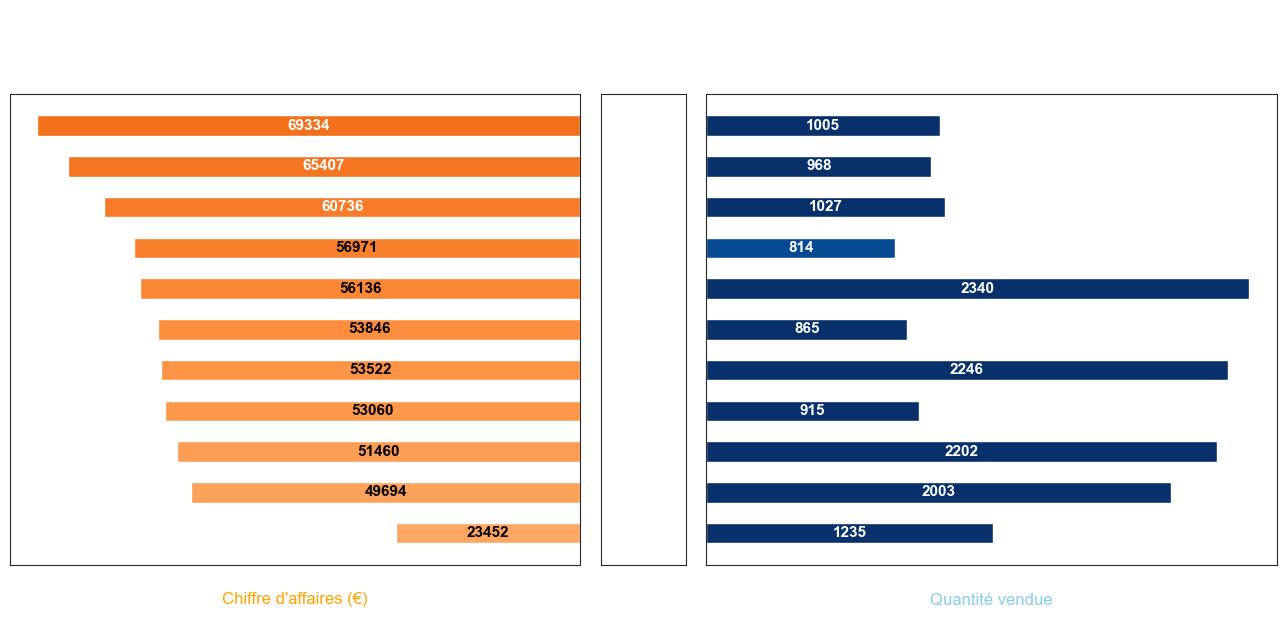

In [653]:
# --- Tri par CA décroissant ---
meilleur_article_sorted = meilleur_article.sort_values('ca', ascending=True).reset_index(drop=True)

# --- Variables utiles ---
n = len(meilleur_article_sorted)
y = np.arange(n)
bar_height = 0.5

# --- Couleurs triées correctement ---
cmap_orange = plt.colormaps["Oranges_r"]
couleurs_orange = [cmap_orange(0.4 + 0.2 * i / (n - 1)) for i in reversed(range(n))]

cmap_bleu = plt.colormaps["Blues"]
ordre_quantite = meilleur_article_sorted.sort_values("quantité", ascending=False)['prod_id'].tolist()
couleurs_bleu = [cmap_bleu(0.9 + 1 * i / (n - 1)) for i in reversed(range(n))]
couleurs_bleu_dict = dict(zip(ordre_quantite, couleurs_bleu))
couleurs_bleu = [couleurs_bleu_dict[pid] for pid in meilleur_article_sorted['prod_id']]

# --- Création de la figure avec 3 zones : gauche, centre, droite ---
sns.set_style('white')
fig = plt.figure(figsize=(13, 6))
gs = fig.add_gridspec(nrows=1, ncols=3, width_ratios=[1, 0.15, 1])
ax1 = fig.add_subplot(gs[0])
ax_label = fig.add_subplot(gs[1], sharey=ax1)
ax2 = fig.add_subplot(gs[2], sharey=ax1)

# --- Barres CA (gauche) ---
bar1 = ax1.barh(
    y,
    meilleur_article_sorted['ca'],
    height=bar_height,
    color=couleurs_orange
)
ax1.invert_xaxis()
ax1.set_xlabel("Chiffre d'affaires (€)", color='orange', fontsize=12)

# --- Barres Quantité (droite) ---
bar2 = ax2.barh(
    y,
    meilleur_article_sorted['quantité'],
    height=bar_height,
    color=couleurs_bleu
)
ax2.set_xlabel("Quantité vendue", color='skyblue', fontsize=12)

# --- Ajout des valeurs et des labels centrés ---
for i, (b1, b2) in enumerate(zip(bar1, bar2)):
    y_pos = b1.get_y() + b1.get_height() / 2
    ca_val = int(b1.get_width())
    qte_val = int(b2.get_width())
    prod_id = meilleur_article_sorted['prod_id'][i]

 # --- Texte sur la barre CA (gauche) ---
    bar_color_ca = b1.get_facecolor()
    brightness_ca = 0.299 * bar_color_ca[0] + 0.587 * bar_color_ca[1] + 0.114 * bar_color_ca[2]
    text_color_ca = 'black' if brightness_ca > 0.6 else 'white'

    # Valeur CA (gauche)
    ax1.text(
        b1.get_width() / 2,
        y_pos,
        f"{ca_val}",
        ha='center',
        va='center',
        color=text_color_ca,
        fontsize=11,
        fontweight='bold'
    )

     # --- Texte sur la barre Quantité (droite) ---
    bar_color_qte = b2.get_facecolor()
    brightness_qte = 0.299 * bar_color_qte[0] + 0.587 * bar_color_qte[1] + 0.114 * bar_color_qte[2]
    text_color_qte = 'black' if brightness_qte > 0.6 else 'white'

    # Valeur quantité (droite)
    ax2.text(
        b2.get_width() / 2,
        y_pos,
        f"{qte_val}",
        ha='center',
        va='center',
        color=text_color_qte,
        fontsize=11,
        fontweight='bold'
    )

    # Nom du produit (centre)
    ax_label.text(
        0,
        y_pos,
        prod_id,
        ha='center',
        va='center',
        color='white',
        fontsize=11,
        fontweight='bold'
    )

# --- Nettoyage des axes ---
ax1.set_yticks([])
ax2.set_yticks([])
ax_label.set_xticks([])
ax_label.set_yticks([])
ax_label.set_xlim(-1, 1)

# --- Apparence ---
fig.suptitle("Articles les plus vendus et générant le plus de CA", fontsize=16, color='white', y=1.02)
fig.patch.set_facecolor('none')
for ax in [ax1, ax2, ax_label]:
    ax.set_facecolor('none')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', left=False)

# --- Finalisation ---
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, top=0.88)
plt.savefig("Graphiques/Articles_CA_Quantité.png", transparent=True)
plt.show()


In [654]:
(1430-(3*437))/2

59.5

## Flop 10 CA

In [656]:
'''Classement et tri des 10 articles qui génèrent le moins de CA'''
flop_10_ca_categorie=ca_categorie.sort_values(['categ', 'ca'], ascending=[True, True]).groupby('categ').head(10)

''' Affichage des articles par catégories'''

'''Affichage'''
for cat in ca_categ:
    flop_10=flop_10_ca_categorie.loc[flop_10_ca_categorie['categ'] == cat, ['prod_id', 'ca']]
    flop_10_ca_categ=flop_10['prod_id'].tolist()
    print(f'\n Les 10 articles de la catégorie {cat} qui génèrent le moins de chiffre d\'affaire:')
    for i, row in enumerate(flop_10.itertuples(index=False), start=1):
        print(f'{i}. {row.prod_id} - {row.ca:.2f}€ ')


 Les 10 articles de la catégorie 0 qui génèrent le moins de chiffre d'affaire:
1. 0_1539 - 0.99€ 
2. 0_1284 - 1.38€ 
3. 0_1653 - 1.98€ 
4. 0_1601 - 1.99€ 
5. 0_541 - 1.99€ 
6. 0_807 - 1.99€ 
7. 0_1728 - 2.27€ 
8. 0_1498 - 2.48€ 
9. 0_898 - 2.54€ 
10. 0_1840 - 2.56€ 

 Les 10 articles de la catégorie 1 qui génèrent le moins de chiffre d'affaire:
1. 1_420 - 14.24€ 
2. 1_224 - 19.80€ 
3. 1_470 - 21.64€ 
4. 1_473 - 26.91€ 
5. 1_404 - 29.55€ 
6. 1_135 - 39.95€ 
7. 1_399 - 43.89€ 
8. 1_511 - 44.85€ 
9. 1_424 - 49.10€ 
10. 1_491 - 49.90€ 

 Les 10 articles de la catégorie 2 qui génèrent le moins de chiffre d'affaire:
1. 2_81 - 86.99€ 
2. 2_23 - 115.99€ 
3. 2_98 - 149.74€ 
4. 2_93 - 157.98€ 
5. 2_107 - 203.94€ 
6. 2_77 - 291.98€ 
7. 2_27 - 295.96€ 
8. 2_28 - 310.50€ 
9. 2_122 - 350.00€ 
10. 2_131 - 383.97€ 


<h1 style='color: orange;'>Profil des clients</h1>

## Les clients BtoB

### Détermination des clients BtoB

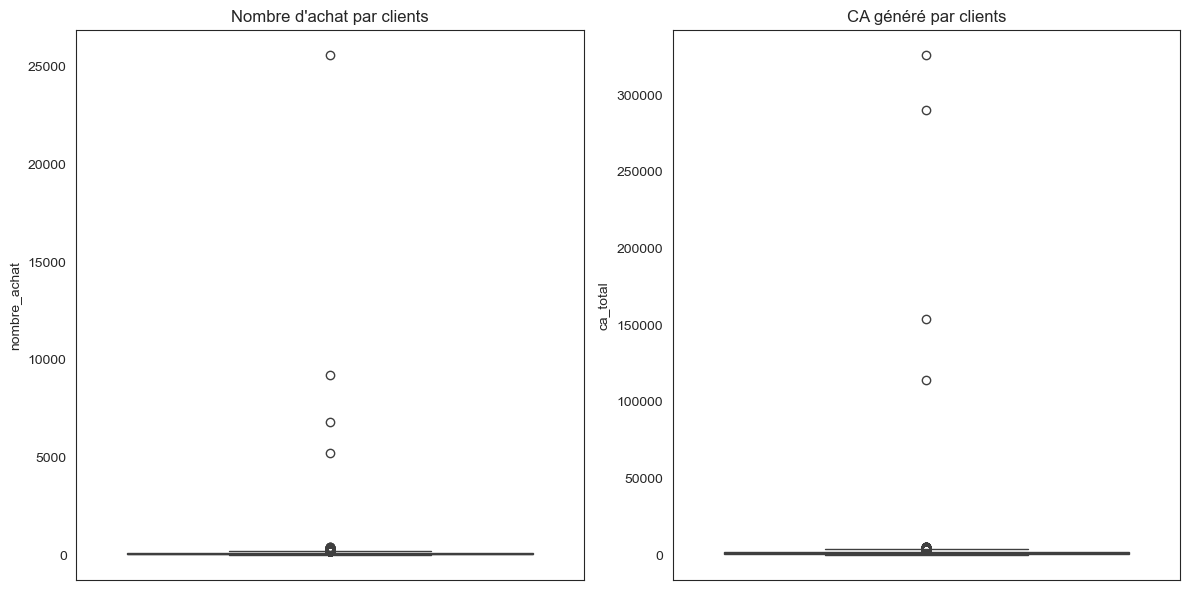

In [660]:
# Visualisation de la distribution des données CA et volume d'achat

# Création d'une table pour compter le nombre d'achat et le CA total
jointure_ca_volume=jointure.groupby('client_id').agg(
    nombre_achat=('prod_id', 'count'),
    ca_total=('price', 'sum')
).reset_index()

# Création des boxplots
plt.figure(figsize=(12,6))

# Nombre d'achats
plt.subplot(1,2,1)
sns.boxplot(data=jointure_ca_volume, y='nombre_achat')
plt.title('Nombre d\'achat par clients')

# CA total
plt.subplot(1,2,2)
sns.boxplot(data=jointure_ca_volume, y='ca_total')
plt.title('CA généré par clients')

plt.tight_layout()
plt.show()

In [661]:
# Détermination de l'id des clients hors mormes

# Calcul de l'intervalle interquartile de nombre d'achats 
q1_nombre_achat=jointure_ca_volume['nombre_achat'].quantile(0.25)
q3_nombre_achat=jointure_ca_volume['nombre_achat'].quantile(0.75)
iq_nombre_achat=q3_nombre_achat - q1_nombre_achat
seuil_nombre_achat=q3_nombre_achat + 1.5 * iq_nombre_achat

# Cacul de l'intervalle interquartile du ca_total
q1_ca=jointure_ca_volume['ca_total'].quantile(0.25)
q3_ca=jointure_ca_volume['ca_total'].quantile(0.75)
iq_ca=q3_ca - q1_ca
seuil_ca=q3_ca + 1.5 * iq_ca

client_hors_norme=(jointure_ca_volume.loc[(jointure_ca_volume['nombre_achat'] > seuil_nombre_achat)
                   | (jointure_ca_volume['ca_total'] > seuil_ca)
                   ]['client_id'].tolist()
                  )

client_hors_norme

['c_1006',
 'c_1014',
 'c_1025',
 'c_1028',
 'c_1050',
 'c_1060',
 'c_1067',
 'c_1074',
 'c_1077',
 'c_1091',
 'c_110',
 'c_1104',
 'c_1110',
 'c_1118',
 'c_1138',
 'c_1149',
 'c_1177',
 'c_1178',
 'c_1183',
 'c_1200',
 'c_1229',
 'c_1239',
 'c_1240',
 'c_1252',
 'c_1261',
 'c_13',
 'c_131',
 'c_1319',
 'c_1338',
 'c_1343',
 'c_1347',
 'c_1367',
 'c_1368',
 'c_1371',
 'c_1377',
 'c_1378',
 'c_1382',
 'c_1399',
 'c_1410',
 'c_1413',
 'c_1422',
 'c_1442',
 'c_1464',
 'c_1469',
 'c_1478',
 'c_1482',
 'c_1494',
 'c_1514',
 'c_1535',
 'c_1560',
 'c_1570',
 'c_1595',
 'c_1609',
 'c_161',
 'c_1621',
 'c_1636',
 'c_1637',
 'c_1703',
 'c_1708',
 'c_1718',
 'c_1724',
 'c_1734',
 'c_1744',
 'c_1758',
 'c_1767',
 'c_1782',
 'c_1784',
 'c_1785',
 'c_179',
 'c_18',
 'c_182',
 'c_1823',
 'c_1832',
 'c_1838',
 'c_1876',
 'c_1893',
 'c_1938',
 'c_1939',
 'c_1961',
 'c_197',
 'c_1996',
 'c_2010',
 'c_2020',
 'c_2021',
 'c_2031',
 'c_2039',
 'c_2051',
 'c_2076',
 'c_2077',
 'c_2087',
 'c_209',
 'c_213',


In [662]:
# Je fixe des seuils en fonction des boxplots
client_btob=(jointure_ca_volume.loc[(jointure_ca_volume['nombre_achat'] > 4000)
                   | (jointure_ca_volume['ca_total'] > 100000)
                   ]['client_id'].tolist()
                  )
client_btob

['c_1609', 'c_3454', 'c_4958', 'c_6714']

In [663]:
'''Genre des clients B2B '''
jointure.loc[jointure['client_id'].isin(client_btob)].groupby('client_id')['sex'].first()

client_id
c_1609    m
c_3454    m
c_4958    m
c_6714    f
Name: sex, dtype: object

## Courbe de Lorenz

<function matplotlib.pyplot.show(close=None, block=None)>

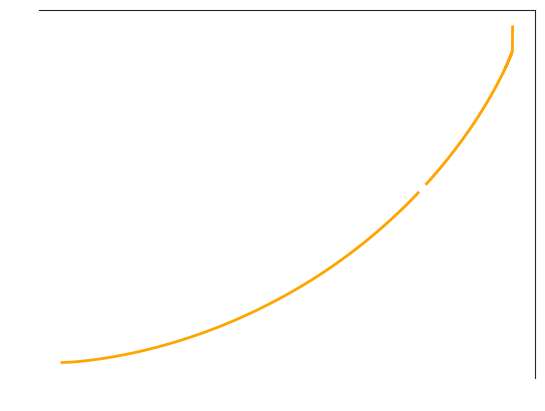

In [665]:
# Courbe de Lorenz 
# Création d'une table CA par client
ca_client=jointure.groupby('client_id')['price'].sum().reset_index(name='ca_client')
ca_client=ca_client.sort_values('ca_client')
n = len(ca_client['client_id'])
lorenz = np.cumsum(np.sort(ca_client['ca_client'])) / ca_client['ca_client'].sum()  # Somme cumulée des valeurs triées / somme. La division permet que le haut de la courbe soit 1
lorenz = np.append([0], lorenz) # Ordonnées, la courbe de Lorenz commence à O
xaxis = np.linspace(0-1/n, 1+1/n, n+1)  # Divise à interavlles réguliers l'axe des abscisses de 0 à 1
# Il y a un segmant de taille n pur chauque individu, plus 1 segment supplémentaire d'ordonnées 0.
# Le premier segment commence à 0-1/n et le dernier termine à 1+1/n
fig, ax = plt.subplots()

# Courbe en orange
ax.plot(xaxis, lorenz, color='orange', drawstyle='steps-post', linewidth=2)

# Fond transparent
fig.patch.set_alpha(0.0)       # Fond de la figure
ax.set_facecolor('none')       # Fond du graphique (zone des axes)

# Axes et labels en blanc
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Annotation "80/20"
x_pareto = 0.8
y_pareto = np.interp(x_pareto, xaxis, lorenz)

ax.plot(x_pareto, y_pareto, 'o', color='white')  # point visuel
ax.annotate("80% clients → {:.0f}% CA".format(y_pareto*100),
            xy=(x_pareto, y_pareto),
            xytext=(x_pareto-0.3, y_pareto+0.1),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.savefig('Graphiques/Courbe de Lorenz sur le CA généré par les clients.png', transparent=True)
plt.show

In [666]:
''' Liste des clients qui sont au dessus de 93% du CA (valeur relevée sur la courbe de lorenz) '''

# Calcul du CA en pourcentage pour chaque client
ca_client['%_ca']=ca_client['ca_client'] / ca_client['ca_client'].sum()

# Classement par ordre croissant du %CA
ca_client=ca_client.sort_values('%_ca')

# Cumul des %CA
ca_client['%_ca_cumulé']=ca_client['%_ca'].cumsum()

# Liste des clients au delà de 93% de CA
client_90=ca_client.loc[ca_client['%_ca_cumulé'] > 0.93]['client_id'].tolist()
client_90

['c_3454', 'c_6714', 'c_4958', 'c_1609']

<h1 style='color: orange;'>Pour étudier les différents liens, nous utiliserons la table sans les clients BtoB</h1>

In [668]:
# Création d'une table sans les clients BtoB
jointure_sans_btob=jointure.loc[~jointure['client_id'].isin(client_btob)].copy()

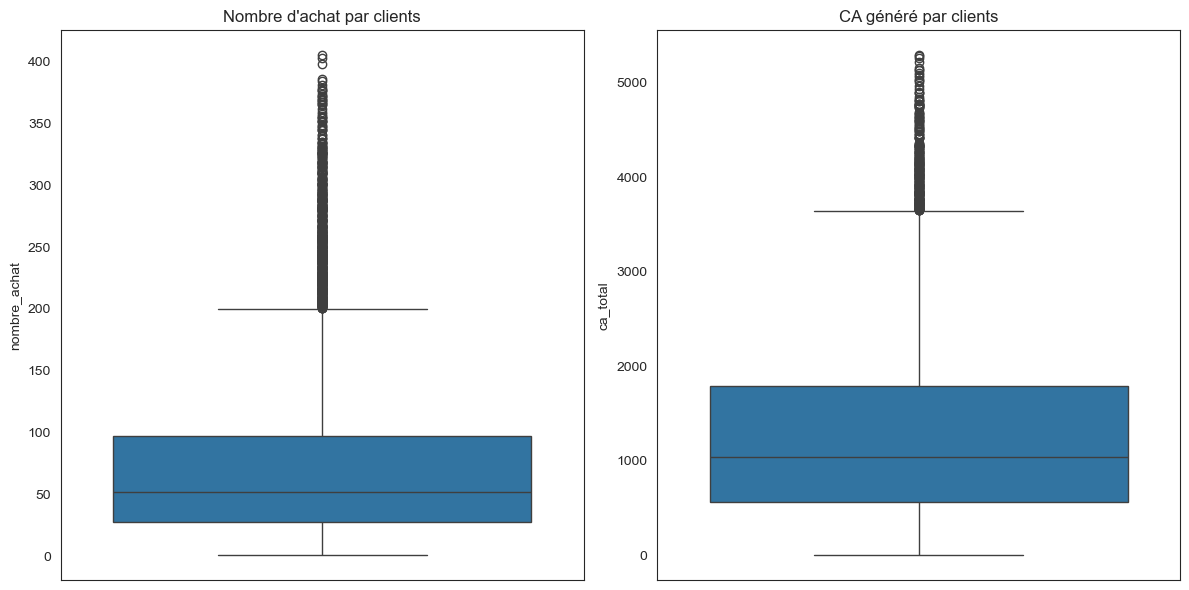

In [669]:
# Boxplot sans les clients BtoB

# Visualisation de la distribution des données CA et volume d'achat

# Création d'une table pour compter le nombre d'achat et le CA total
ca_volume_sans_btob=jointure_sans_btob.groupby('client_id').agg(
    nombre_achat=('prod_id', 'count'),
    ca_total=('price', 'sum')
).reset_index()

# Création des boxplots
plt.figure(figsize=(12,6))

# Nombre d'achats
plt.subplot(1,2,1)
sns.boxplot(data=ca_volume_sans_btob, y='nombre_achat')
plt.title('Nombre d\'achat par clients')

# CA total
plt.subplot(1,2,2)
sns.boxplot(data=ca_volume_sans_btob, y='ca_total')
plt.title('CA généré par clients')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

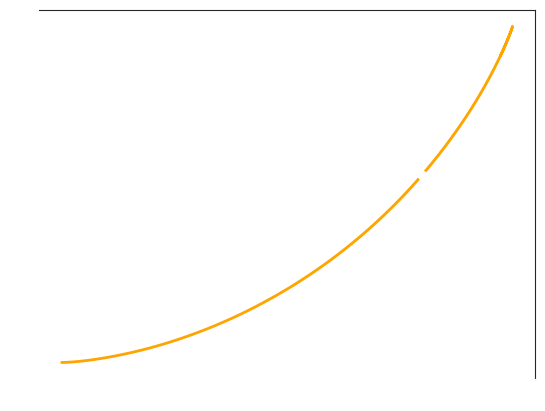

In [670]:
# Courbe de Lorenz sans les clients BtoB
# Création d'une table CA par client
ca_client=jointure_sans_btob.groupby('client_id')['price'].sum().reset_index(name='ca_client')
ca_client=ca_client.sort_values('ca_client')
n = len(ca_client['client_id'])
lorenz = np.cumsum(np.sort(ca_client['ca_client'])) / ca_client['ca_client'].sum()  # Somme cumulée des valeurs triées / somme. La division permet que le haut de la courbe soit 1
lorenz = np.append([0], lorenz) # Ordonnées, la courbe de Lorenz commence à O
xaxis = np.linspace(0-1/n, 1+1/n, n+1)  # Divise à interavlles réguliers l'axe des abscisses de 0 à 1
# Il y a un segmant de taille n pur chauque individu, plus 1 segment supplémentaire d'ordonnées 0.
# Le premier segment commence à 0-1/n et le dernier termine à 1+1/n
fig, ax = plt.subplots()

# Courbe en orange
ax.plot(xaxis, lorenz, color='orange', drawstyle='steps-post', linewidth=2)

# Fond transparent
fig.patch.set_alpha(0.0)       # Fond de la figure
ax.set_facecolor('none')       # Fond du graphique (zone des axes)

# Axes et labels en blanc
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Annotation "80/20"
x_pareto = 0.8
y_pareto = np.interp(x_pareto, xaxis, lorenz)

ax.plot(x_pareto, y_pareto, 'o', color='white')  # point visuel
ax.annotate("80% clients → {:.0f}% CA".format(y_pareto*100),
            xy=(x_pareto, y_pareto),
            xytext=(x_pareto-0.3, y_pareto+0.1),
            arrowprops=dict(facecolor='white', arrowstyle='->'),
            color='white')


plt.savefig('Graphiques/Courbe de Lorenz sur le CA généré par les clients non BtoB.png', transparent=True)
plt.show

<h1 style='color: orange;'>Lien entre genre et catégorie</h1>

## Groupement par client_id et mise en colonne des catégories

In [673]:
categ=jointure_sans_btob.groupby(['client_id', 'categ']).size().unstack(fill_value=0)

# Renommer les colonnes catégories
categ=categ.rename(columns=lambda x: f'categ {x}' if isinstance(x, str) or isinstance(x, int) else x)

# Récupération du genre des clients
genre=jointure_sans_btob.groupby('client_id')['sex'].first()

# Jointure de genre et categ
categ_genre=categ.join(genre)

categ_genre.head()

,categ 0,categ 1,categ 2,sex
client_id,,,,
c_1,30,12,1,m
c_10,20,34,4,m
c_100,2,5,1,m
c_1000,43,83,0,f
c_1001,70,32,1,m


## Test du Chi2 (plus de 2 variables qualitatives indépendantes)

In [675]:
from scipy.stats import chi2_contingency


# Création du tabkleau de contingence genre - catégories
chi2_table_contingence=categ_genre.groupby('sex')[['categ 0', 'categ 1', 'categ 2']].sum()

# Test du Chi2 pour le tableau de contingence 
chi2_stat, chi2_p_valeur, dof, expected=chi2_contingency(chi2_table_contingence)

print(f'''\nStatistique Chi2: {chi2_stat}
P valeur: {chi2_p_valeur}
Degré de liberté: {dof}
Fréquences attendues: {expected}
''')
print(f'{chi2_table_contingence} \n')


Statistique Chi2: 22.66856665178056
P valeur: 1.1955928116587024e-05
Degré de liberté: 2
Fréquences attendues: [[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]

     categ 0  categ 1  categ 2
sex                           
f     200793   115721    16980
m     186488   104884    15868 



## Quelles sont les catégories préférées par genre? 

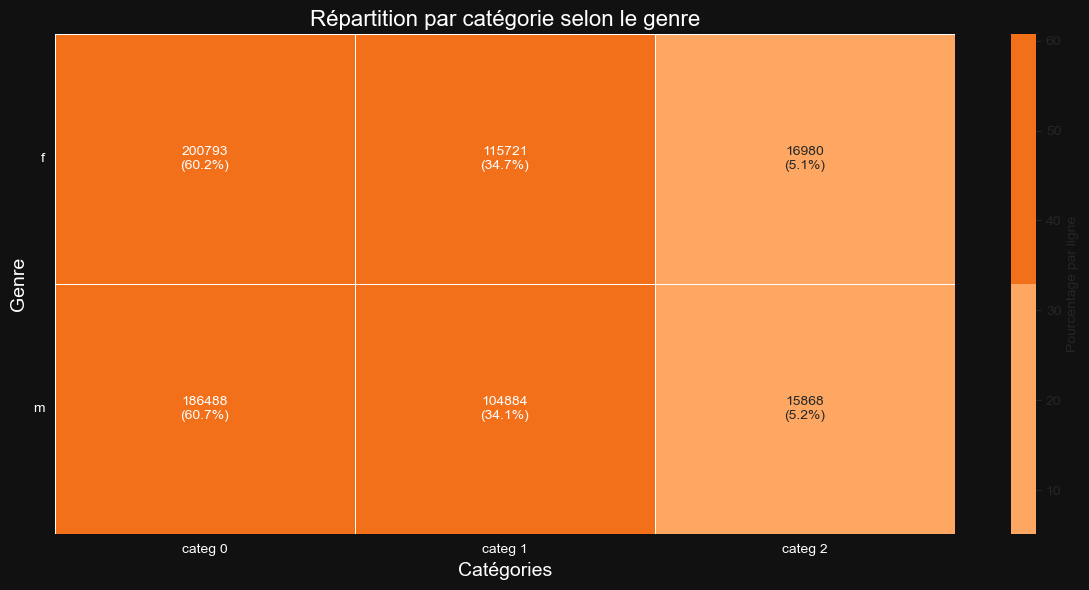

In [677]:
# Création d'une heatmap

# Pourcentages par ligne (chaque genre)
row_percent = chi2_table_contingence.div(chi2_table_contingence.sum(axis=1), axis=0) * 100

# Texte combiné : valeur brute + pourcentage
annot_data = chi2_table_contingence.astype(str) + "\n(" + row_percent.round(1).astype(str) + "%)"

n = len(chi2_table_contingence)  # récupère le nombre de catégories
cmap = plt.colormaps['Oranges_r']  # récupère la palette orange de Matplotlib

# On génère une liste de couleurs
colors = [cmap(0.4 + 0.2 * (i / (n - 1))) for i in reversed(range(n))] 
custom_cmap=ListedColormap(colors)

# Affichage
fig, ax=plt.subplots(figsize=(12, 6))
sns.set_style("ticks")  # style propre, sans fond

sns.heatmap(
    row_percent,                      # colorer selon les %
    annot=annot_data,                 # afficher brut + %
    fmt='',                           # important : ne pas formater les strings
    cmap=custom_cmap,                     # dégradé orange
    cbar_kws={'label': 'Pourcentage par ligne'},
    linewidths=0.5,
    linecolor='white'
)

plt.title('Répartition par catégorie selon le genre', fontsize=16, color='white')
plt.xlabel('Catégories', color='white', fontsize=14)
plt.ylabel('Genre', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(rotation=0, color='white')
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
fig.patch.set_alpha(1)
plt.savefig(f'Graphiques/Lien entre genre et catégorie.png', transparent=True)
plt.tight_layout()
plt.show()


<h1 style='color: orange;'>Lien entre âge et montant total des achats</h1>

## Création de la table 

In [680]:
# Création d'une colonne 'äge'
jointure_sans_btob['âge']=2025 - jointure_sans_btob['birth']
jointure_sans_btob.head(1)

,prod_id,date,session_id,client_id,sex,birth,price,categ,âge
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0,58


In [681]:
# Groupement par client pour l'indépendance des données

age_achat=jointure_sans_btob.groupby('client_id').agg(
    âge=('âge', 'first'),
    mean_price=('price', 'mean'), 
    total_price=('price', 'sum')
).reset_index()
age_achat.head()

,client_id,âge,mean_price,total_price
0,c_1,70,14.628372,629.02
1,c_10,69,23.337931,1353.60
2,c_100,33,31.856250,254.85
3,c_1000,59,18.189524,2291.88
4,c_1001,43,17.707282,1823.85


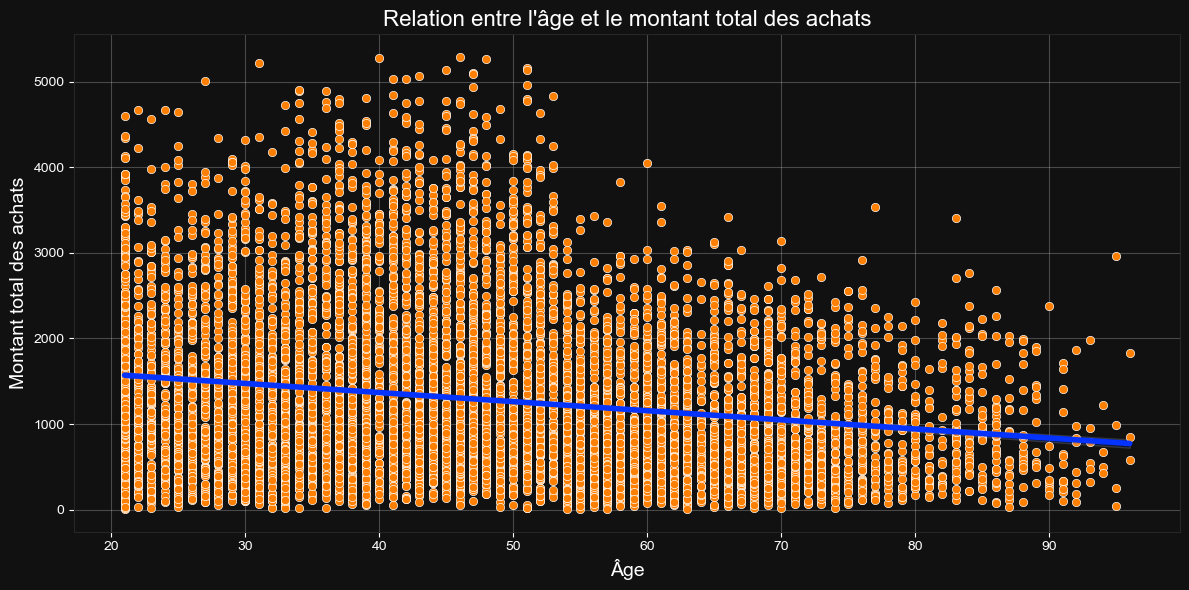

In [682]:
''' Visualisation de la relation entre l'âge et le montant total des achats '''

fig, ax=plt.subplots(figsize=(12, 6))

sns.scatterplot(data=age_achat, x='âge', y='total_price', color='#FF8000', ax=ax)

sns.regplot(data=age_achat, x='âge', y='total_price', scatter=False, color='#0433FF', line_kws={'lw':4, 'ls':'solid'}, ax=ax)

plt.title('Relation entre l\'âge et le montant total des achats', fontsize=16, color='white')
plt.xlabel('Âge',fontsize=14, color='white')
plt.ylabel('Montant total des achats', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, alpha=0.3)
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
fig.patch.set_alpha(1)
plt.savefig('Graphiques/Relation entre l\'âge et le montant total des achats (scatter).png', transparent=True)
plt.tight_layout()
plt.show()

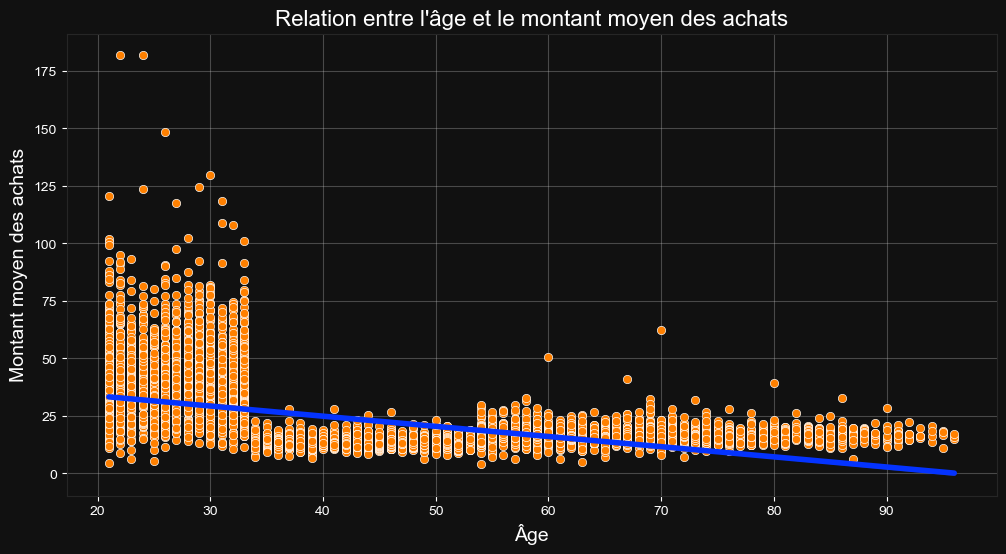

In [683]:
''' Visualisation de la relation entre l'âge et le montant moyen des achats  '''
fig, ax=plt.subplots(figsize=(12,6))

sns.scatterplot(data=age_achat, x='âge', y='mean_price', color="#FF8000", ax=ax)

sns.regplot(data=age_achat, x='âge', y='mean_price', scatter=False, color='#0433FF', line_kws={'lw':4, 'ls':'solid'}, ax=ax)

plt.title('Relation entre l\'âge et le montant moyen des achats', color='white', fontsize=16)
plt.xlabel('Âge', fontsize=14, color='white')
plt.ylabel('Montant moyen des achats', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, alpha=0.3)
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
fig.patch.set_alpha(1)
plt.savefig('Graphiques/Relation entre l\'age et le montant moyen des achats.png', transparent=True)
plt.show()

## Vérifions si les données 'âge' et 'achats' suivent une loi normale

### La donnée âge

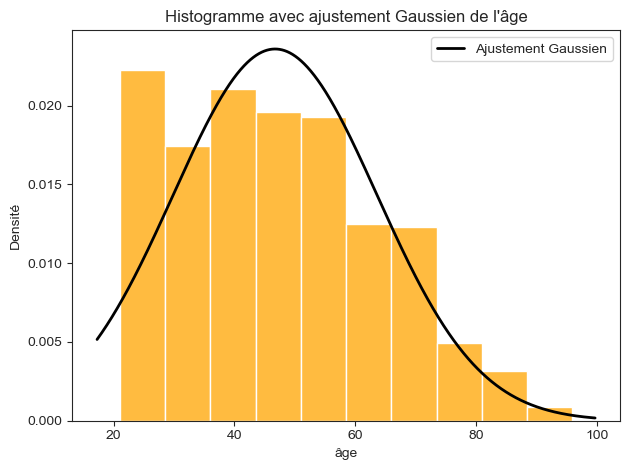

In [686]:
# La variable 'âge' suit elle une loi normale? 

from scipy.stats import norm
# Tracé de l'histogramme
sns.histplot(data=age_achat, x='âge', bins=10, color='orange', stat='density')

# Ajustement Gaussien
mu_age, std_age=norm.fit(age_achat['âge'])
xmin_age, xmax_age=plt.xlim()
x_age=np.linspace(xmin_age, xmax_age, age_achat['âge'].count())
p_age=norm.pdf(x_age, mu_age, std_age)

plt.plot(x_age,p_age, 'k', linewidth =2, label='Ajustement Gaussien')
plt.legend()
plt.title('Histogramme avec ajustement Gaussien de l\'âge')
plt.xlabel('âge')
plt.ylabel('Densité')
plt.tight_layout()
plt.show()

In [687]:
# Test d'Agostino-Pearson (plus de 5000 lignes)

from scipy.stats import normaltest

# Données
age=age_achat['âge']

stat_age, AP_p_age = normaltest(age)

print(f'''Statistiques du test d\'Agostini_Pearson pour l\'âge: {stat_age:.4f}
p_value: {AP_p_age:.4g}
''')

if AP_p_age < 0.05:
    print(f'Les données ne semblent pas suivre une loi normale')
else:
    print(f'Les données semblent suivre une loi normale')

Statistiques du test d'Agostini_Pearson pour l'âge: 504.2383
p_value: 3.207e-110

Les données ne semblent pas suivre une loi normale


In [688]:
# Test d'Anderson_Darling

from scipy.stats import anderson

anderson_age=anderson(age)

print(f'''Statistique du test d'Anderson-Darling pour l\'âge: {anderson_age.statistic:.4f}
''')
for sl, cv in zip(anderson_age.significance_level, anderson_age.critical_values):
    conclusion = "Les données ne suivent pas une loi normale" if anderson_age.statistic > cv else "Les données suivent une loi normale"
    print(f"Seuil {sl:.0f}% : Critique = {cv:.4f} → {conclusion}")

Statistique du test d'Anderson-Darling pour l'âge: 53.7635

Seuil 15% : Critique = 0.5760 → Les données ne suivent pas une loi normale
Seuil 10% : Critique = 0.6560 → Les données ne suivent pas une loi normale
Seuil 5% : Critique = 0.7870 → Les données ne suivent pas une loi normale
Seuil 2% : Critique = 0.9180 → Les données ne suivent pas une loi normale
Seuil 1% : Critique = 1.0910 → Les données ne suivent pas une loi normale


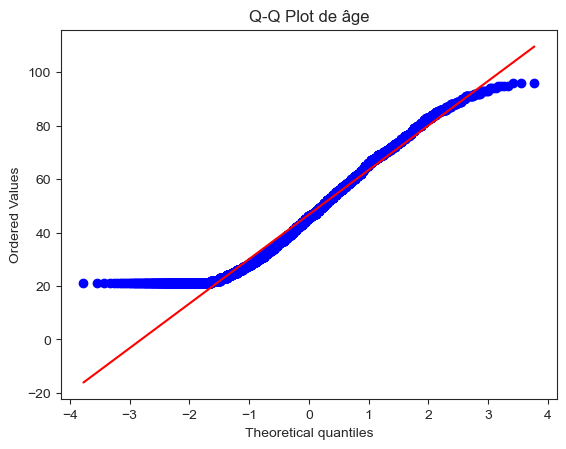

In [689]:
# Réalisation d'un Q-Q plot

import scipy.stats as stats

stats.probplot(age, dist='norm', plot=plt)
plt.title('Q-Q Plot de âge')
plt.show()

### La donnée achat

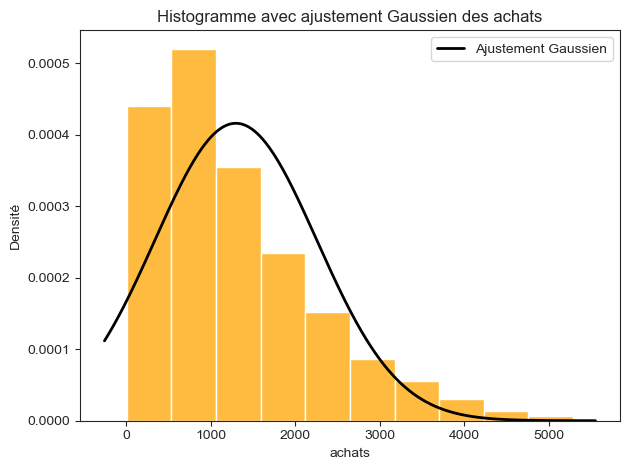

In [691]:
# La variable 'price' suit elle une loi normale? 

# Tracé de l'histogramme
sns.histplot(age_achat, x='total_price', bins=10, color='orange', stat='density')

# Ajustement Gaussien
mu_achat, std_achat=norm.fit(age_achat['total_price'])
xmin_achat, xmax_achat=plt.xlim()
x_achat=np.linspace(xmin_achat, xmax_achat, age_achat['total_price'].count())
p_achat=norm.pdf(x_achat, mu_achat, std_achat)

plt.plot(x_achat,p_achat, 'k', linewidth =2, label='Ajustement Gaussien')
plt.legend()
plt.title('Histogramme avec ajustement Gaussien des achats')
plt.xlabel('achats')
plt.ylabel('Densité')
plt.tight_layout()
plt.show()

In [692]:
# Test d'Agostino-Pearson (plus de 5000 lignes)

from scipy.stats import normaltest

# Données
achat=age_achat['total_price']

stat_achat, AP_p_achat = normaltest(achat)

print(f'''Statistiques du test d\'Agostini-Peason pour les achats: {stat_achat:.4f}
p_value: {AP_p_achat:.4g}
''')

if AP_p_achat < 0.05:
    print(f'Les données ne semblent pas suivre une loi normale')
else:
    print(f'Les données semblent suivre une loi normale')

Statistiques du test d'Agostini-Peason pour les achats: 1455.2480
p_value: 0

Les données ne semblent pas suivre une loi normale


In [693]:
# Test d'Anderson_Darling

from scipy.stats import anderson

anderson_achat=anderson(achat)

print(f'''Statistique du test d'Anderson-Darling pour les achats: {anderson_achat.statistic:.4f}
''')
for sl, cv in zip(anderson_achat.significance_level, anderson_achat.critical_values):
    conclusion = "Les données ne suivent pas une loi normale" if anderson_achat.statistic > cv else "Les données suivent une loi normale"
    print(f"Seuil {sl:.0f}% : Critique = {cv:.4f} → {conclusion}")

Statistique du test d'Anderson-Darling pour les achats: 227.1074

Seuil 15% : Critique = 0.5760 → Les données ne suivent pas une loi normale
Seuil 10% : Critique = 0.6560 → Les données ne suivent pas une loi normale
Seuil 5% : Critique = 0.7870 → Les données ne suivent pas une loi normale
Seuil 2% : Critique = 0.9180 → Les données ne suivent pas une loi normale
Seuil 1% : Critique = 1.0910 → Les données ne suivent pas une loi normale


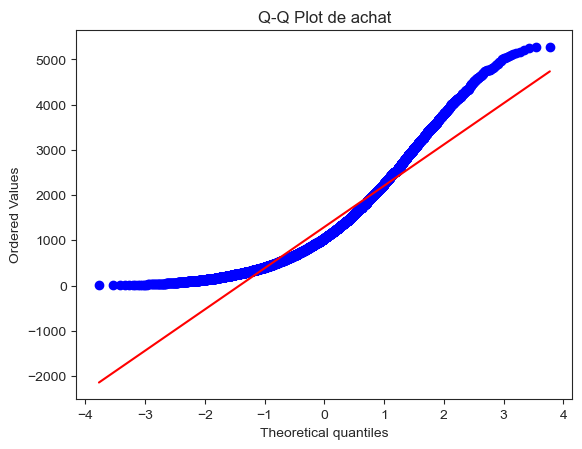

In [694]:
# Réalisation d'un Q-Q plot

import scipy.stats as stats

stats.probplot(achat, dist='norm', plot=plt)
plt.title('Q-Q Plot de achat')
plt.show()

## Test de Spearman (2 variables quantitatives indépendantes qui ne suivent pas une loi normale)

In [696]:
from scipy.stats import spearmanr

# Calcul du coefficient de correlation de Spearman et de la p_valeur
spearman_age_achat_correlation, spearman_p_valeur_age_achat=spearmanr(age, achat)

print(f'''\nCoefficient de correlation de Spearman pour l'âge et les achats: {spearman_age_achat_correlation:.4f}
p_valeur de Spearman pour l'âge et les achats: {spearman_p_valeur_age_achat:.4g}
''')

if spearman_p_valeur_age_achat < 0.05:
    print(f'Il existe une correlation significative entre l\'âge et les achats\n')
else:
    print(f'Il n\'existe pas de corrélation significative entre l\'âge et les achats\n')


Coefficient de correlation de Spearman pour l'âge et les achats: -0.1845
p_valeur de Spearman pour l'âge et les achats: 1.021e-66

Il existe une correlation significative entre l'âge et les achats



Les données âge et moyenne des achats sont faiblement corrélées de manière inverse mais significative

In [698]:
age_achat.head()

,client_id,âge,mean_price,total_price
0,c_1,70,14.628372,629.02
1,c_10,69,23.337931,1353.60
2,c_100,33,31.856250,254.85
3,c_1000,59,18.189524,2291.88
4,c_1001,43,17.707282,1823.85


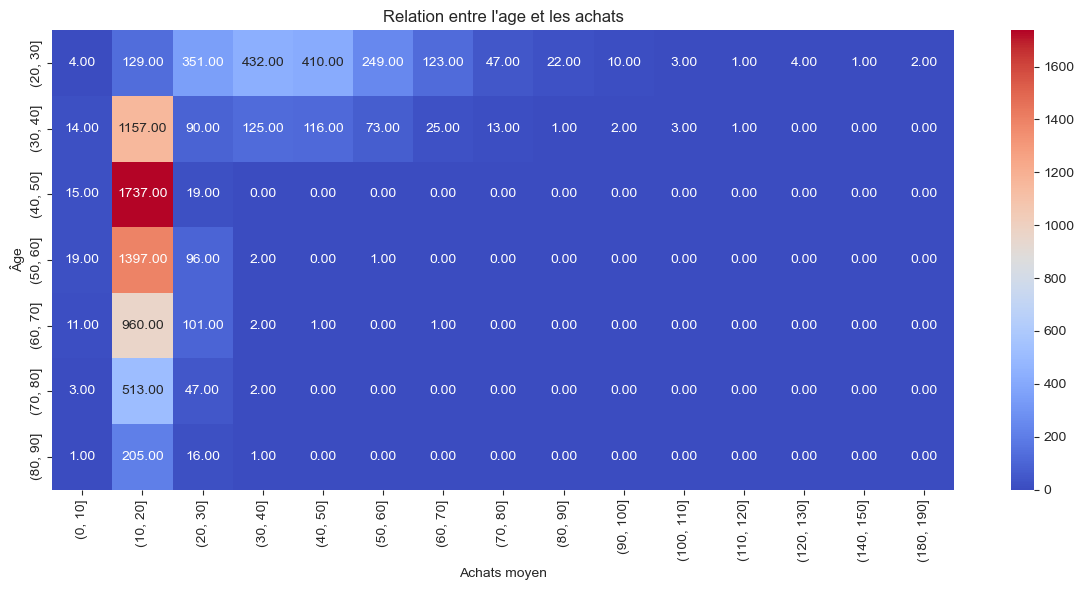

In [699]:
# Création d'une heatmap entre l'âge et les achats moyen

# Création de tranche d'âge et de tranche d'achat
bins_age=np.arange(0,100, 10)
bins_price=np.arange(0, 200, 10)
age_achat['bin_age']=pd.cut(age_achat['âge'], bins=bins_age)
age_achat['bin_mean_price']=pd.cut(age_achat['mean_price'], bins=bins_price)

# Création d'un tableau de contingence
contingence_age_achat=pd.crosstab(age_achat['bin_age'], age_achat['bin_mean_price'])

plt.figure(figsize=(12,6))
sns.heatmap(contingence_age_achat, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Relation entre l\'age et les achats')
plt.xlabel('Achats moyen')
plt.ylabel('Âge')
plt.tight_layout()
plt.show()

<h1 style='color: orange;'>Lien entre âge et fréquence des achats</h1>

## Calcul de la fréquence des achats

In [702]:
jointure_sans_btob.head()

,prod_id,date,session_id,client_id,sex,birth,price,categ,âge
0,0_1259,2021-03-01,s_1,c_329,f,1967,11.99,0,58
1,0_1390,2021-03-01,s_2,c_664,m,1960,19.37,0,65
2,0_1352,2021-03-01,s_3,c_580,m,1988,4.50,0,37
3,0_1458,2021-03-01,s_4,c_7912,f,1989,6.55,0,36
4,0_1358,2021-03-01,s_5,c_2033,f,1956,16.49,0,69


In [703]:
# Tri des dates dans l'odre croissant par client pour une différence cohérente
delta=jointure_sans_btob.sort_values(['client_id', 'date', 'âge']).copy()

# Création d'une colonne qui affiche la différence des dates
delta['delta']=delta.groupby('client_id')['date'].diff()

# Suppresion des NaT (première ligne des clients et clients n'ayant fait qu'un achat)
delta=delta.dropna(subset=['delta'])

# Calcul de la fréquence (moyenne des delta de dates)
frequence=delta.groupby('client_id').agg(
    âge=('âge', 'first'),
    frequence=('delta', 'mean')
).reset_index()

# Récupération de la fréquence en jours
frequence['days']=frequence['frequence'].dt.days
frequence.head()

,client_id,âge,frequence,days
0,c_1,70,13 days 21:08:34.285714285,13
1,c_10,69,11 days 21:03:09.473684210,11
2,c_100,33,74 days 00:00:00,74
3,c_1000,59,5 days 10:56:38.400000,5
4,c_1001,43,7 days 00:56:28.235294117,7


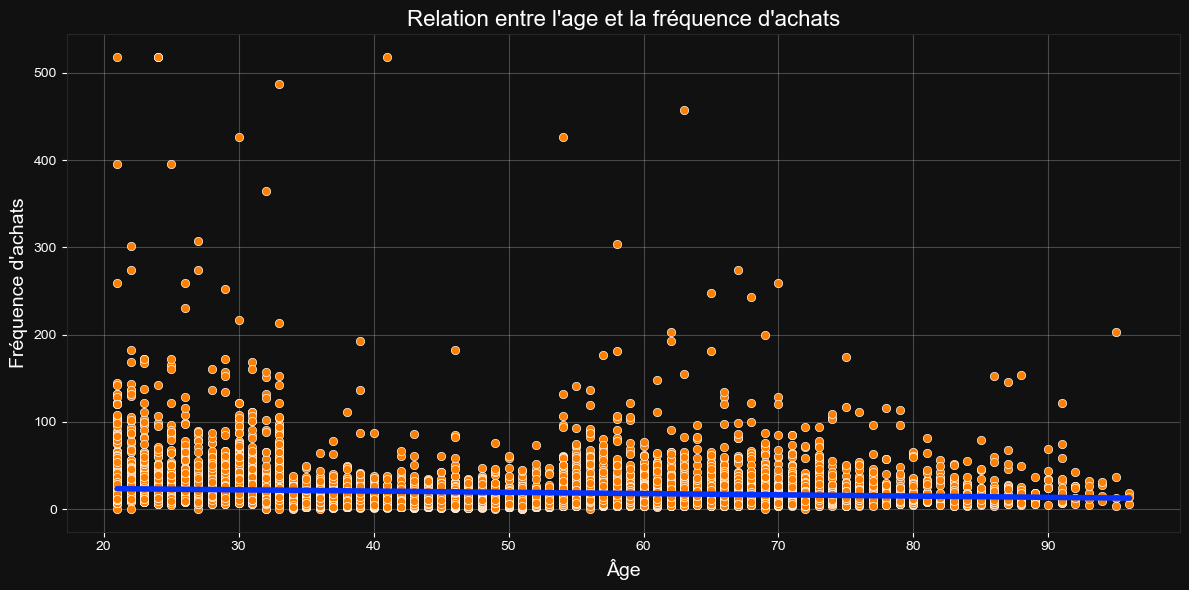

In [704]:
''' Relation entre l'âge et la fréquence des achats'''

fig, ax=plt.subplots(figsize=(12, 6))

sns.scatterplot(data=frequence, x='âge', y='days', color='#FF8000', ax=ax)

sns.regplot(data=frequence, x='âge', y='days', scatter=False, color='#0433FF', line_kws={'lw':4, 'ls':'solid'}, ax=ax )

plt.title('Relation entre l\'age et la fréquence d\'achats', fontsize=16, color='white')
plt.xlabel('Âge', fontsize=14, color='white')
plt.ylabel('Fréquence d\'achats', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, alpha=0.3)
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
fig.patch.set_alpha(1)
plt.savefig('Graphiques/Relation entre l\’âge et la fréquence d\'achats.png', transparent=True)
plt.tight_layout()
plt.show()

## La variable fréquence suit elle une loi normale

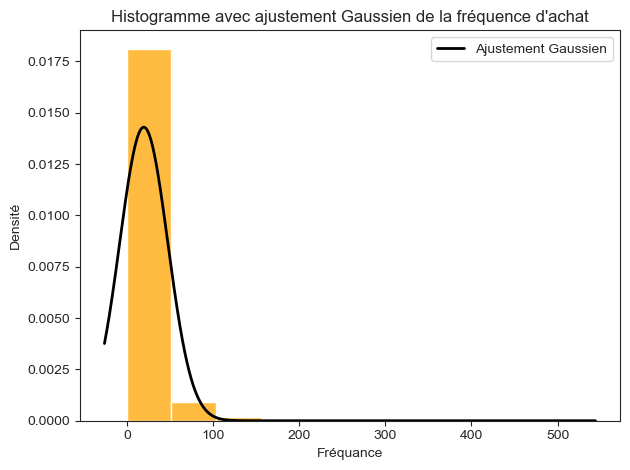

In [706]:
# Tracé de l'histogramme
sns.histplot(data=frequence, x='days', bins=10, color='orange', stat='density')

# Ajustement Gaussien
mu_freq, std_freq=norm.fit(frequence['days'])
xmin_freq, xmax_freq=plt.xlim()
x_freq=np.linspace(xmin_freq, xmax_freq, frequence['days'].count())
p_freq=norm.pdf(x_freq, mu_freq, std_freq)

plt.plot(x_freq,p_freq, 'k', linewidth =2, label='Ajustement Gaussien')
plt.legend()
plt.title('Histogramme avec ajustement Gaussien de la fréquence d\'achat')
plt.xlabel('Fréquance')
plt.ylabel('Densité')
plt.tight_layout()
plt.show()

In [707]:
# Test d'Agostino_pearson

# Données
freq=frequence['days']

stat_freq, AP_p_freq = normaltest(freq)

print(f'''Statistiques du test d\'Agostini_Pearson pour la fréquence d\'achat: {stat_freq:.4f}
p_value: {AP_p_freq:.4g}
''')

if AP_p_freq < 0.05:
    print(f'Les données ne semblent pas suivre une loi normale')
else:
    print(f'Les données semblent suivre une loi normale')

Statistiques du test d'Agostini_Pearson pour la fréquence d'achat: 11583.9200
p_value: 0

Les données ne semblent pas suivre une loi normale


In [708]:
# Test d'Anderson-Darling

from scipy.stats import anderson

anderson_freq=anderson(freq)

print(f'''Statistique du test d'Anderson-Darling pour la fréquence d\'achat: {anderson_freq.statistic:.4f}
''')
for sl, cv in zip(anderson_freq.significance_level, anderson_freq.critical_values):
    conclusion = "Les données ne suivent pas une loi normale" if anderson_freq.statistic > cv else "Les données suivent une loi normale"
    print(f"Seuil {sl:.0f}% : Critique = {cv:.4f} → {conclusion}")

Statistique du test d'Anderson-Darling pour la fréquence d'achat: 964.9835

Seuil 15% : Critique = 0.5760 → Les données ne suivent pas une loi normale
Seuil 10% : Critique = 0.6560 → Les données ne suivent pas une loi normale
Seuil 5% : Critique = 0.7870 → Les données ne suivent pas une loi normale
Seuil 2% : Critique = 0.9180 → Les données ne suivent pas une loi normale
Seuil 1% : Critique = 1.0910 → Les données ne suivent pas une loi normale


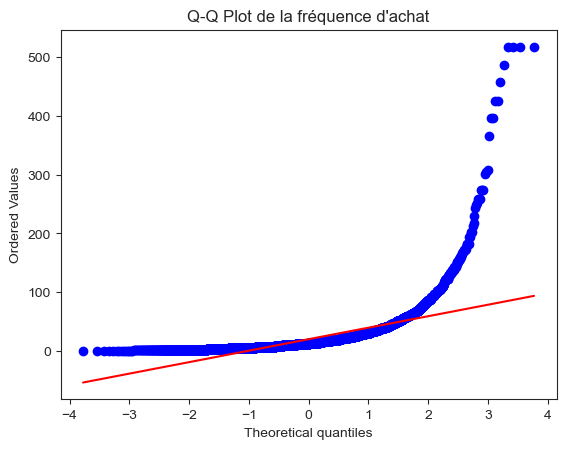

In [709]:
import scipy.stats as stats

stats.probplot(freq, dist='norm', plot=plt)
plt.title('Q-Q Plot de la fréquence d\'achat')
plt.show()

## Test de Spearman (2 variables quantitatives indépendantes qui ne suivent pas une loi normale)

In [711]:
frequence['frequence'].shape

(8590,)

In [712]:
age_freq=frequence['âge']

# Calcul du coefficient de correlation de Spearman et de la p_valeur
spearman_frequence_correlation, spearman_p_valeur_frequence=spearmanr(age_freq, freq)

print(f'''Coefficient de correlation de Spearman pour l'âge et la fréqueuce d\'achats: {spearman_frequence_correlation:.4f}
p_valeur de Spearman pour l'âge et la fréquence d\'achats: {spearman_p_valeur_frequence:.4g}
''')

if spearman_p_valeur_frequence < 0.05:
    print(f'Il existe une correlation significative entre l\'âge et la fréquence d\'achats')
else:
    print(f'Il n\'existe pas de corrélation significative entre l\'âge et la fréquence d\'achats')

Coefficient de correlation de Spearman pour l'âge et la fréqueuce d'achats: -0.1192
p_valeur de Spearman pour l'âge et la fréquence d'achats: 1.426e-28

Il existe une correlation significative entre l'âge et la fréquence d'achats


In [713]:
frequence.head()

,client_id,âge,frequence,days
0,c_1,70,13 days 21:08:34.285714285,13
1,c_10,69,11 days 21:03:09.473684210,11
2,c_100,33,74 days 00:00:00,74
3,c_1000,59,5 days 10:56:38.400000,5
4,c_1001,43,7 days 00:56:28.235294117,7


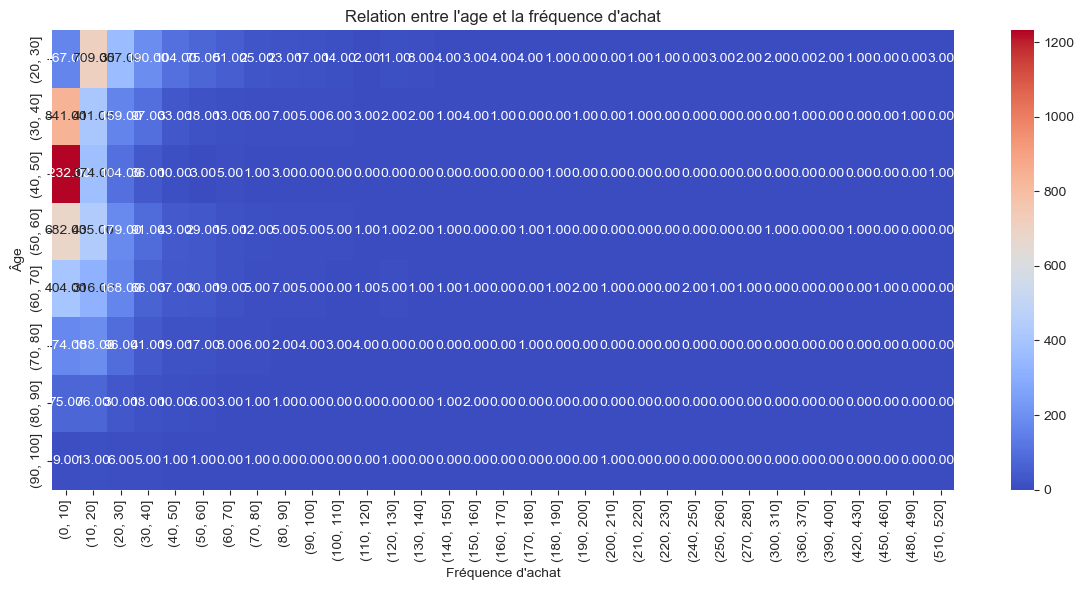

In [714]:
# Création d'une heatmap entre l'âge et le nombre de session 

# Création de tranche d'âge et de tranche d'achat
bins_age=np.arange(0, frequence['âge'].max()+10, 10)
bins_freq=np.arange(0, frequence['days'].max()+10, 10)
frequence['bin_age']=pd.cut(frequence['âge'], bins=bins_age)
frequence['bin_fréquence']=pd.cut(frequence['days'], bins=bins_freq)

# Création d'un tableau de contingence
contingence_frequence=pd.crosstab(frequence['bin_age'], frequence['bin_fréquence'])

plt.figure(figsize=(12,6))
sns.heatmap(contingence_frequence, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Relation entre l\'age et la fréquence d\'achat')
plt.xlabel('Fréquence d\'achat')
plt.ylabel('Âge')
plt.tight_layout()
plt.show()

<h1 style='color: orange;'>Lien entre l'âge et le nombre d'articles achetés</h1>

## Création de la colonne nombre d'article achetés après groupement par client

In [717]:
nombre_article=jointure_sans_btob.groupby('client_id').agg(
    nombre_article=('prod_id', 'count'),
    âge=('âge', 'first')
)
nombre_article.head()

,nombre_article,âge
client_id,,
c_1,43,70
c_10,58,69
c_100,8,33
c_1000,126,59
c_1001,103,43


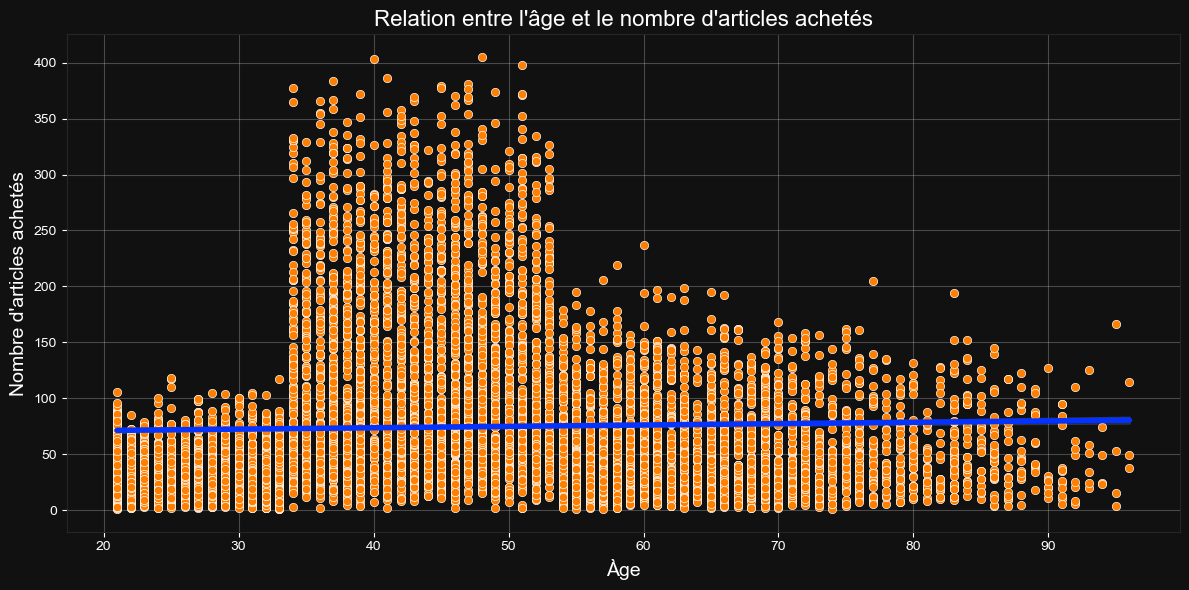

In [718]:
'''Visualisaiton de la relation entre l'âge et le nombre d'articles achetés  '''

fig, ax=plt.subplots(figsize=(12, 6))

sns.scatterplot(data=nombre_article, x='âge', y='nombre_article', color='#FF8000', ax=ax)

sns.regplot(data=nombre_article, x='âge', y='nombre_article', scatter=False, color='#0433FF', line_kws={'lw':4, 'ls':'solid'})

plt.title('Relation entre l\'âge et le nombre d\'articles achetés', fontsize=16, color='white')
plt.xlabel('Àge', fontsize=14, color='white')
plt.ylabel('Nombre d\'articles achetés', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.grid(True, alpha=0.3)
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
plt.savefig('Graphiques/Relation entre l\'âge et le nombre d\'articles achetés.png', transparent=True)
plt.tight_layout()
plt.show()

Ce sont les 33-53 ans qui achètent le plus, suivis des 53-70 ans et des 20-33 ans. 

## La variable nombre d'achats suit elle une loi normale?


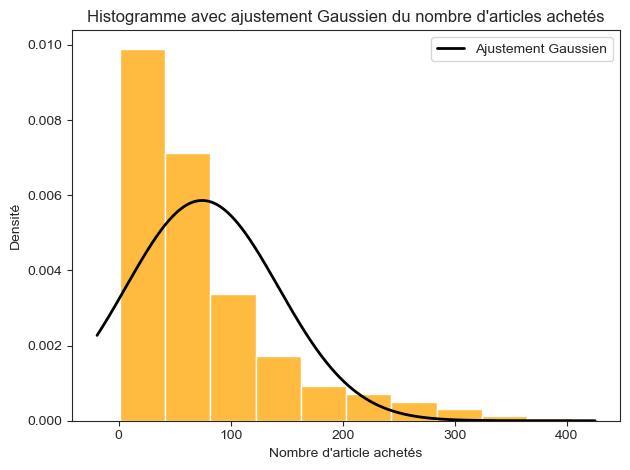

In [721]:
'''Histogramme et courbe de Gauss'''

# Tracé de l'histogramme
sns.histplot(data=nombre_article, x='nombre_article', bins=10, color='orange', stat='density')

# Ajustement Gaussien
mu_nombre, std_nombre=norm.fit(nombre_article['nombre_article'])
xmin_nombre, xmax_nombre=plt.xlim()
x_nombre=np.linspace(xmin_nombre, xmax_nombre, nombre_article['nombre_article'].count())
p_nombre=norm.pdf(x_nombre, mu_nombre, std_nombre)

plt.plot(x_nombre,p_nombre, 'k', linewidth =2, label='Ajustement Gaussien')
plt.legend()
plt.title('Histogramme avec ajustement Gaussien du nombre d\'articles achetés')
plt.xlabel('Nombre d\'article achetés')
plt.ylabel('Densité')
plt.tight_layout()
plt.show()

In [722]:
# Test d'Agostino_pearson

# Données
nombre=nombre_article['nombre_article']

stat_nombre, AP_p_nombre = normaltest(age)

print(f'''Statistiques du test d\'Agostini_Pearson pour l\'âge: {stat_nombre:.4f}
p_value: {AP_p_nombre:.4g}
''')

if AP_p_nombre < 0.05:
    print(f'Les données ne semblent pas suivre une loi normale')
else:
    print(f'Les données semblent suivre une loi normale')

Statistiques du test d'Agostini_Pearson pour l'âge: 504.2383
p_value: 3.207e-110

Les données ne semblent pas suivre une loi normale


In [723]:
# Test d'Anderson-Darling

anderson_nombre=anderson(nombre)

print(f'''Statistique du test d'Anderson-Darling pour l\'âge: {anderson_nombre.statistic:.4f}
''')
for sl, cv in zip(anderson_nombre.significance_level, anderson_nombre.critical_values):
    conclusion = "Les données ne suivent pas une loi normale" if anderson_nombre.statistic > cv else "Les données suivent une loi normale"
    print(f"Seuil {sl:.0f}% : Critique = {cv:.4f} → {conclusion}")

Statistique du test d'Anderson-Darling pour l'âge: 473.9955

Seuil 15% : Critique = 0.5760 → Les données ne suivent pas une loi normale
Seuil 10% : Critique = 0.6560 → Les données ne suivent pas une loi normale
Seuil 5% : Critique = 0.7870 → Les données ne suivent pas une loi normale
Seuil 2% : Critique = 0.9180 → Les données ne suivent pas une loi normale
Seuil 1% : Critique = 1.0910 → Les données ne suivent pas une loi normale


## Test de Spearman (2 variables quantitatives indépendantes qui ne suivent pas une loi normale)

In [725]:
# Calcul du coefficient de correlation de Spearman et de la p_valeur
nb=nombre_article['nombre_article']
spearman_nombre_article_correlation, spearman_p_valeur_nombre_article=spearmanr(age, nb)

print(f'''\nCoefficient de correlation de Spearman pour l'âge et le nombre d'articles achetés: {spearman_nombre_article_correlation:.4f}
p_valeur de Spearman pour l'âge et le nombre d'articles achetés: {spearman_p_valeur_nombre_article:.4g}
''')

if spearman_p_valeur_nombre_article < 0.05:
    print(f'Il existe une correlation significative entre l\'âge et le nombre d\'achats\n')
else:
    print(f'Il n\'existe pas de corrélation significative entre l\'âge et le nombre d\'acahts\n')


Coefficient de correlation de Spearman pour l'âge et le nombre d'articles achetés: 0.1277
p_valeur de Spearman pour l'âge et le nombre d'articles achetés: 1.45e-32

Il existe une correlation significative entre l'âge et le nombre d'achats



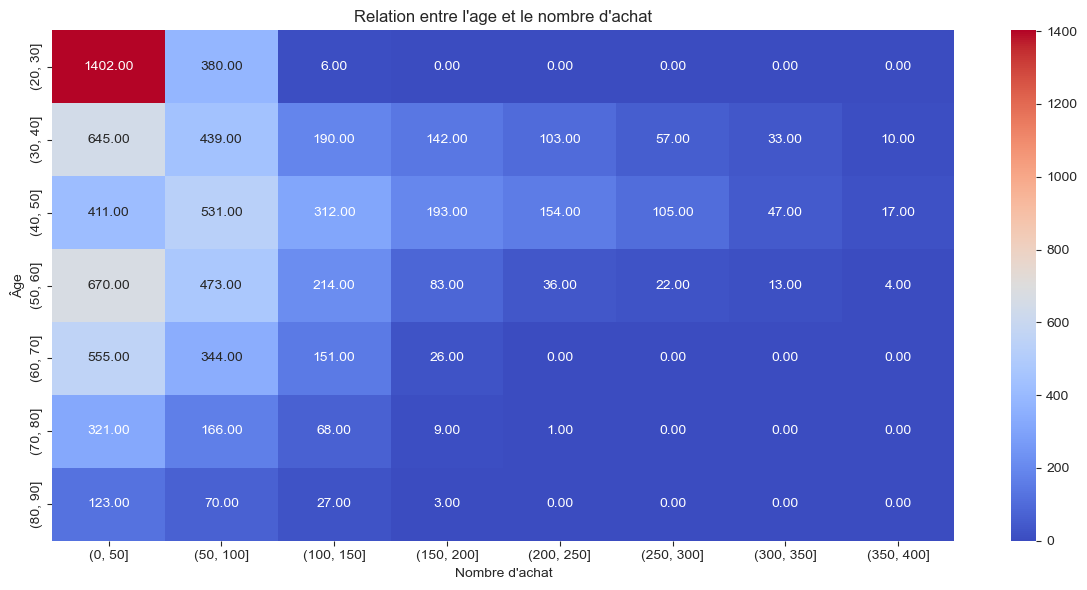

In [726]:
# Création d'une heatmap entre l'âge et le nombre d'achats 

# Création de tranche d'âge et de tranche d'achat
bins_age=np.arange(0,100, 10)
bins_nb=np.arange(0, 410, 50)
nombre_article['bin_age']=pd.cut(nombre_article['âge'], bins=bins_age)
nombre_article['bin_nb_article']=pd.cut(nombre_article['nombre_article'], bins=bins_nb)

# Création d'un tableau de contingence
contingence_nb_article=pd.crosstab(nombre_article['bin_age'], nombre_article['bin_nb_article'])

plt.figure(figsize=(12,6))
sns.heatmap(contingence_nb_article, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Relation entre l\'age et le nombre d\'achat')
plt.xlabel('Nombre d\'achat')
plt.ylabel('Âge')
plt.tight_layout()
plt.show()

<h1 style='color: orange;'>Lien entre l'âge et la taille du panier moyen</h1>

## Création de la colonne panier moyen après groupement par client

In [729]:
# Calcul du panier moyen
panier_moyen=jointure_sans_btob.groupby('client_id').agg(
    panier_moyen=('price', 'mean'),
    âge=('âge', 'first')
).reset_index()
panier_moyen.head()

,client_id,panier_moyen,âge
0,c_1,14.628372,70
1,c_10,23.337931,69
2,c_100,31.856250,33
3,c_1000,18.189524,59
4,c_1001,17.707282,43


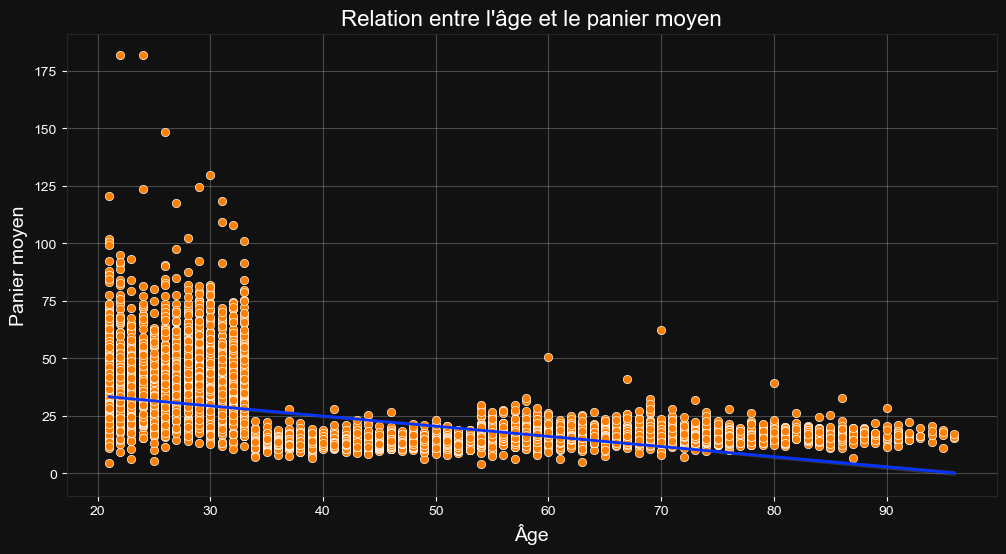

In [730]:
''' Visualisation de la relation entre l'âge et le panier moyen '''

fig, ax=plt.subplots(figsize=(12, 6))

sns.scatterplot(data=panier_moyen, x='âge', y='panier_moyen', color='#FF8000', ax=ax)

sns.regplot(data=panier_moyen, x='âge', y='panier_moyen', scatter=False, color='#0433FF', line_kws={'lw':2, 'ls':'solid'})

plt.title('Relation entre l\'âge et le panier moyen', fontsize=16, color='white')
plt.xlabel('Âge', fontsize=14, color='white')
plt.ylabel('Panier moyen', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, alpha=0.3)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
plt.savefig('Graphiques/Relation entre l\'âge et le panier moyen.png', transparent=True)
plt.tight_layout
plt.show()

## La variable panier moyen suit elle une loi normale?

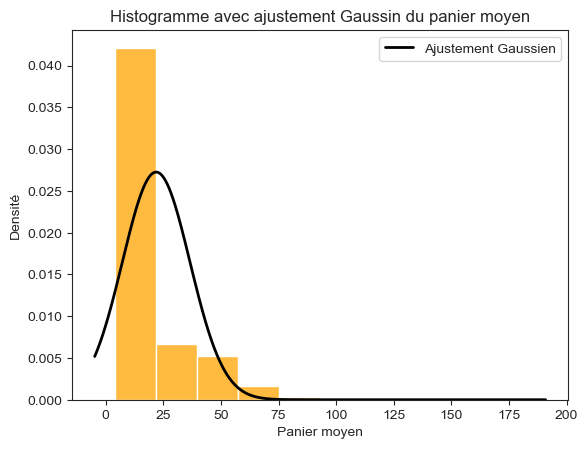

In [732]:
'Histogramme et coourbe de Gauss'

# Tracé de l'histogramme
sns.histplot(data=panier_moyen, x='panier_moyen', bins=10, color='orange', stat='density')

# Coordonnées de la courbe de Gauss associée
mu_pm, std_pm=norm.fit(panier_moyen['panier_moyen'])
xmin_pm, xmax_pm=plt.xlim()
x_pm=np.linspace(xmin_pm, xmax_pm, panier_moyen['panier_moyen'].count())
p_pm=norm.pdf(x_pm, mu_pm, std_pm)

# Tracé de la courbe de Gauss
plt.plot(x_pm, p_pm, 'k', linewidth=2, label='Ajustement Gaussien')
plt.legend()
plt.title('Histogramme avec ajustement Gaussin du panier moyen')
plt.xlabel('Panier moyen')
plt.ylabel('Densité')
plt.tight_layout
plt.show()

In [733]:
# Test d'Agostino_Pearson

# Données
pm=panier_moyen['panier_moyen']

stat_pm, AP_p_pm = normaltest(pm)

print(f'''Statistiques du test d\'Agostini_Pearson pour l\'âge: {stat_pm:.4f}
p_value: {AP_p_pm:.4g}
''')

if AP_p_pm < 0.05:
    print(f'Les données ne semblent pas suivre une loi normale')
else:
    print(f'Les données semblent suivre une loi normale')

Statistiques du test d'Agostini_Pearson pour l'âge: 4558.2830
p_value: 0

Les données ne semblent pas suivre une loi normale


In [734]:
# Test d'Anderson-Darling

anderson_pm=anderson(pm)

print(f'''Statistique du test d'Anderson-Darling pour l\'âge: {anderson_pm.statistic:.4f}
''')
for sl, cv in zip(anderson_pm.significance_level, anderson_pm.critical_values):
    conclusion = "Les données ne suivent pas une loi normale" if anderson_pm.statistic > cv else "Les données suivent une loi normale"
    print(f"Seuil {sl:.0f}% : Critique = {cv:.4f} → {conclusion}")

Statistique du test d'Anderson-Darling pour l'âge: 988.8896

Seuil 15% : Critique = 0.5760 → Les données ne suivent pas une loi normale
Seuil 10% : Critique = 0.6560 → Les données ne suivent pas une loi normale
Seuil 5% : Critique = 0.7870 → Les données ne suivent pas une loi normale
Seuil 2% : Critique = 0.9180 → Les données ne suivent pas une loi normale
Seuil 1% : Critique = 1.0910 → Les données ne suivent pas une loi normale


## Test de Spearman (2 variables quantitatives indépendantes qui ne suivent pas une loi normale)

In [736]:

age_pm=panier_moyen['âge']

# Calcul du coefficient de correlation de Spearman et de la p_valeur
spearman_pm_correlation, spearman_p_valeur_pm=spearmanr(age_pm, pm)

print(f'''Coefficient de correlation de Spearman pour l'âge et les achats: {spearman_pm_correlation:.4f}
p_valeur de Spearman pour l'âge et les achats: {spearman_p_valeur_pm:.4g}
''')

if spearman_p_valeur_pm < 0.05:
    print(f'Il existe une correlation significative entre l\'âge et les achats')
else:
    print(f'Il n\'existe pas de corrélation significative entre l\'âge et les achats')

Coefficient de correlation de Spearman pour l'âge et les achats: -0.3259
p_valeur de Spearman pour l'âge et les achats: 8.353e-212

Il existe une correlation significative entre l'âge et les achats


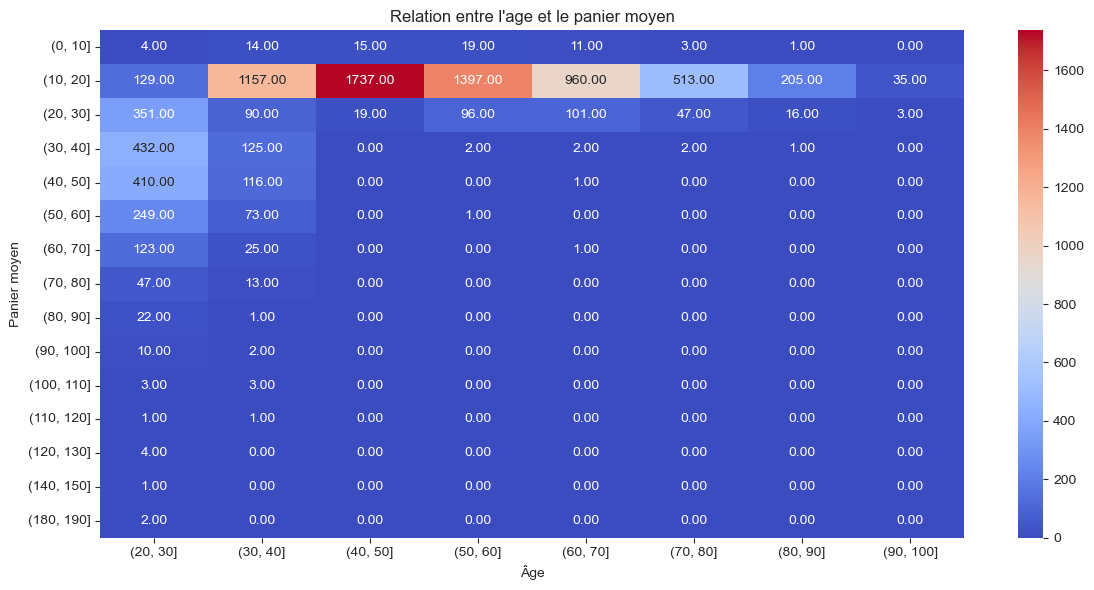

In [737]:
# Création d'une heatmap entre l'âge et le panier moyen

# Création de tranche d'âge et de tranche d'achat
bins_age=np.arange(0, 101, 10)
bins_pm=np.arange(0, 200, 10)
panier_moyen['bins_âge']=pd.cut(panier_moyen['âge'], bins=bins_age)
panier_moyen['bins_panier_moyen']=pd.cut(panier_moyen['panier_moyen'], bins=bins_pm)

# Création d'un tableau de contingence
contingence_pm_age=pd.crosstab(panier_moyen['bins_panier_moyen'], panier_moyen['bins_âge'])

plt.figure(figsize=(12,6))
sns.heatmap(contingence_pm_age, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Relation entre l\'age et le panier moyen')
plt.xlabel('Âge')
plt.ylabel('Panier moyen')
plt.tight_layout()
plt.show()

<h1 style='color: orange;'>Lien entre l'âge et la catégorie des livres achetés</h1>

## Avec les colonnes catégories dépivotées

### Création de la table age - categ

In [741]:
# Utilisation de la table categ créée plus haut 
categ.head(1)

categ,categ 0,categ 1,categ 2
client_id,,,
c_1,30,12,1


In [742]:
# Récupération de la colonne âge des clients

age_df=jointure_sans_btob.groupby('client_id')['âge'].first()

# Ajout de la colonne âge à la table categ
age_categ=categ.join(age_df)
age_categ.head()

,categ 0,categ 1,categ 2,âge
client_id,,,,
c_1,30,12,1,70
c_10,20,34,4,69
c_100,2,5,1,33
c_1000,43,83,0,59
c_1001,70,32,1,43


In [743]:
# Création d'une table groupée par client_id et categ
client_categ=jointure_sans_btob.groupby(['client_id', 'categ']).agg(
    âge=('âge', 'first'), 
    nb_achat=('prod_id', 'count'),
    ca=('price', 'sum')
).sort_values('nb_achat', ascending=False).reset_index()
client_categ.head()

,client_id,categ,âge,nb_achat,ca
0,c_1637,0,37,316,3395.73
1,c_3263,0,40,314,3399.29
2,c_5953,0,39,311,3634.16
3,c_2140,0,48,310,3360.28
4,c_2595,0,51,307,3247.93


<Axes: xlabel='âge', ylabel='nb_achat'>

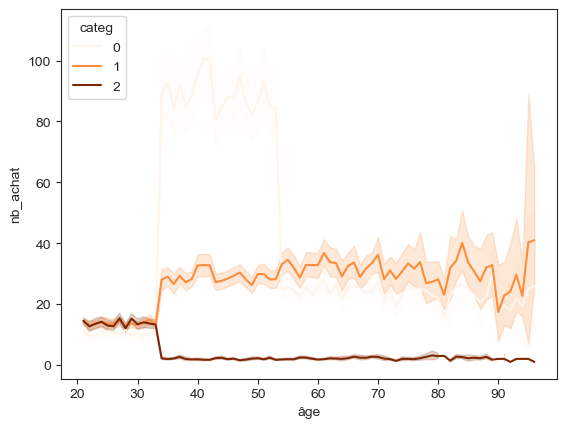

In [744]:
# Visualisation de la relation entre l'âge est les catégories

sns.lineplot(data=client_categ, x='âge', y='nb_achat', hue='categ', palette='Oranges')

### Test de Spearman(variables indépendantes qui ne suivent pas une loi normale) 

In [746]:
age_ac=age_categ['âge']

categorie=age_categ[['categ 0', 'categ 1', 'categ 2']]

for cat_nom, cat_serie in categorie.items():
    spearman_correlation, p_valeur=spearmanr(age_ac, cat_serie)
    print(f'''Catégorie: {cat_nom}
    Coefficient de correlation de Spearman entre l'âge et la {cat_nom}: {spearman_correlation}
    p_valeur de Spearman entre l'âge et la (cat): {p_valeur}
    ''')
    if p_valeur < 0.05:
        print(f'Corrélation significative entre l\'âge et la {cat_nom}')
    else:
        print(f'Il n\'exista pas de corrélation significative entre l\'âge et la {cat_nom}')
    print('\n\n')

Catégorie: categ 0
    Coefficient de correlation de Spearman entre l'âge et la categ 0: 0.22120009490474749
    p_valeur de Spearman entre l'âge et la (cat): 9.313710475569636e-96
    
Corrélation significative entre l'âge et la categ 0



Catégorie: categ 1
    Coefficient de correlation de Spearman entre l'âge et la categ 1: 0.3094956305191329
    p_valeur de Spearman entre l'âge et la (cat): 3.4512192780556893e-190
    
Corrélation significative entre l'âge et la categ 1



Catégorie: categ 2
    Coefficient de correlation de Spearman entre l'âge et la categ 2: -0.5959589917481998
    p_valeur de Spearman entre l'âge et la (cat): 0.0
    
Corrélation significative entre l'âge et la categ 2





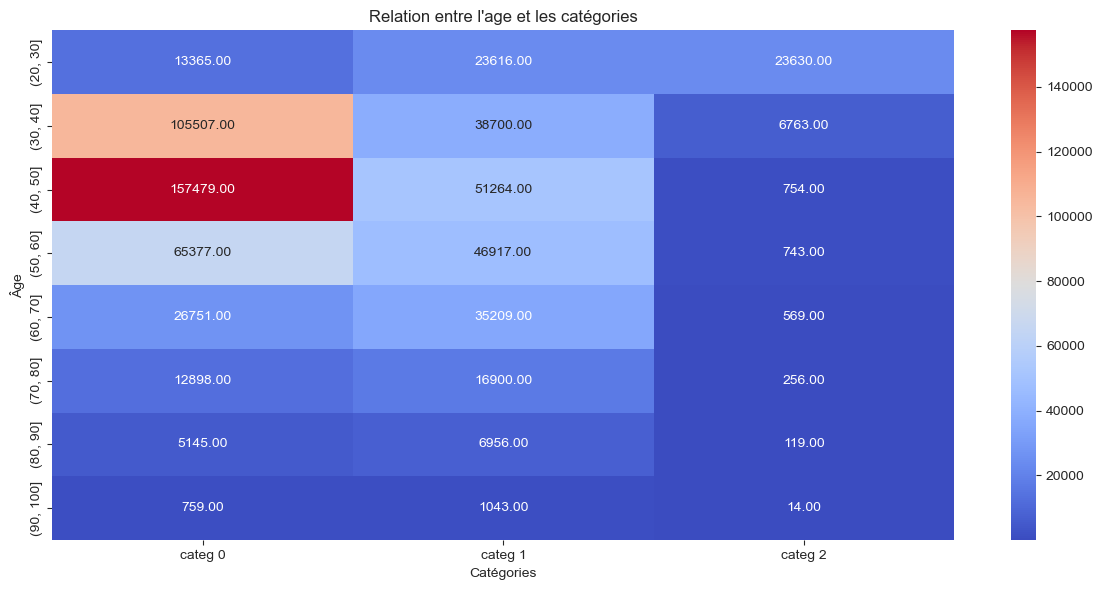

In [747]:
# Création d'une heatmap

# Création d'une colonne tranche d'âge
age_bin=np.arange(0, 101, 10)
age_categ['âge_bin']=pd.cut(age_categ['âge'], bins=bins_age)

contingence_age_categ=age_categ.groupby('âge_bin', observed=True)[['categ 0', 'categ 1', 'categ 2']].sum()

plt.figure(figsize=(12,6))
sns.heatmap(contingence_age_categ, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Relation entre l\'age et les catégories')
plt.xlabel('Catégories')
plt.ylabel('Âge')
plt.tight_layout()
plt.show()

## Sans les colonnes catégories dépivotées

### Test de Kruskal_Wallis (1 variable quantitative et 3 variables qualitatives, la donnée 'âge' ne suit pas une loi normale)

In [750]:
'''Création d'une liste d'âge par catégorie '''
age_par_categ=[groupe['âge'].values for _, groupe in client_categ.groupby('categ')]


'''Test de Kruskal-Wallis'''
kruskal_stat_1, kruskal_p_valeur_1=kruskal(*age_par_categ)

print(f'\nStatistique de Kruskal: {kruskal_stat_1}')
print(f'P valeur de Kruskal: {kruskal_p_valeur_1} ')

if kruskal_p_valeur_1 < 0.05:
    print(f'Il existe un lien significatif entre l\'âge et la catégorie de livre achetée \n')
else:
    print(f'Il n\'existe pas de lien significatif entre l\'âge et la catégorie de livre acheté \n')


Statistique de Kruskal: 1251.553809915885
P valeur de Kruskal: 1.692556886953296e-272 
Il existe un lien significatif entre l'âge et la catégorie de livre achetée 



#### Quelles catégories sont différentes des autres? 

In [752]:
'''On ne retient que les colonnes qui nous intéressent '''
client_categ_dunn=client_categ[['âge', 'categ']]

'''Test de Dunn avec correction de Bonferroni'''
dunn_1=sp.posthoc_dunn(client_categ_dunn, val_col='âge', group_col='categ', p_adjust='bonferroni')

print(dunn_1)

               0              1              2
0   1.000000e+00   7.306256e-09  1.003974e-257
1   7.306256e-09   1.000000e+00  3.012399e-197
2  1.003974e-257  3.012399e-197   1.000000e+00


Il existe des différences significatives entre chaques catégories. L'âge médian de chaque catégorie est 
différent de l'âge médian des autres catégories. 

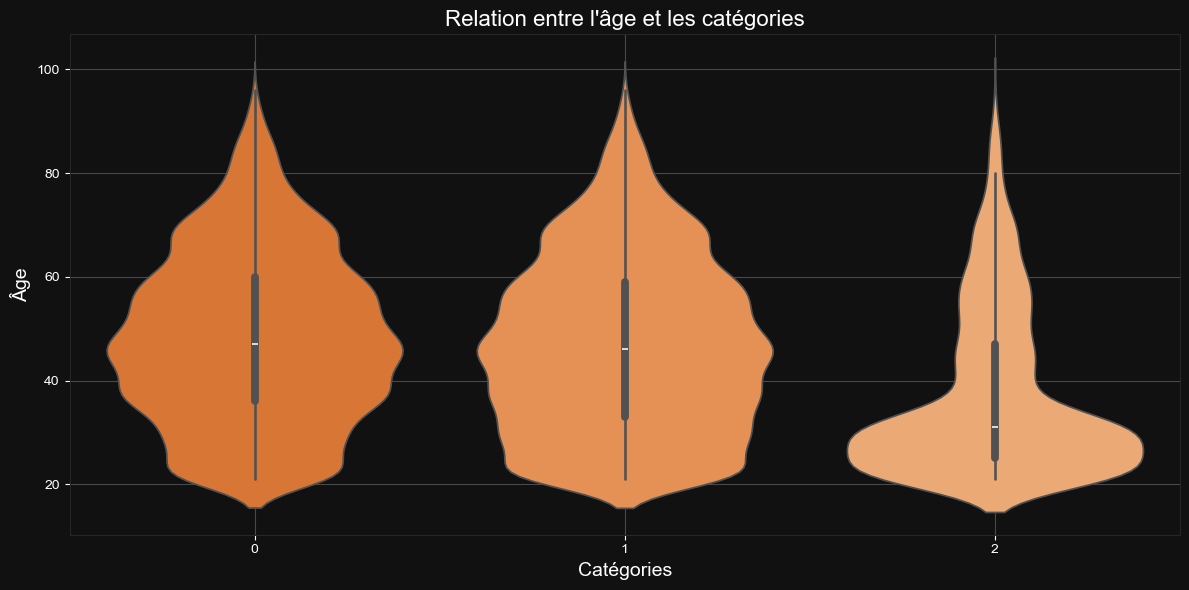

In [754]:
''' Visualisation de la relation entre l'âge et les catégories '''

# Création d'une palette personnalisée
n = client_categ['categ'].nunique()  # récupère le nombre de catégories
cmap = plt.colormaps['Oranges']  # récupère la palette orange de Matplotlib

# On génère une liste de couleurs
colors = [cmap(0.4 + 0.2 * (i / (n - 1))) for i in reversed(range(n))] 

fig, ax=plt.subplots(figsize=(12,6))

sns.violinplot(data=client_categ, x='categ', y='âge', palette=colors, hue='categ', legend=False )

plt.title('Relation entre l\'âge et les catégories', fontsize=16, color='white')
plt.xlabel('Catégories', fontsize=14, color='white')
plt.ylabel('Âge',fontsize= 14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True, alpha=0.3)
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')
plt.savefig('Graphiques/Relation entre l\'âge et les catégories.png', transparent=True)
plt.tight_layout()
plt.show()

### Existe t'il un âge dominant dans une catégorie pondéré par le nombre de livre acheté? 

In [756]:
'''Détermination du nombre d'achat par âge et par catégorie '''
age_categ_nb_achat=jointure_sans_btob.groupby(['âge', 'categ']).size().reset_index(name='nb_achat')

liste_nb_achat=[groupe['nb_achat'].values for _, groupe in age_categ_nb_achat.groupby('categ')]

'''Test de Kruskal-Wallis '''
kruskal_stat_2, kruskal_p_valeur_2=kruskal(*liste_nb_achat)

print(f'''\nStatistique de Kruskal: {kruskal_stat_2: .2f}
p_valeur de Kruskal: {kruskal_p_valeur_2: .3e}
''')

if kruskal_p_valeur_2 < 0.05:
    print('IL existe siginificativement au moins un âge dominant dans une catégorie \n ')
else:
    print('Il n\'existe pas d\'âge dominant dans au moins une catégorie \n')


Statistique de Kruskal:  104.93
p_valeur de Kruskal:  1.643e-23

IL existe siginificativement au moins un âge dominant dans une catégorie 
 


<Axes: xlabel='categ', ylabel='nb_achat'>

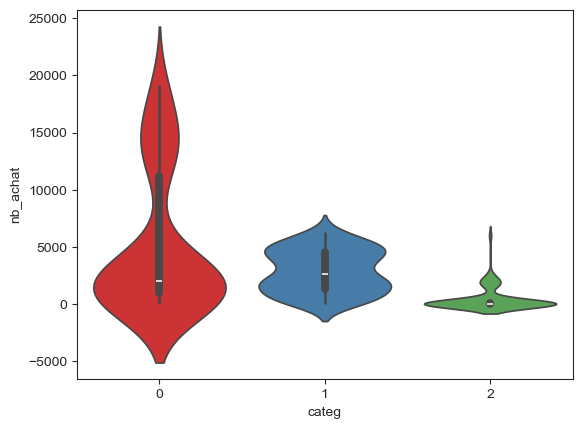

In [757]:
sns.violinplot(data=age_categ_nb_achat, x='categ', y='nb_achat', hue='categ', palette='Set1', legend=False)

<Axes: xlabel='âge', ylabel='nb_achat'>

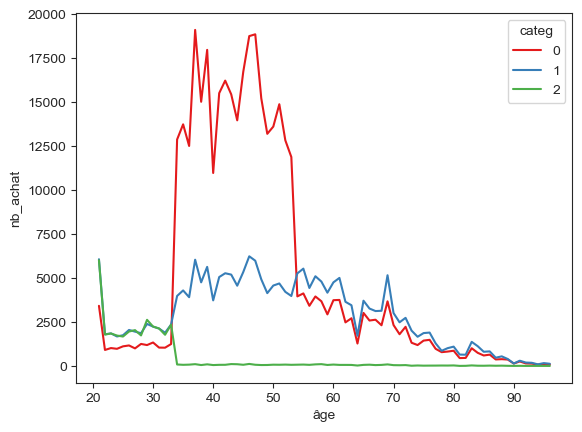

In [758]:
sns.lineplot(data=age_categ_nb_achat, x='âge', y='nb_achat', hue='categ', palette='Set1')

<Axes: xlabel='categ', ylabel='nb_achat'>

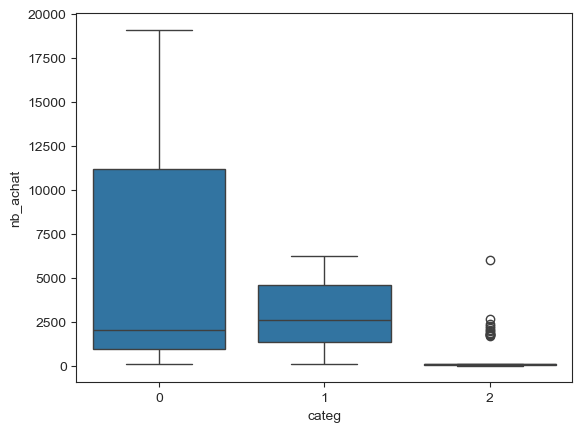

In [759]:
sns.boxplot(data=age_categ_nb_achat, x='categ', y='nb_achat')

#### Quelles catégories sont différentes des autres? 

In [761]:
'''Récupération des colonnes pertinentes '''
age_nb_achat_dunn=age_categ_nb_achat[['categ', 'nb_achat']]

'''Test de Dunn avec ajustement de Bonferroni'''
dunn_2=sp.posthoc_dunn(age_nb_achat_dunn, val_col='nb_achat', group_col='categ', p_adjust='bonferroni')

print(dunn_2)

              0             1             2
0  1.000000e+00  1.000000e+00  2.273106e-17
1  1.000000e+00  1.000000e+00  2.375581e-19
2  2.273106e-17  2.375581e-19  1.000000e+00


# Fin

In [763]:
print('OK!')

OK!
